# Perustulo
Antti Tanskanen,
22.8.2022

Tässä työkirjassa käytetään fin_benefits-kirjastosta muokattua versiota, jossa on toteutettu erilaisia perustulomalleja. Tavoitteena on arvioida perustulon vaikutusta työnteon kannusteisiin.

Perustulomalli perustuu Eduskunnan sisäisen laskentapalvelun Vihreille tekemään laskentaan.

Perustulon oletetaan korvaavan työmarkkinatuen ja peruspäivärahan perusosat sekä kotihoidontuen ja opintotuen. Samoin verotusta muutetaan vastaavasti kuin Eduskunnan laskentapalvelun laskelmassa. Toimeentulotuki, ansiosidonnainen työttömyysturva ja työmarkkinatuen lapsikorotukset säilyvät mallissa, samoin kuin asumistuki. Perustulo huomioidaan kuitenkin näiden osana.

## Python-kirjasto

Perustulo on toteutettu Python-kirjastossa fin_benefit.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt


/Users/anttitanskanen/opt/miniconda3/envs/py37/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

## Nykytila

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [4]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True)

1 aikuinen, ei lapsia. Töissä, ei puolisoa


Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kahdesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

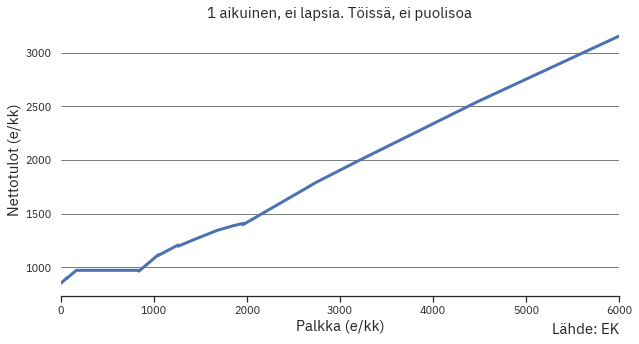

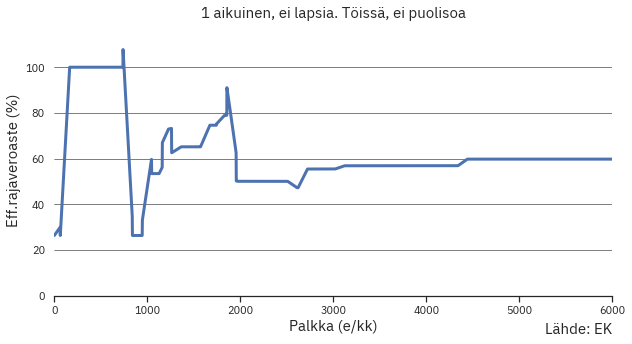

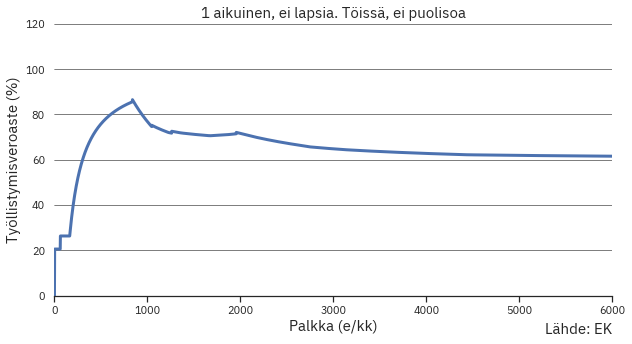

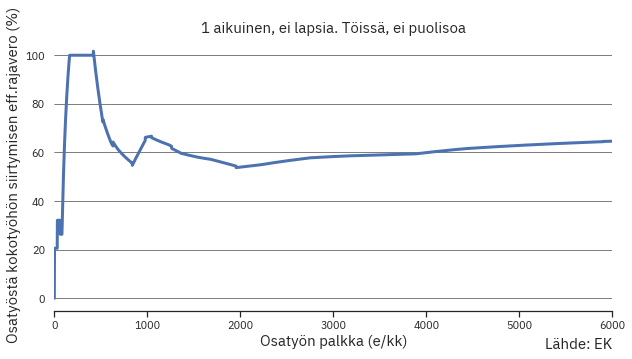

In [5]:
# Luokka Benefits() sisältää koodin
year=2022
baseline_ben=fin_benefits.Benefits()
baseline_ben.set_year(year)
marg=fin_benefits.Marginals(baseline_ben,year=year)

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva=marg.laske_ja_plottaa(p,incl_alv=True)

[ 8.65        8.7215      8.793      ... 56.13157291 56.13271373
 56.13385418]
[ 0.          0.          0.         ... 55.29628225 55.29756232
 55.29884195]
[100.         100.         100.         ...  56.96350466  56.96450681
  56.96550862]


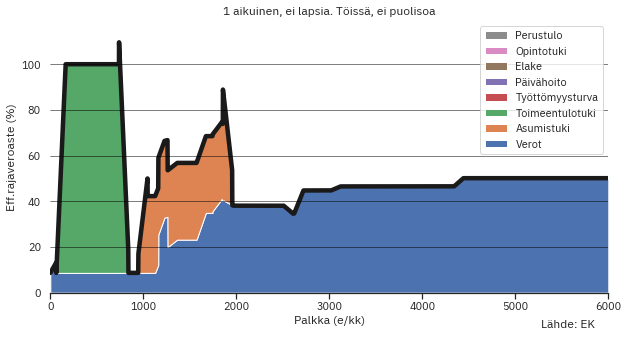

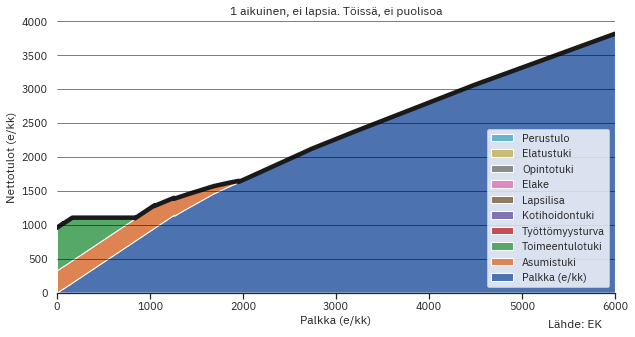

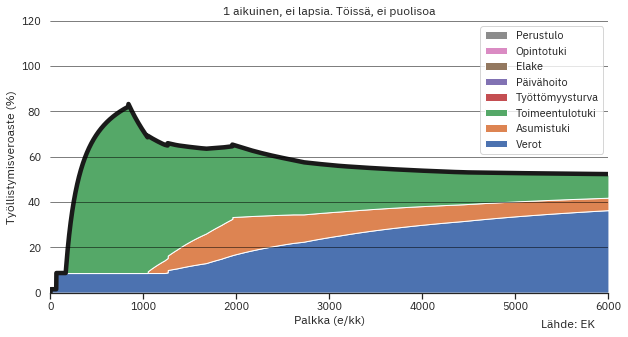

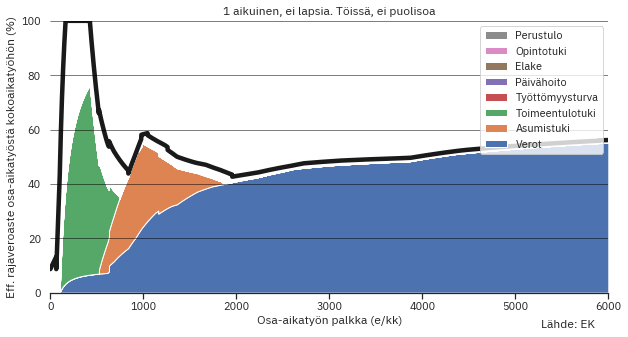

[ 0.          0.          0.         ... 55.29628225 55.29756232
 55.29884195] [100.         100.         100.         ...  56.96350466  56.96450681
  56.96550862] [ 8.65        8.7215      8.793      ... 56.13157291 56.13271373
 56.13385418]


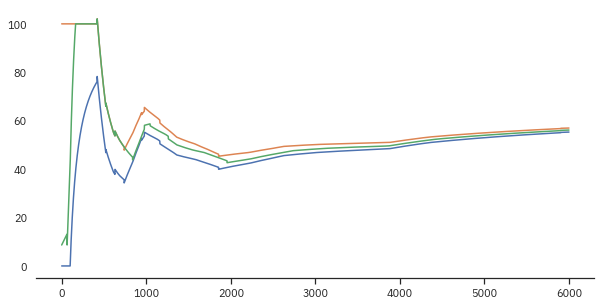

In [6]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p,incl_perustulo=True,incl_alv=False)

## Perustulo

UBI-model vihreat
Partial UBI True
perustulo_korvaa_toimeentulotuen False


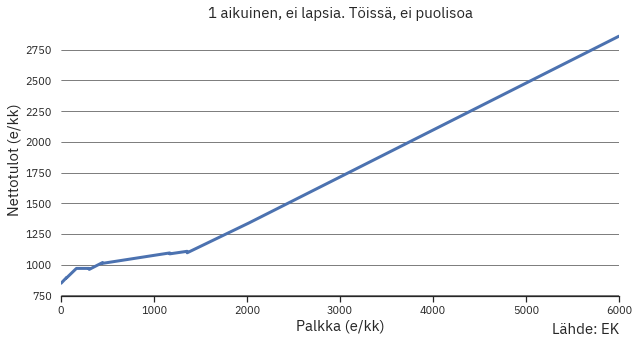

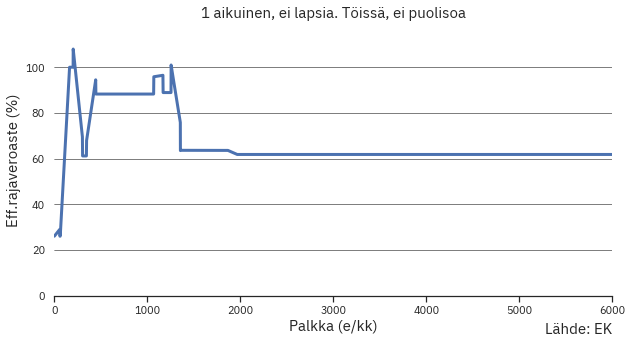

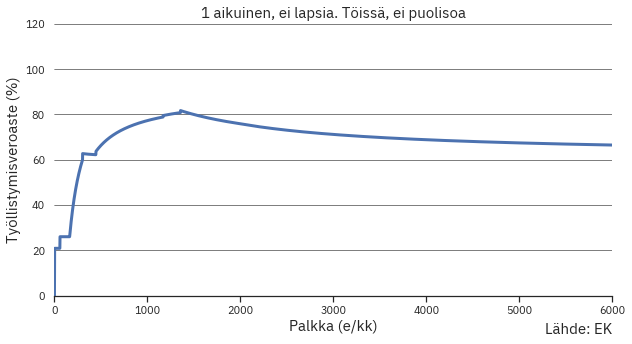

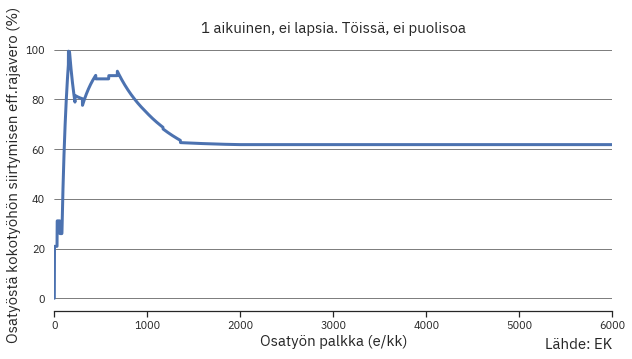

In [7]:
# Luokka Benefits() sisältää koodin
kw={'perustulomalli':'vihreat'}
#kw={'perustulomalli':'Kela'}
#kw={'perustulomalli':'sotu'}
#kw={'perustulomalli':'sotu_matala'}
#kw={'perustulomalli':'asetettava','perustulo_asetettava':800}


ben=fin_benefits.BasicIncomeBenefits(kwargs=kw)
ben.set_year(year)
basic_marg=fin_benefits.Marginals(ben,year=year)

# ja lasketaan & plotataan tulokset
bi_netto,bi_eff,bi_tva,bi_osatva=basic_marg.laske_ja_plottaa(p,incl_alv=True)

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

[26.00806452 26.05927419 26.11048387 ... 61.80201613 61.80201613
 61.80201613]
[ 0.          0.          0.         ... 60.77163907 60.77181083
 60.77198253]
[100.         100.         100.         ...  62.43886148  62.43875532
  62.43864919]


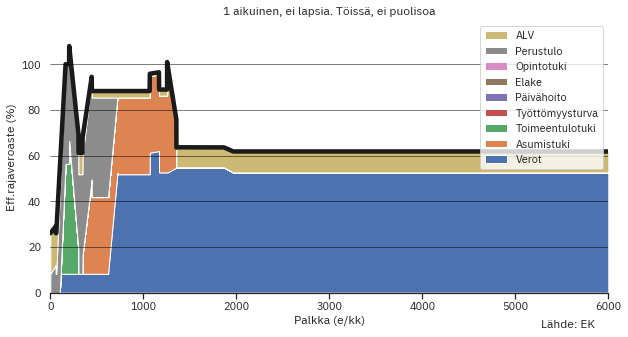

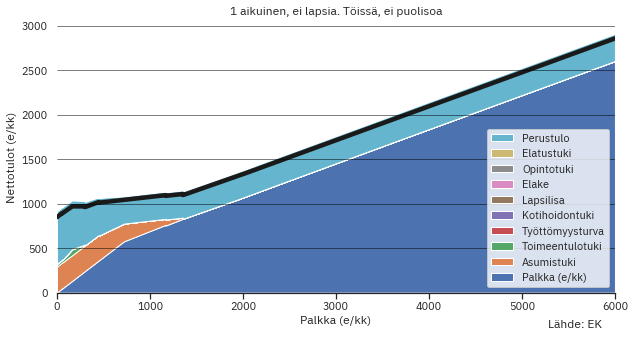

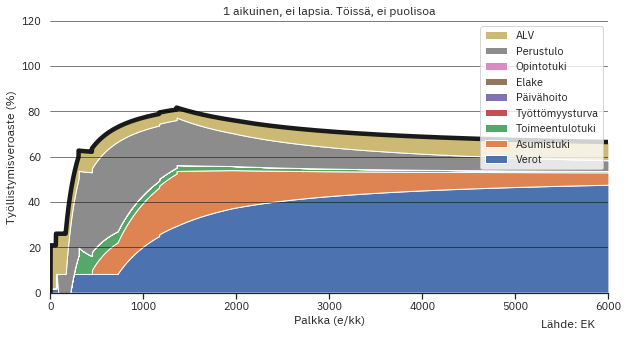

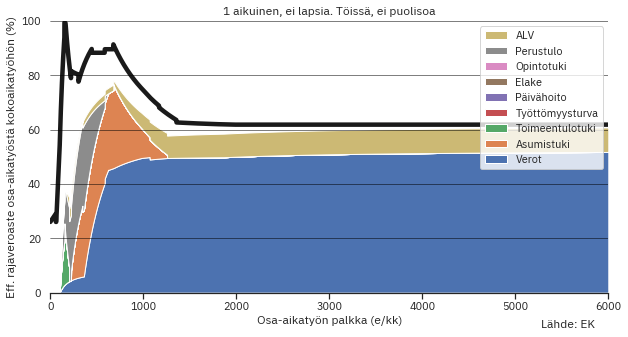

[ 0.          0.          0.         ... 60.77163907 60.77181083
 60.77198253] [100.         100.         100.         ...  62.43886148  62.43875532
  62.43864919] [26.00806452 26.05927419 26.11048387 ... 61.80201613 61.80201613
 61.80201613]


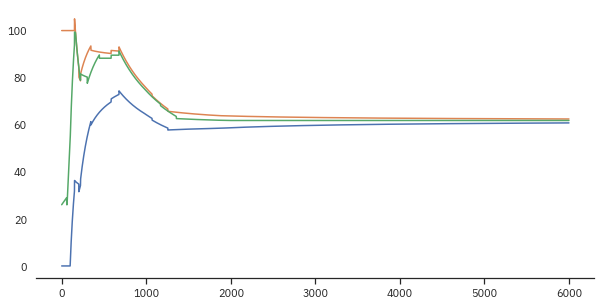

In [8]:
# ja lasketaan & plotataan tulokset
basic_marg.laske_ja_plottaa_marginaalit(p,incl_perustulo=True,incl_elake=False,incl_alv=True)

# Nykytilan ja perustulon vertailu
Verrataan käteen jäävää tuloa, efektiivistä veroastetta ja työllistymisveroastetta perustulomallissa nykytilaan.

In [9]:
p2=p.copy()
p2['t']=000

v1,b1=ben.laske_tulot_v2(p2,tt_alennus=0,include_takuuelake=True,include_alv=True)
v2,b2=baseline_ben.laske_tulot_v2(p2,tt_alennus=0,include_takuuelake=True,include_alv=True)

In [10]:
print('nimike','perustulo','nykytila','erotus')
for i in b2:
    print(f'{i:30} {b1[i]:.2f} {b2[i]:.2f} {b1[i]-b2[i]:.2f}')

nimike perustulo nykytila erotus
omat_multiplier                1.00 1.00 0.00
omat_perustulo                 533.86 0.00 533.86
omat_puhdas_tyoelake           0.00 0.00 0.00
omat_perustulo_netto           590.51 0.00 590.51
omat_perustulo_nettonetto      590.51 0.00 590.51
omat_palkkatulot               0.00 0.00 0.00
omat_tyoelake                  0.00 0.00 0.00
omat_kansanelake               0.00 0.00 0.00
omat_takuuelake                0.00 0.00 0.00
omat_palkkatulot_eielakkeella  0.00 0.00 0.00
omat_opintotuki                0.00 0.00 0.00
omat_elake_maksussa            0.00 0.00 0.00
omat_kokoelake                 0.00 0.00 0.00
omat_elake_tuleva              0.00 0.00 0.00
omat_ansiopvraha               0.00 0.00 0.00
omat_puhdasansiopvraha         0.00 0.00 0.00
omat_peruspvraha               0.00 0.00 0.00
omat_isyyspaivaraha            0.00 0.00 0.00
omat_aitiyspaivaraha           0.00 0.00 0.00
omat_kotihoidontuki            0.00 0.00 0.00
omat_sairauspaivaraha          0.00

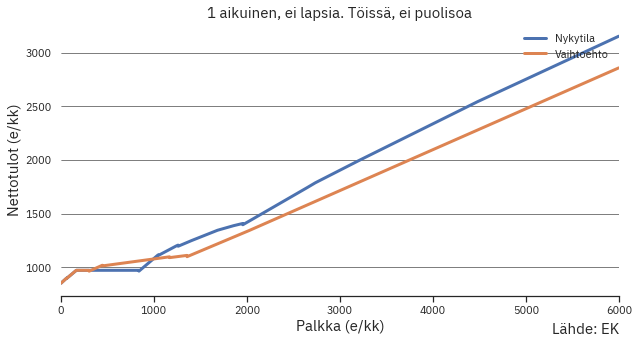

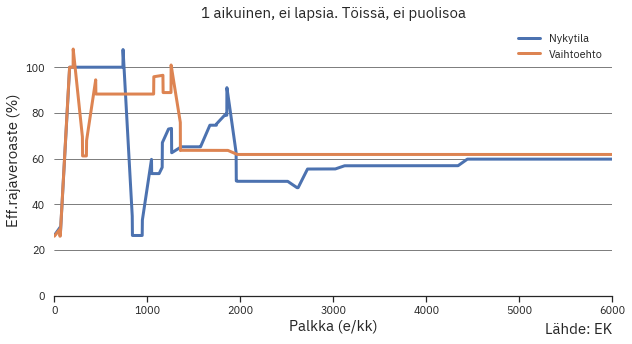

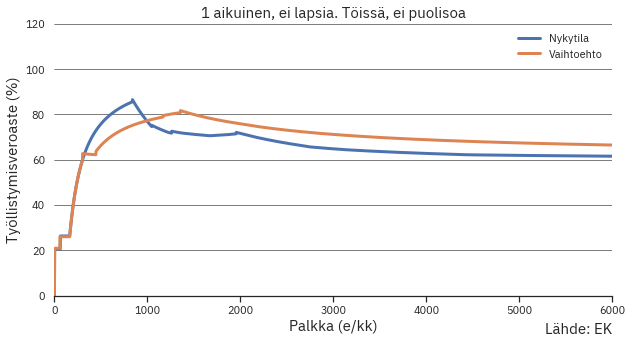

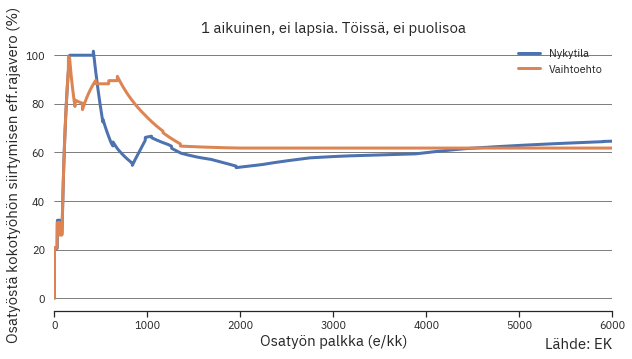

In [11]:
# ja lasketaan & plotataan tulokset
_,_,_,_=basic_marg.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,
                             basetva=basetva,baseosatva=baseosatva,figname='perustulovertailu_',incl_alv=True)

# Kokoelma esimerkkitapauksia

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 5

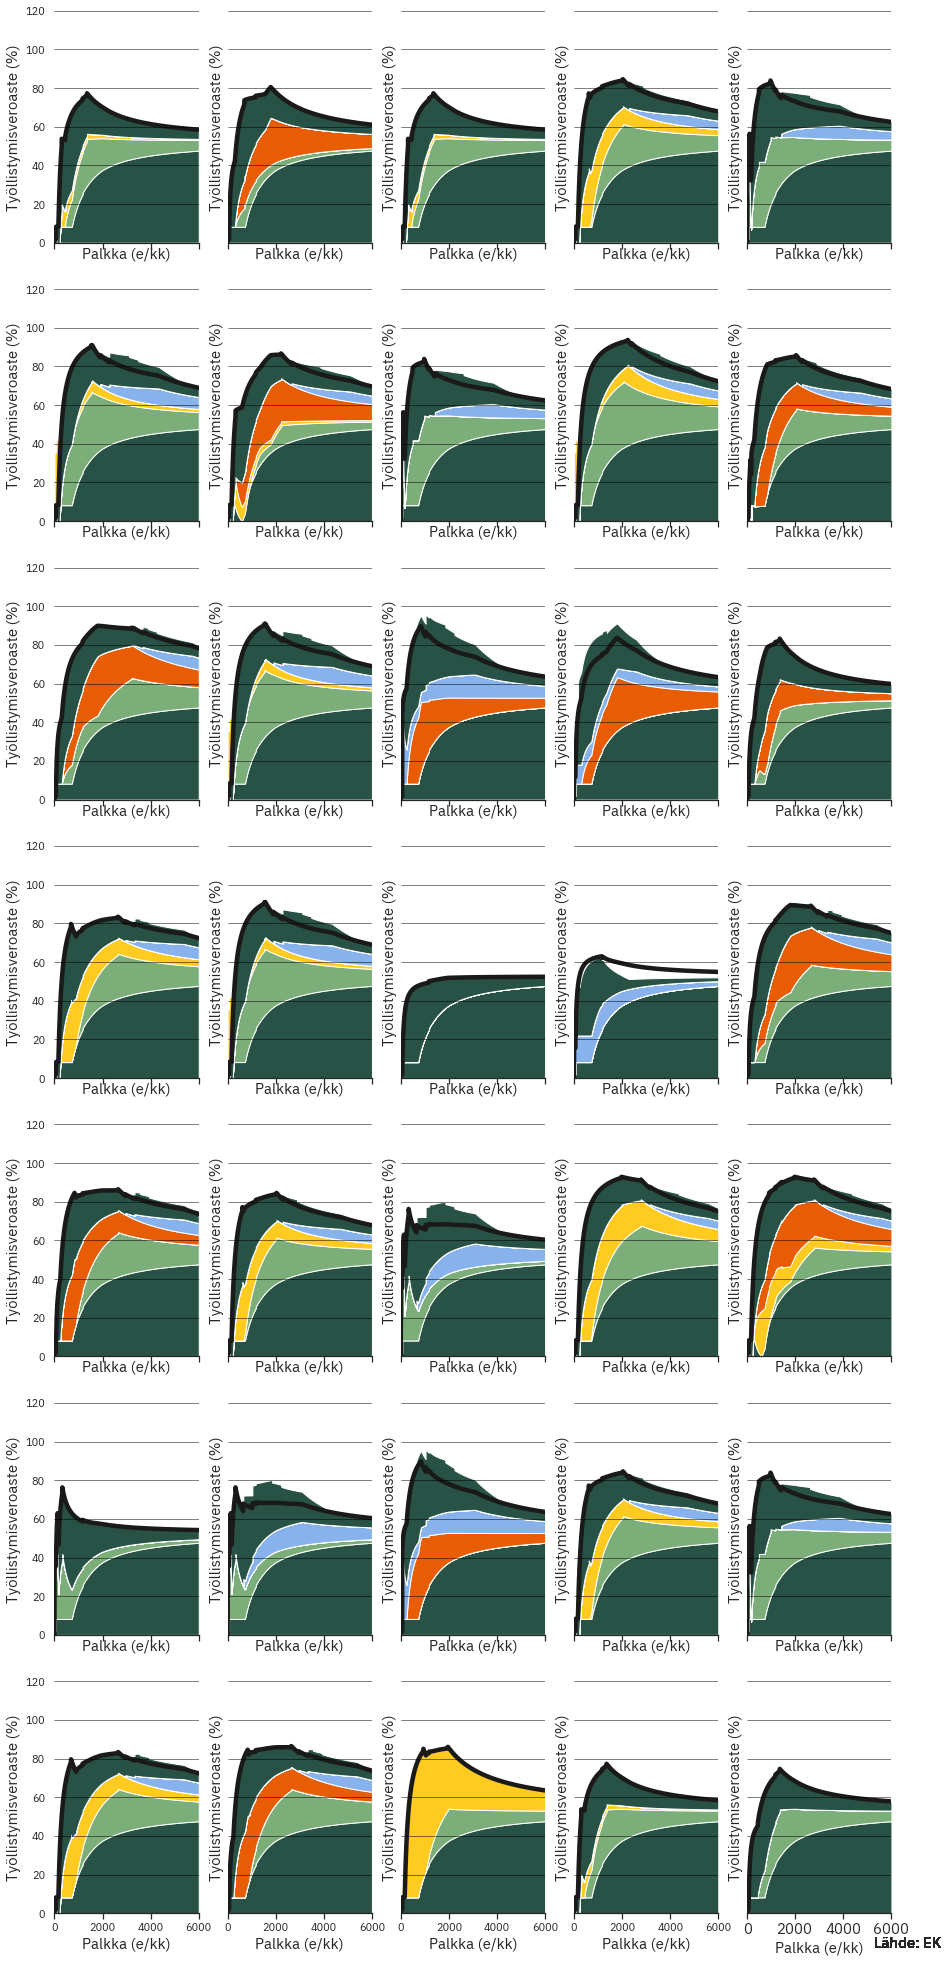

In [12]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
basic_marg.laske_ja_plottaa_hila(type='tva',incl_perustulo=True)
plt.rcParams['figure.figsize'] = [10, 5]

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 5

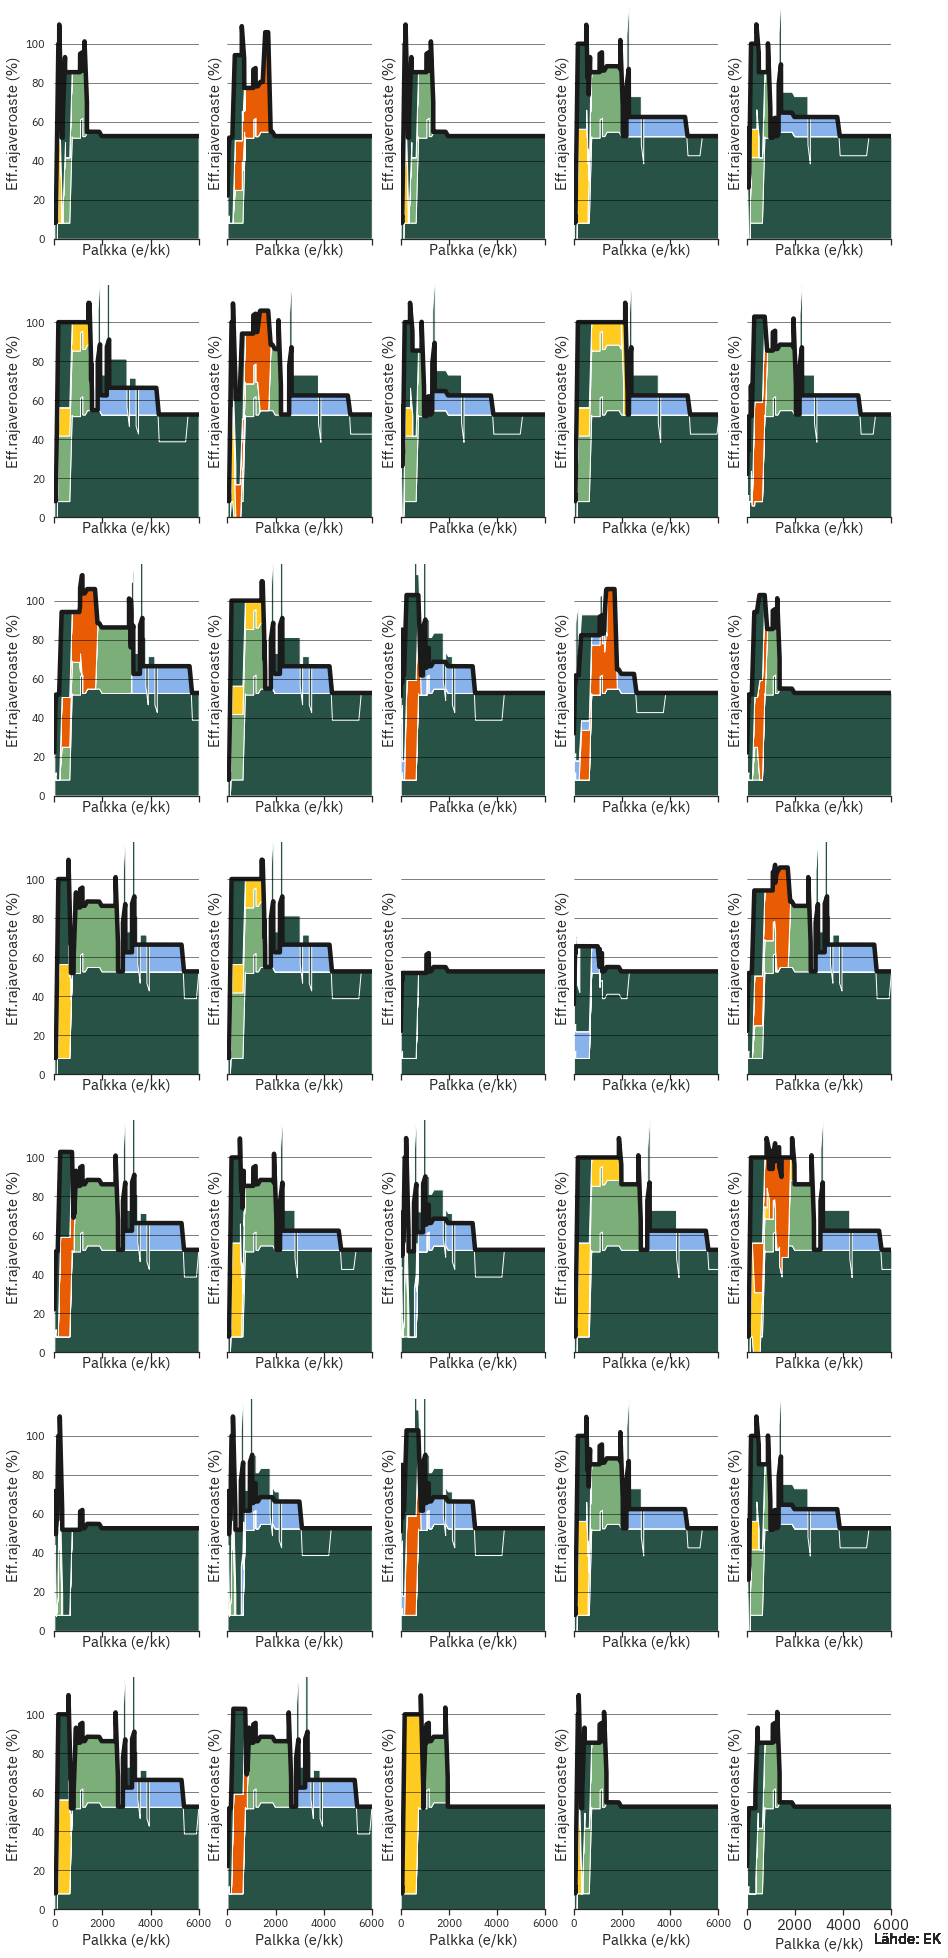

In [13]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
basic_marg.laske_ja_plottaa_hila(type='eff',incl_perustulo=True)
plt.rcParams['figure.figsize'] = [10, 5]

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 5

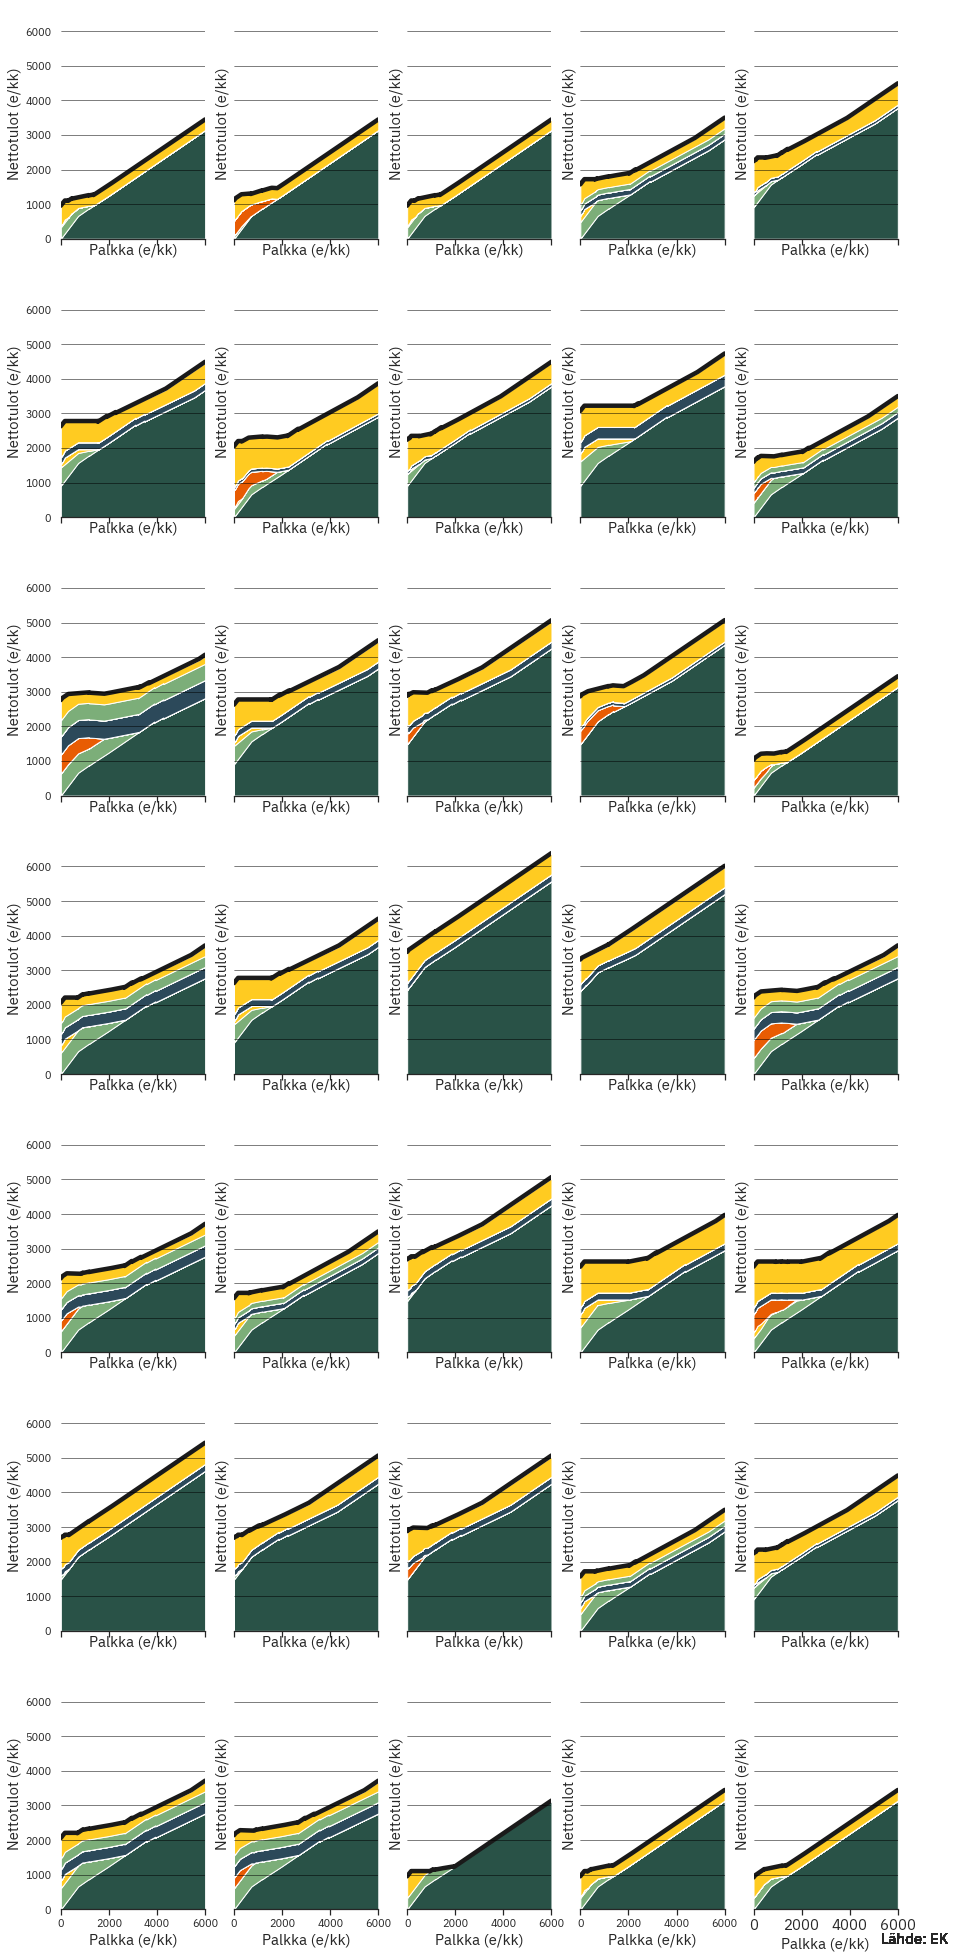

In [14]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
basic_marg.laske_ja_plottaa_hila(type='netto',incl_perustulo=True)
plt.rcParams['figure.figsize'] = [10, 5]

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


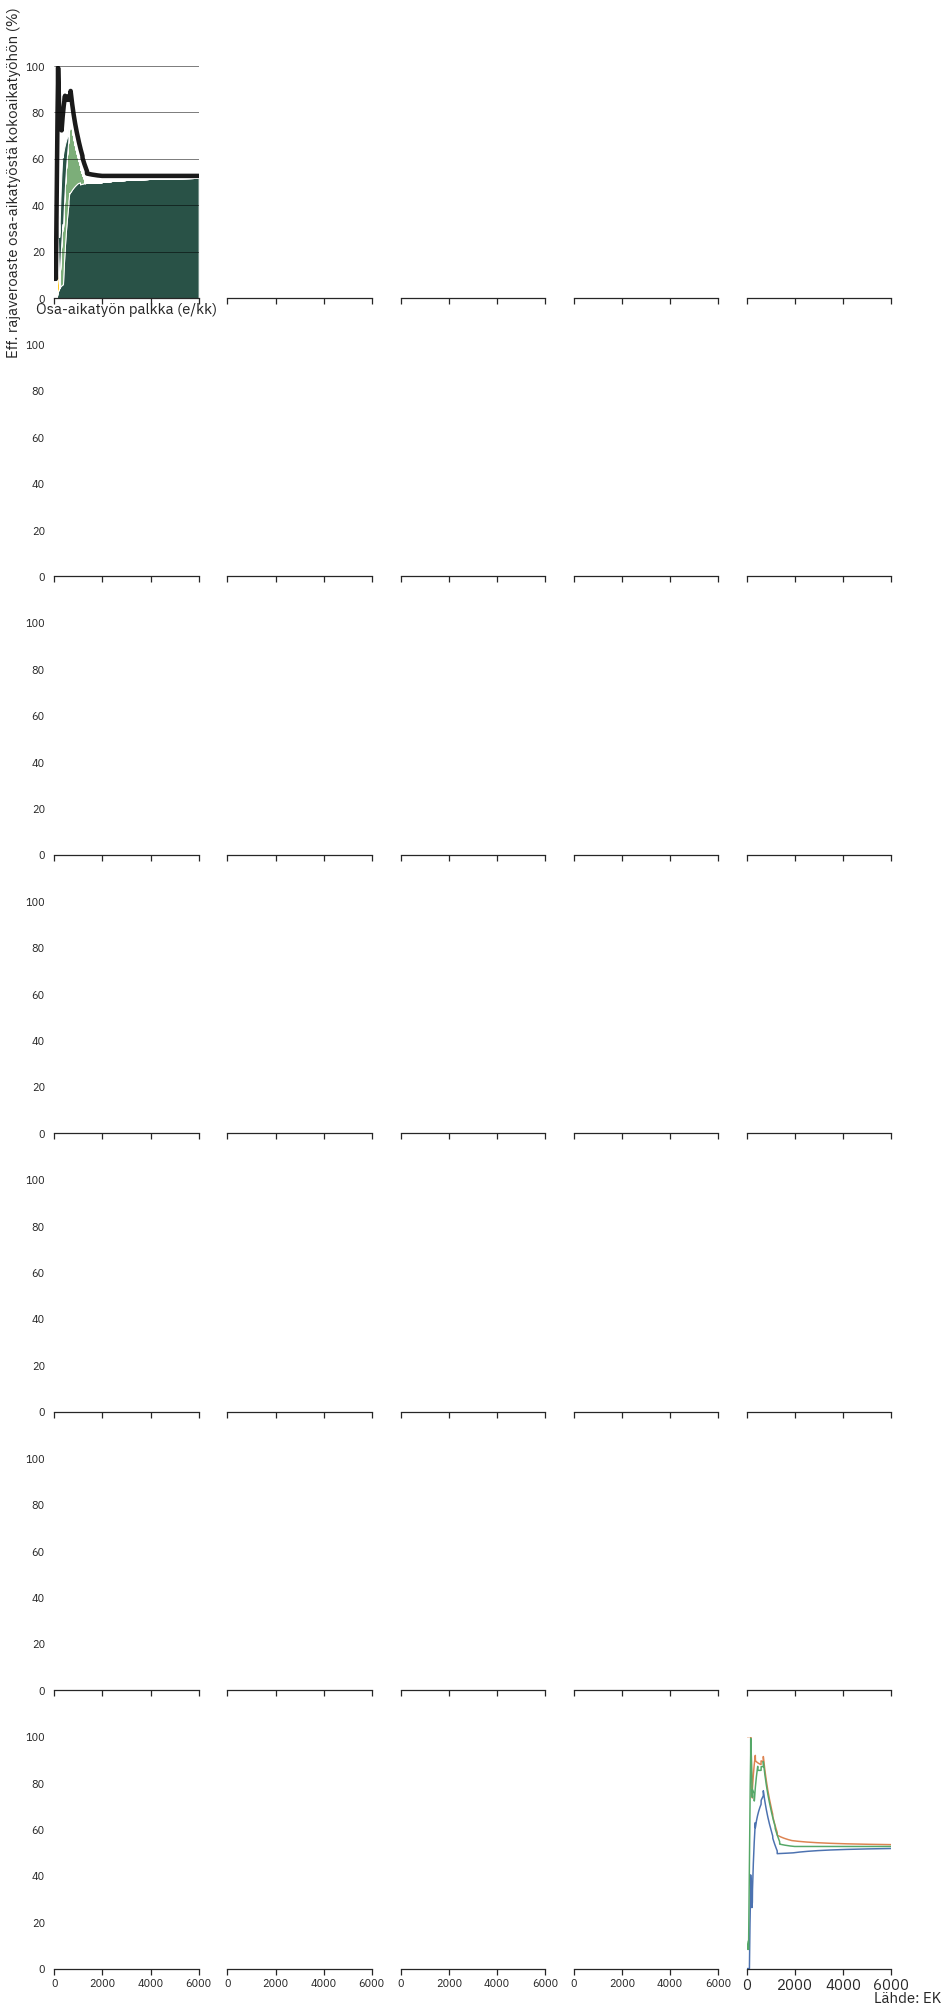

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


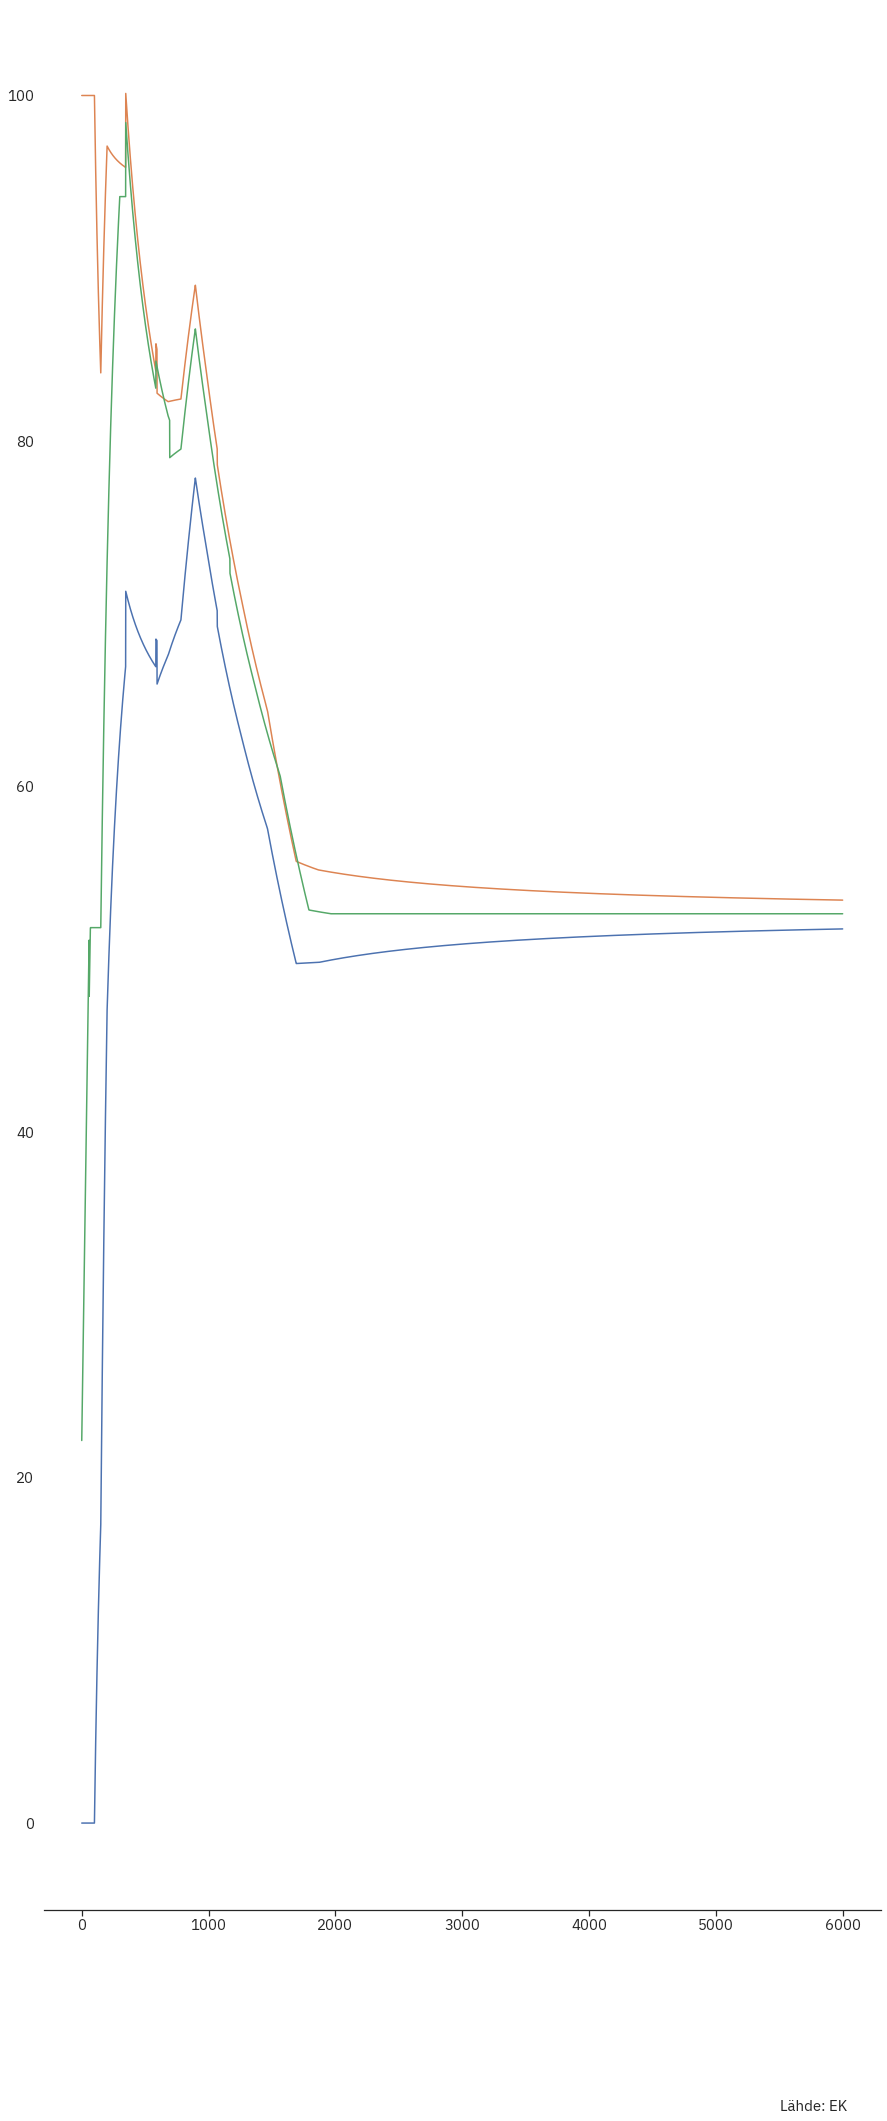

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


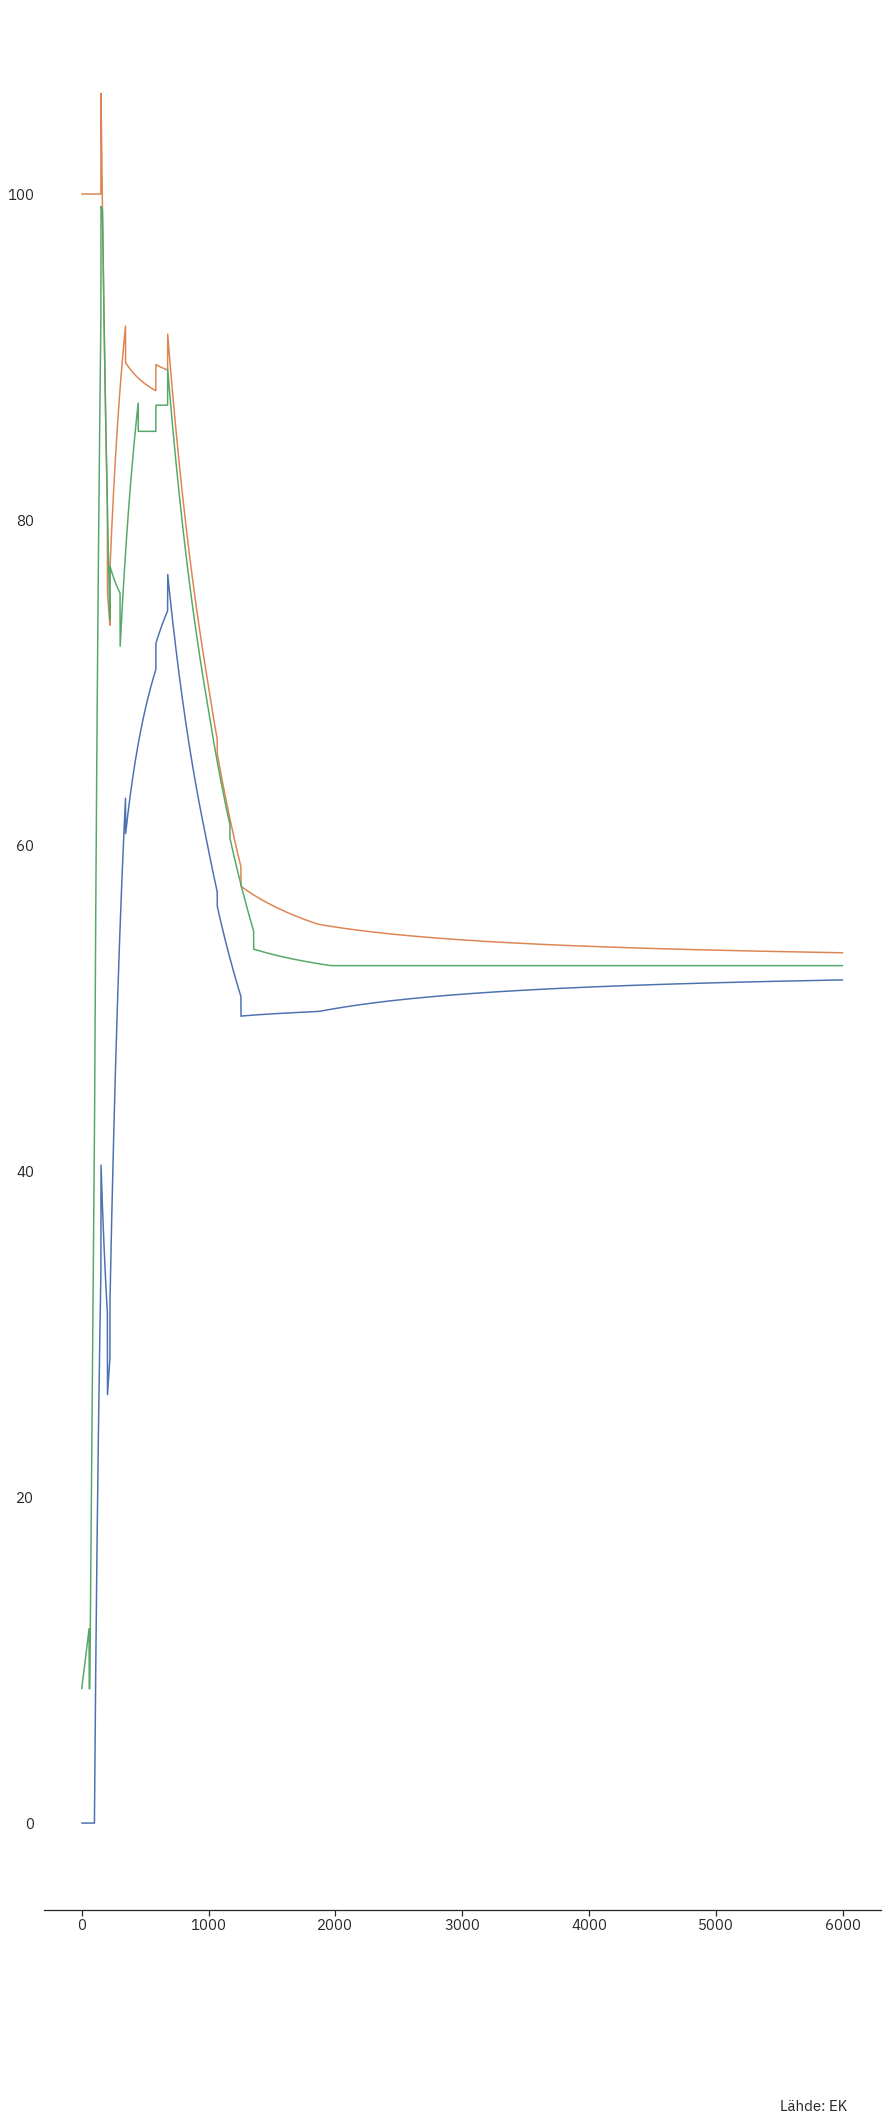

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


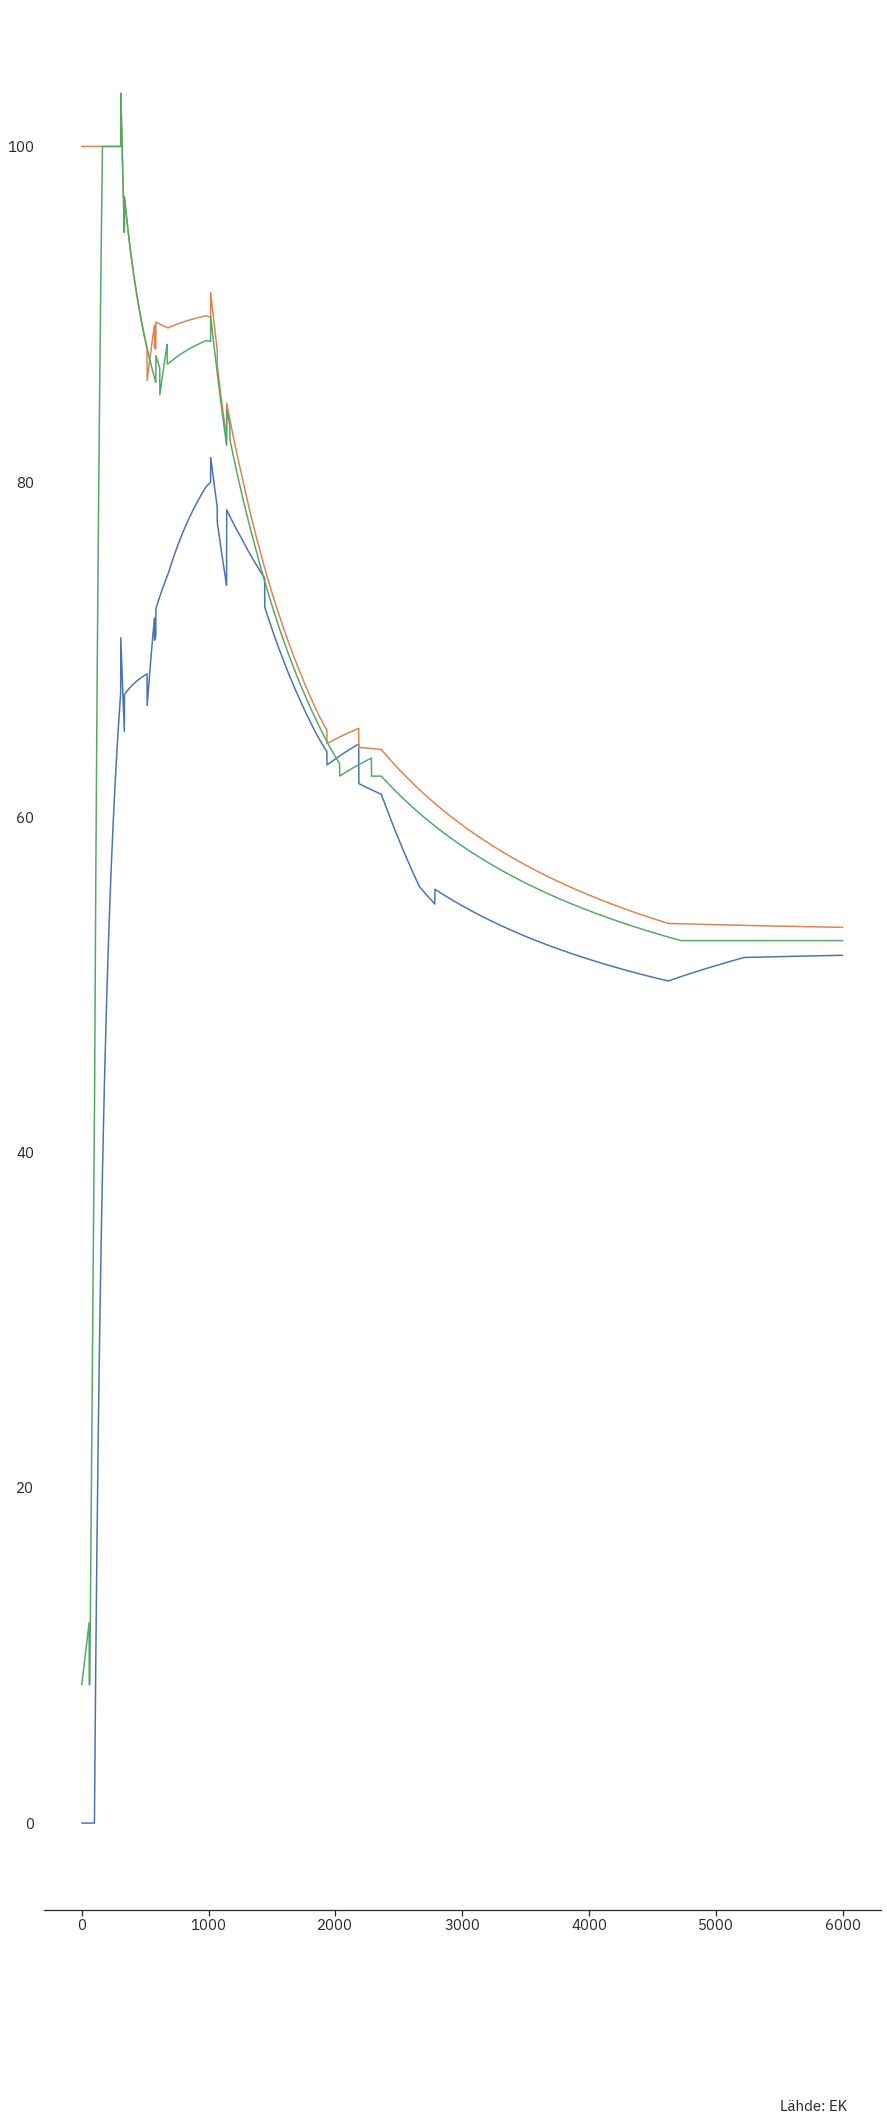

[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]


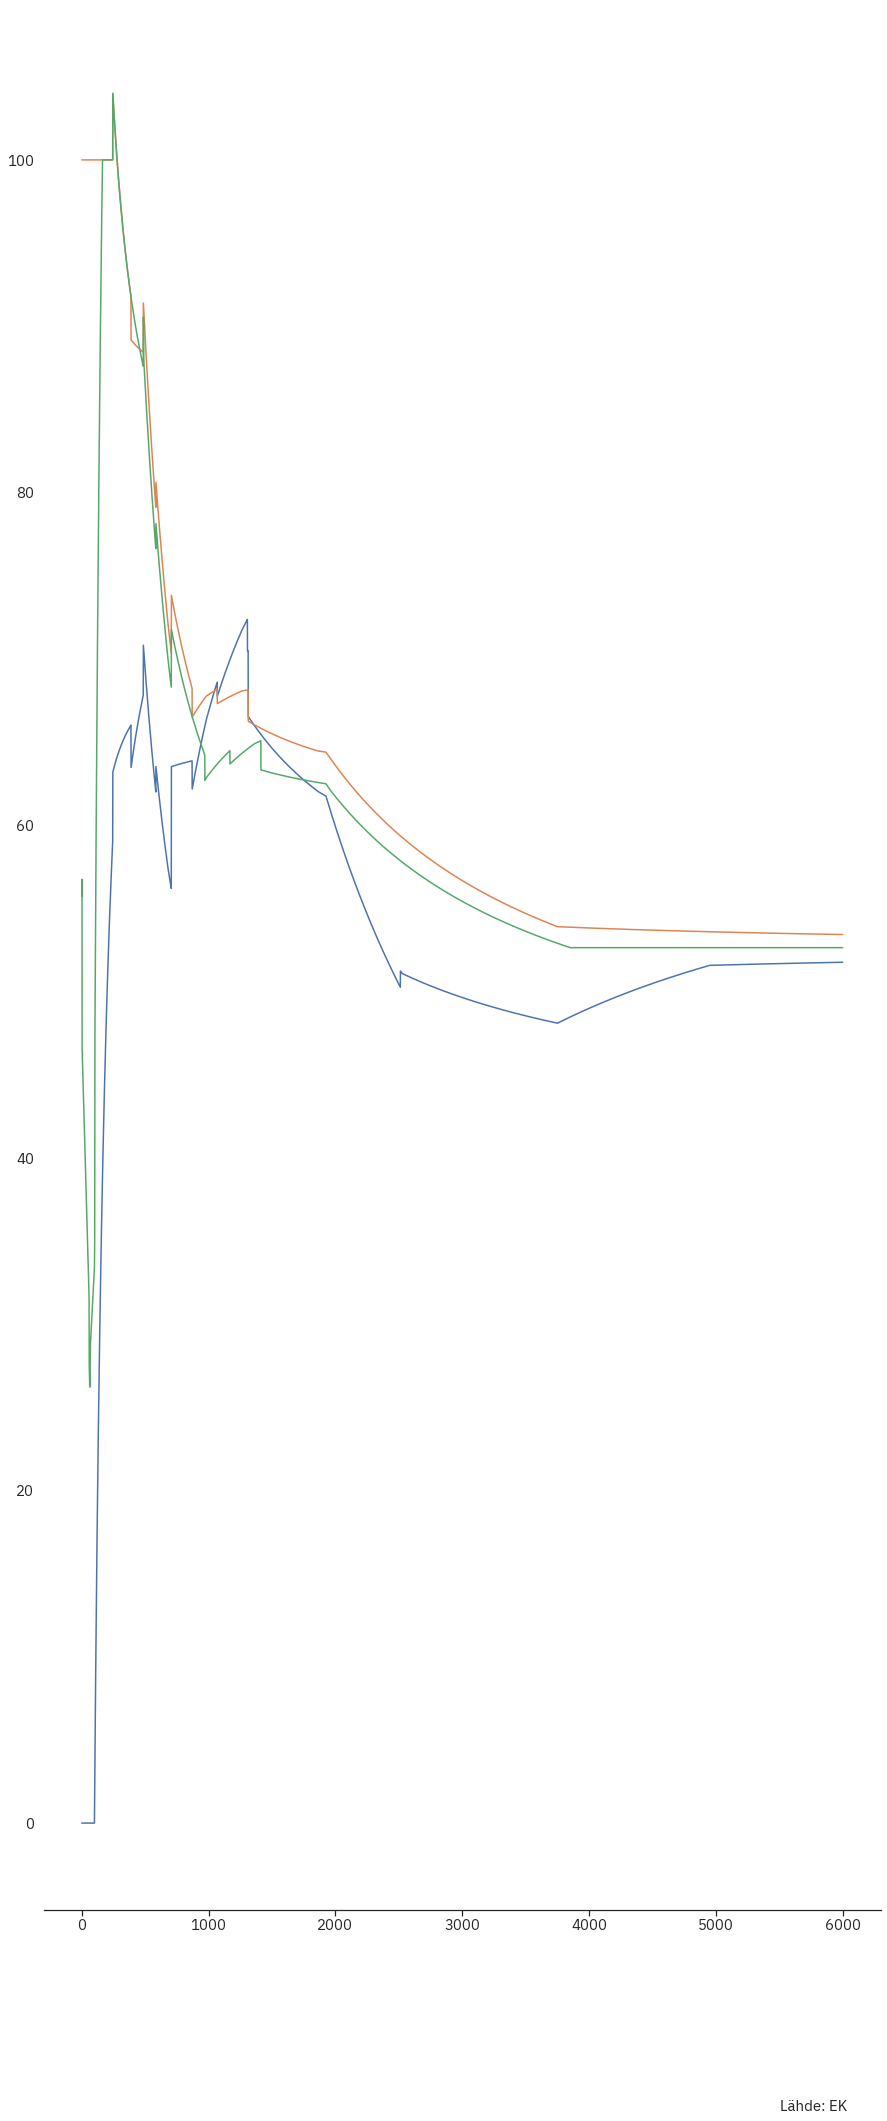

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


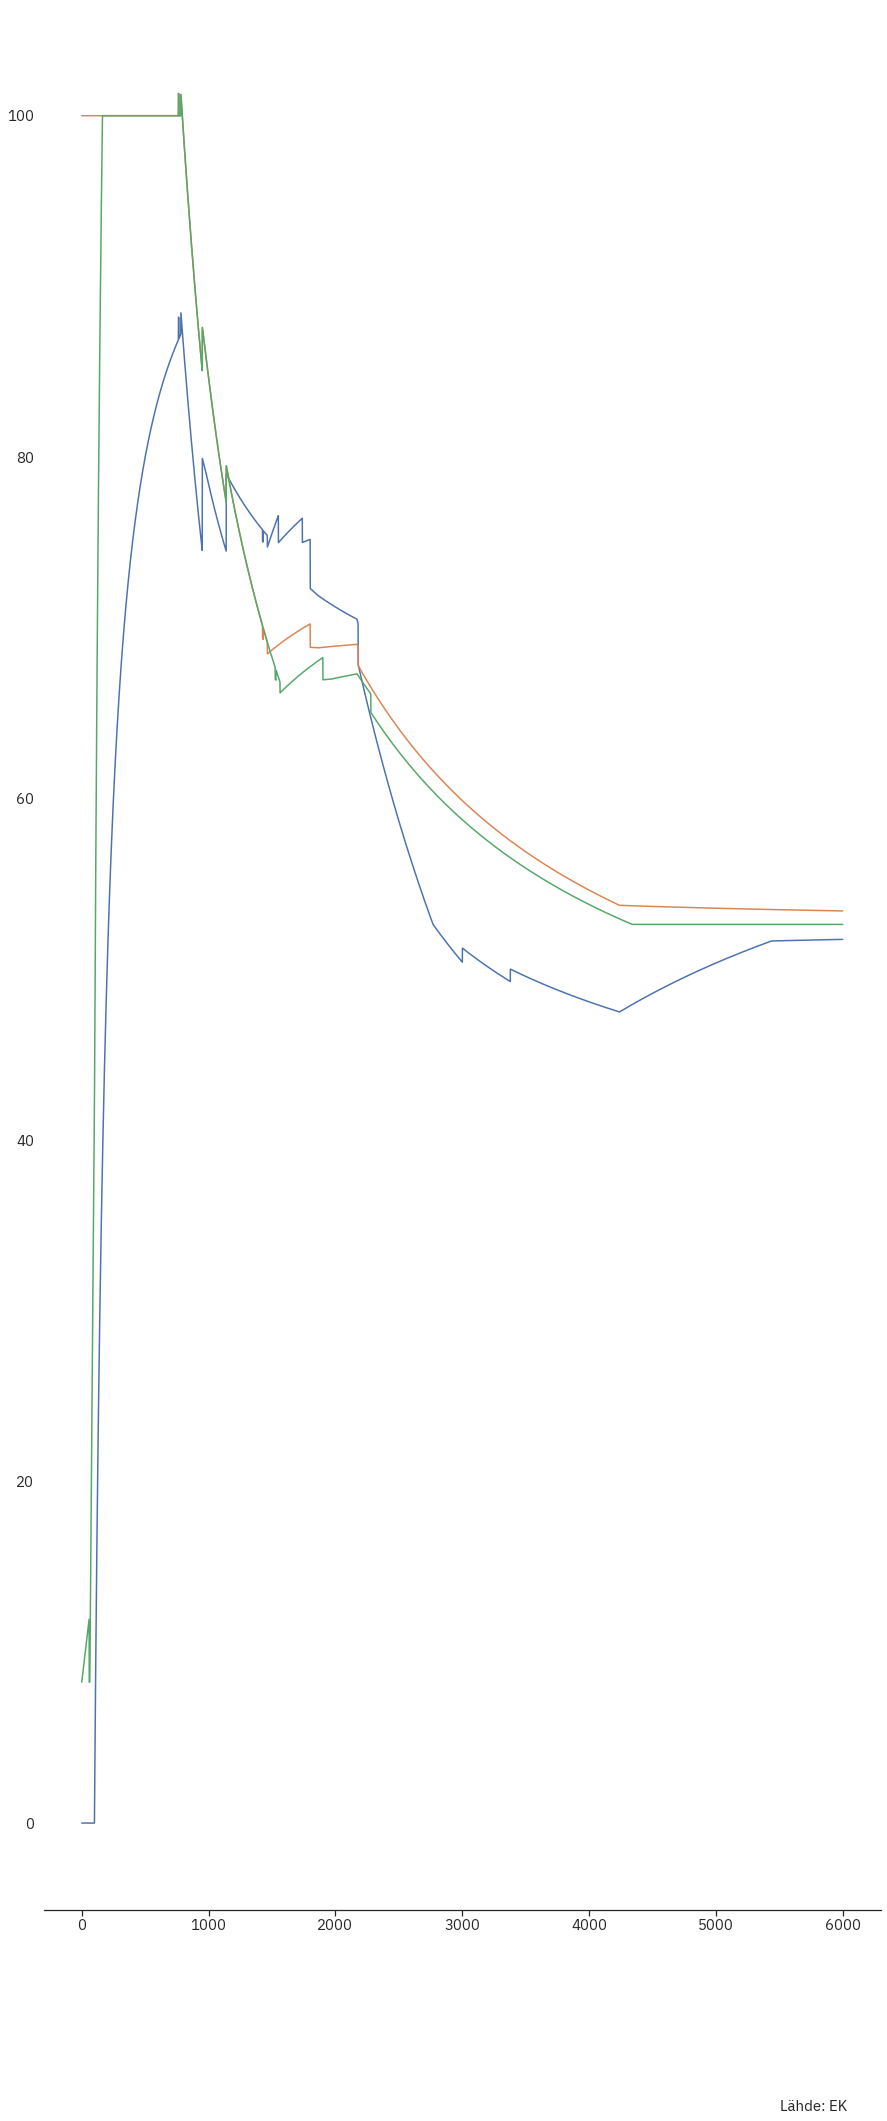

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.42404374 51.42588051
 51.42771667]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.42404374 51.42588051
 51.42771667] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


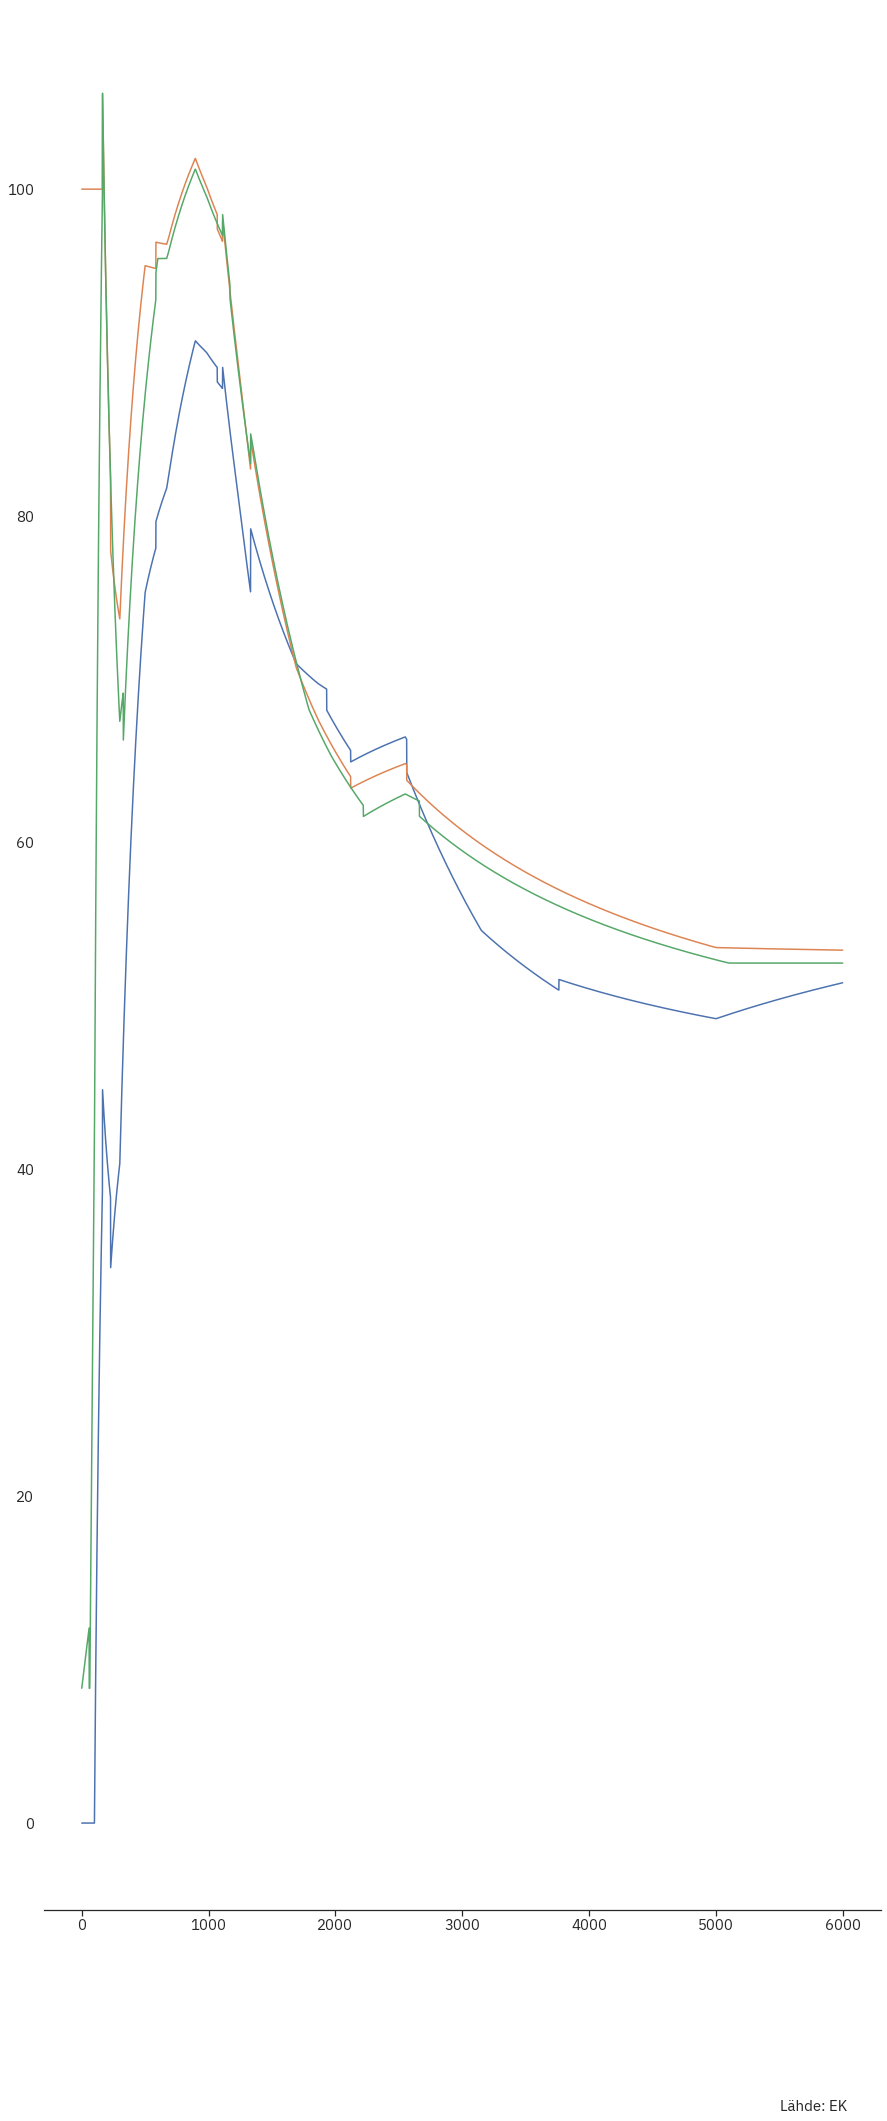

[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]


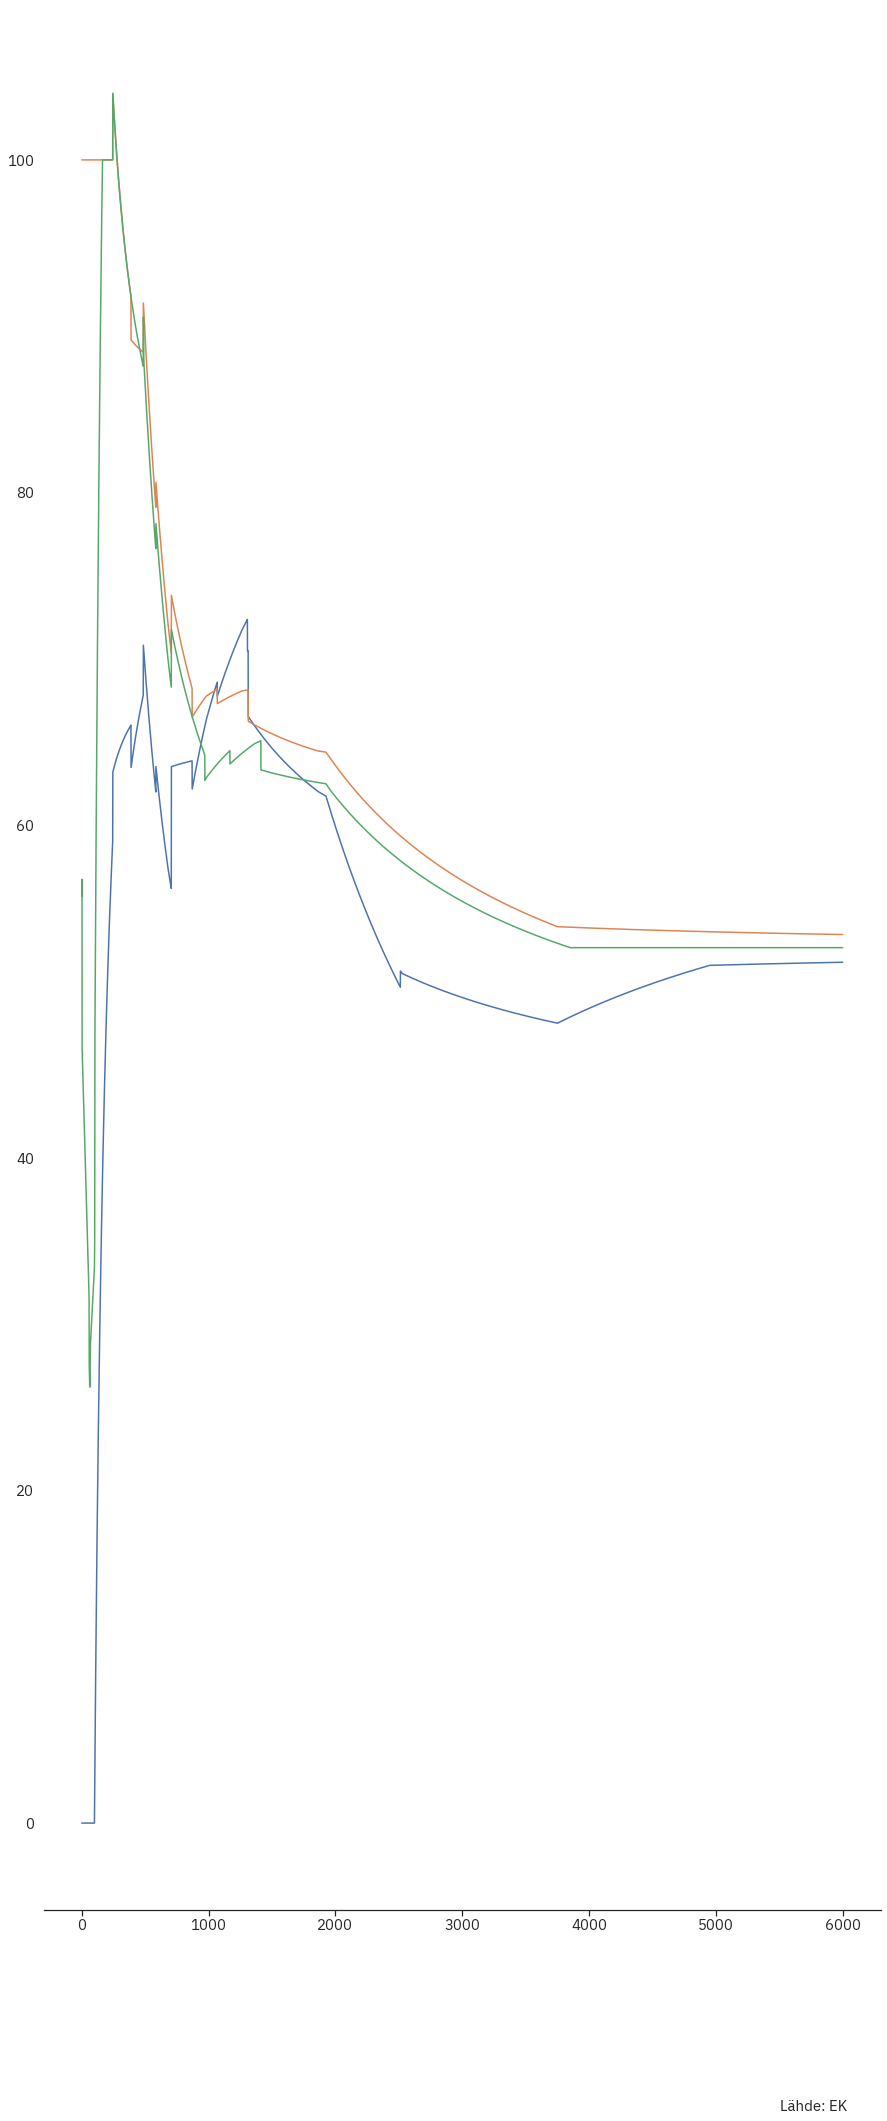

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


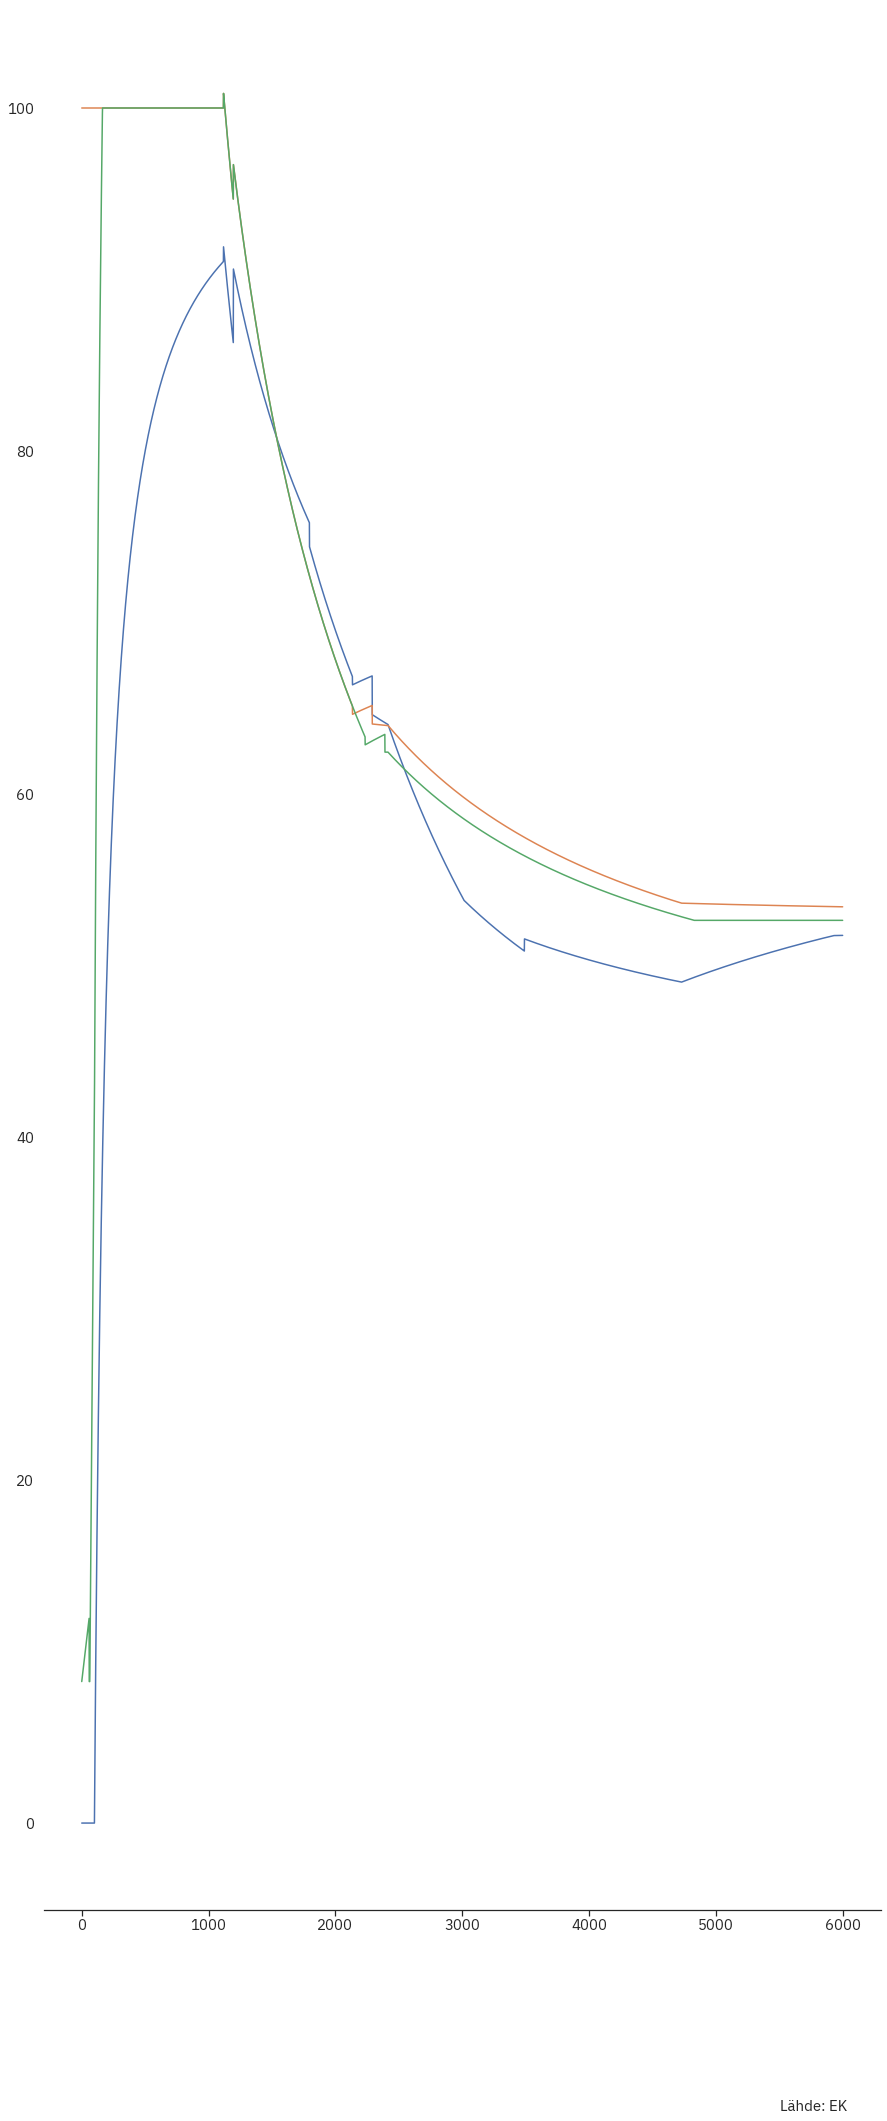

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


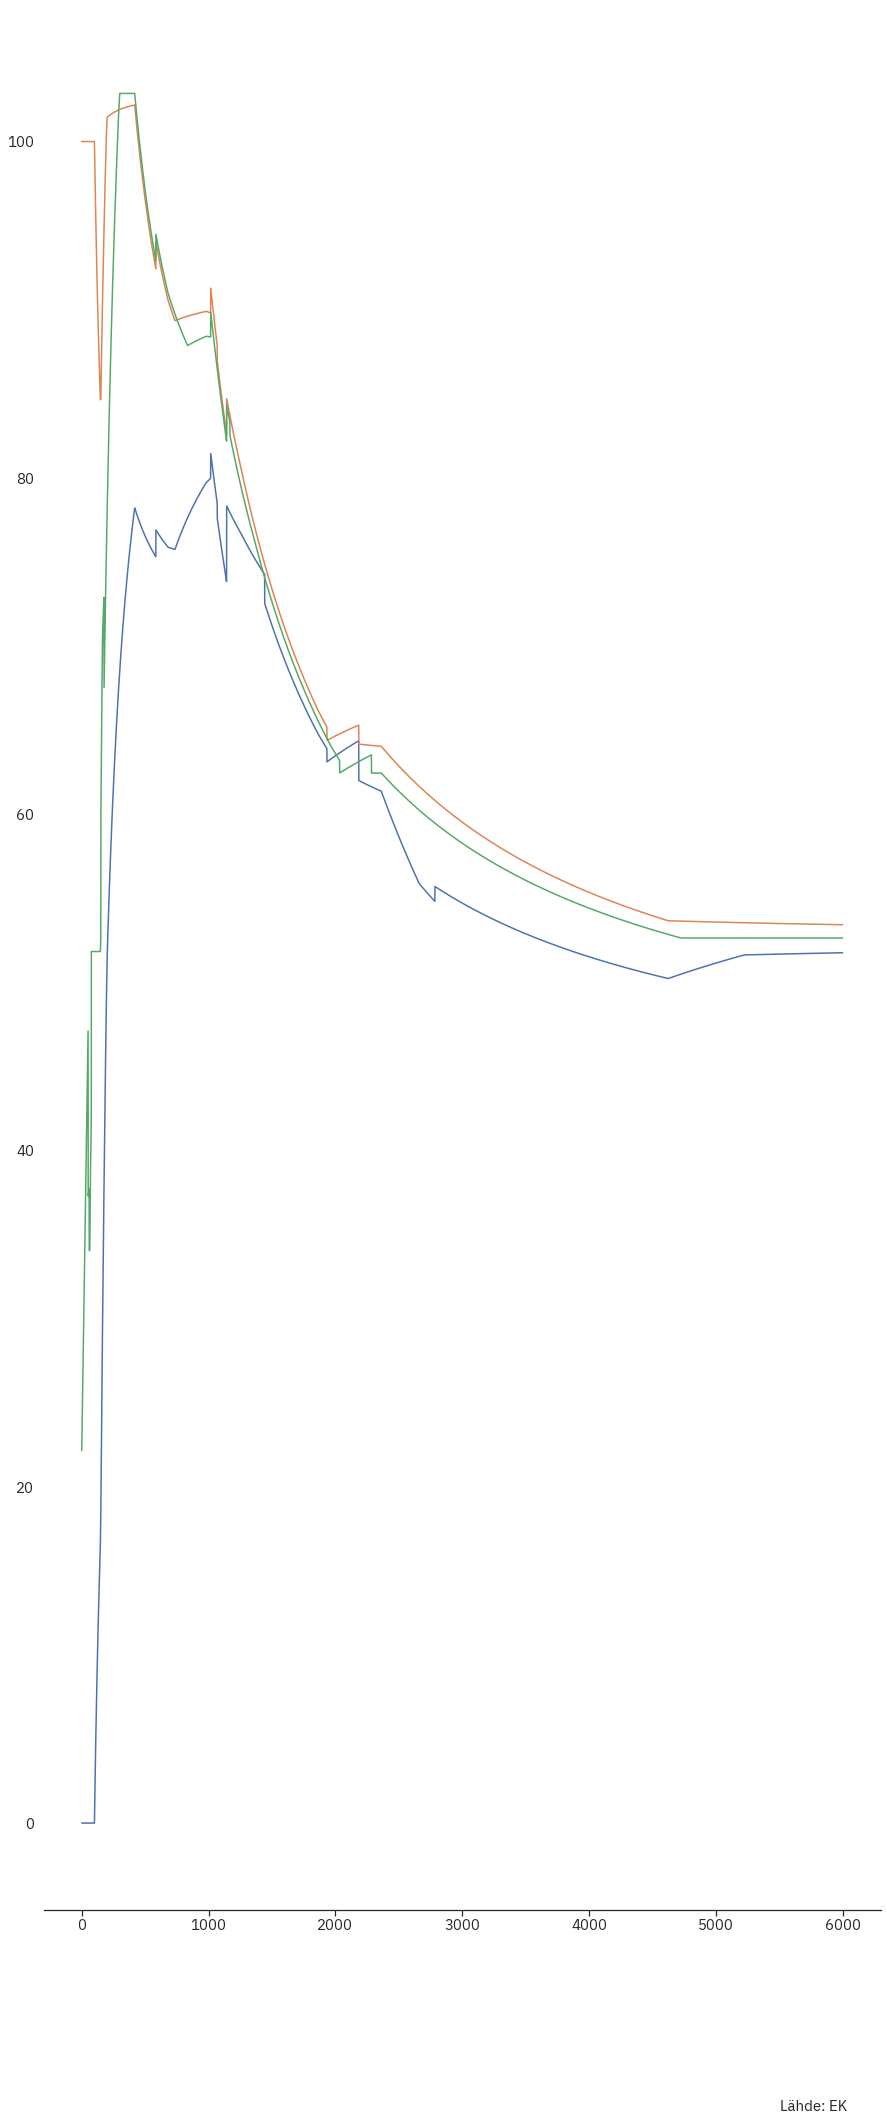

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.24547661 51.24799715
 51.25051684]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.24547661 51.24799715
 51.25051684] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


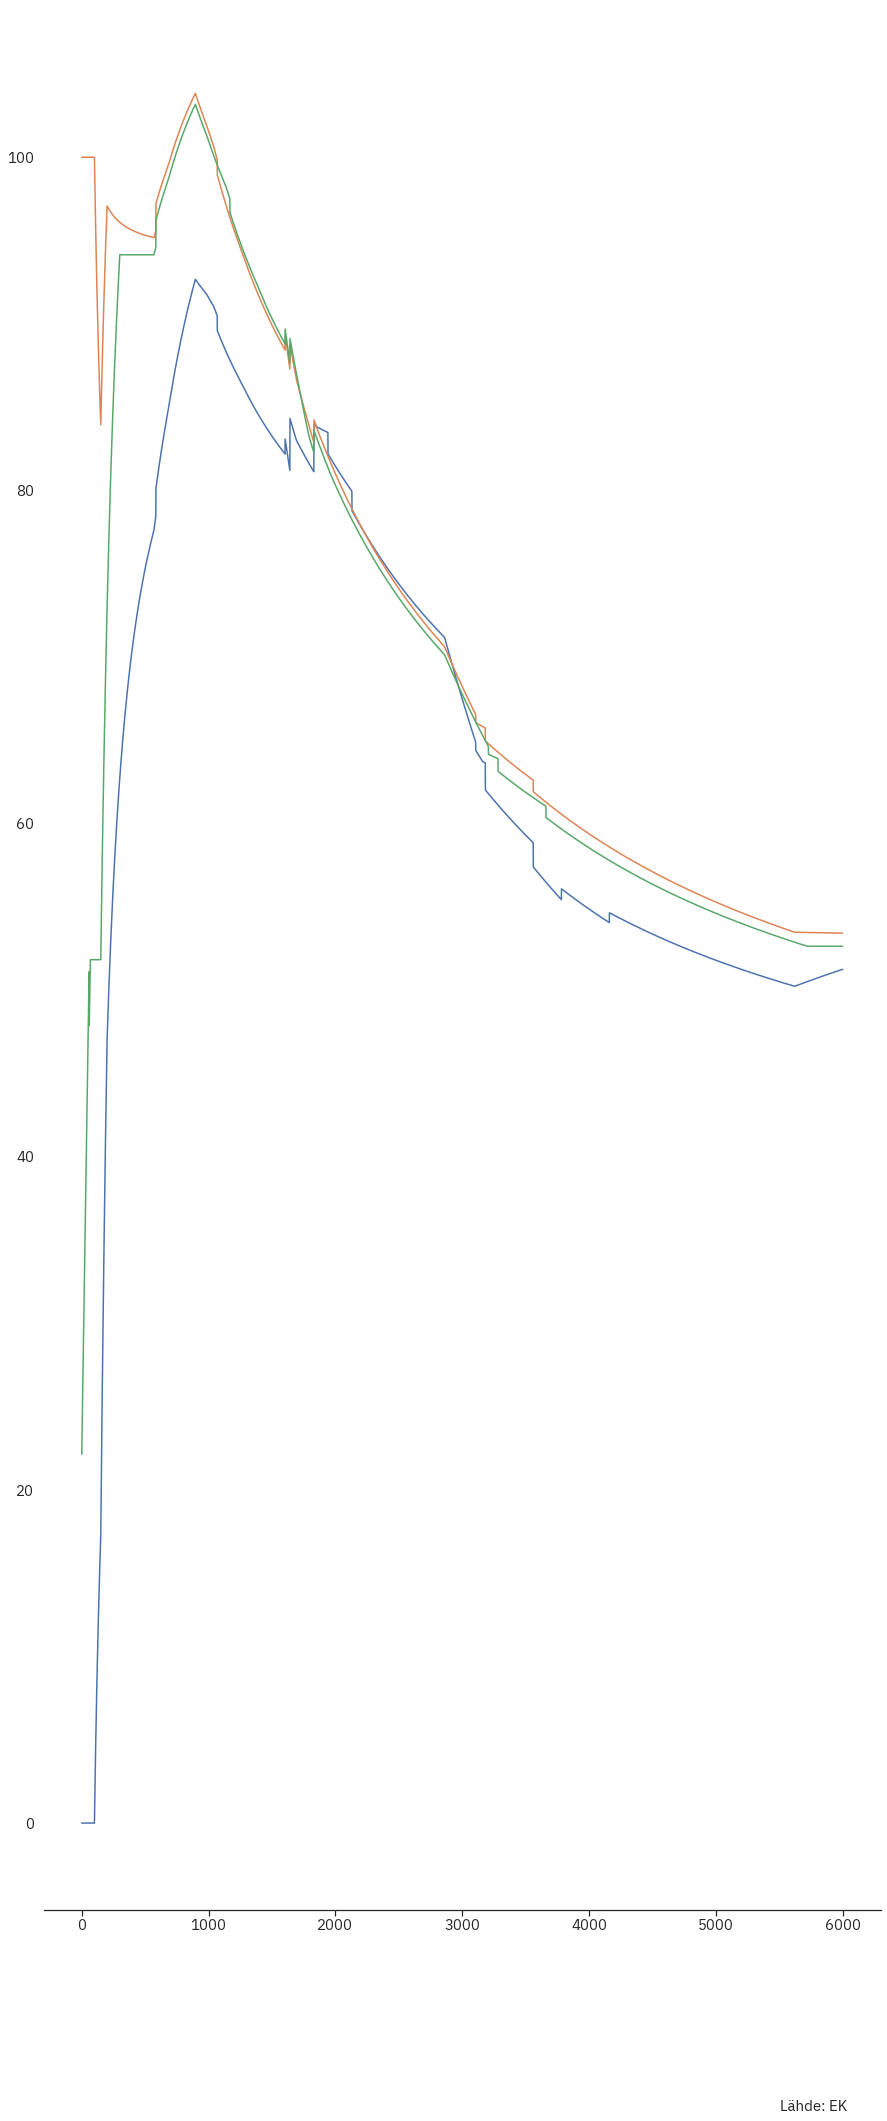

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


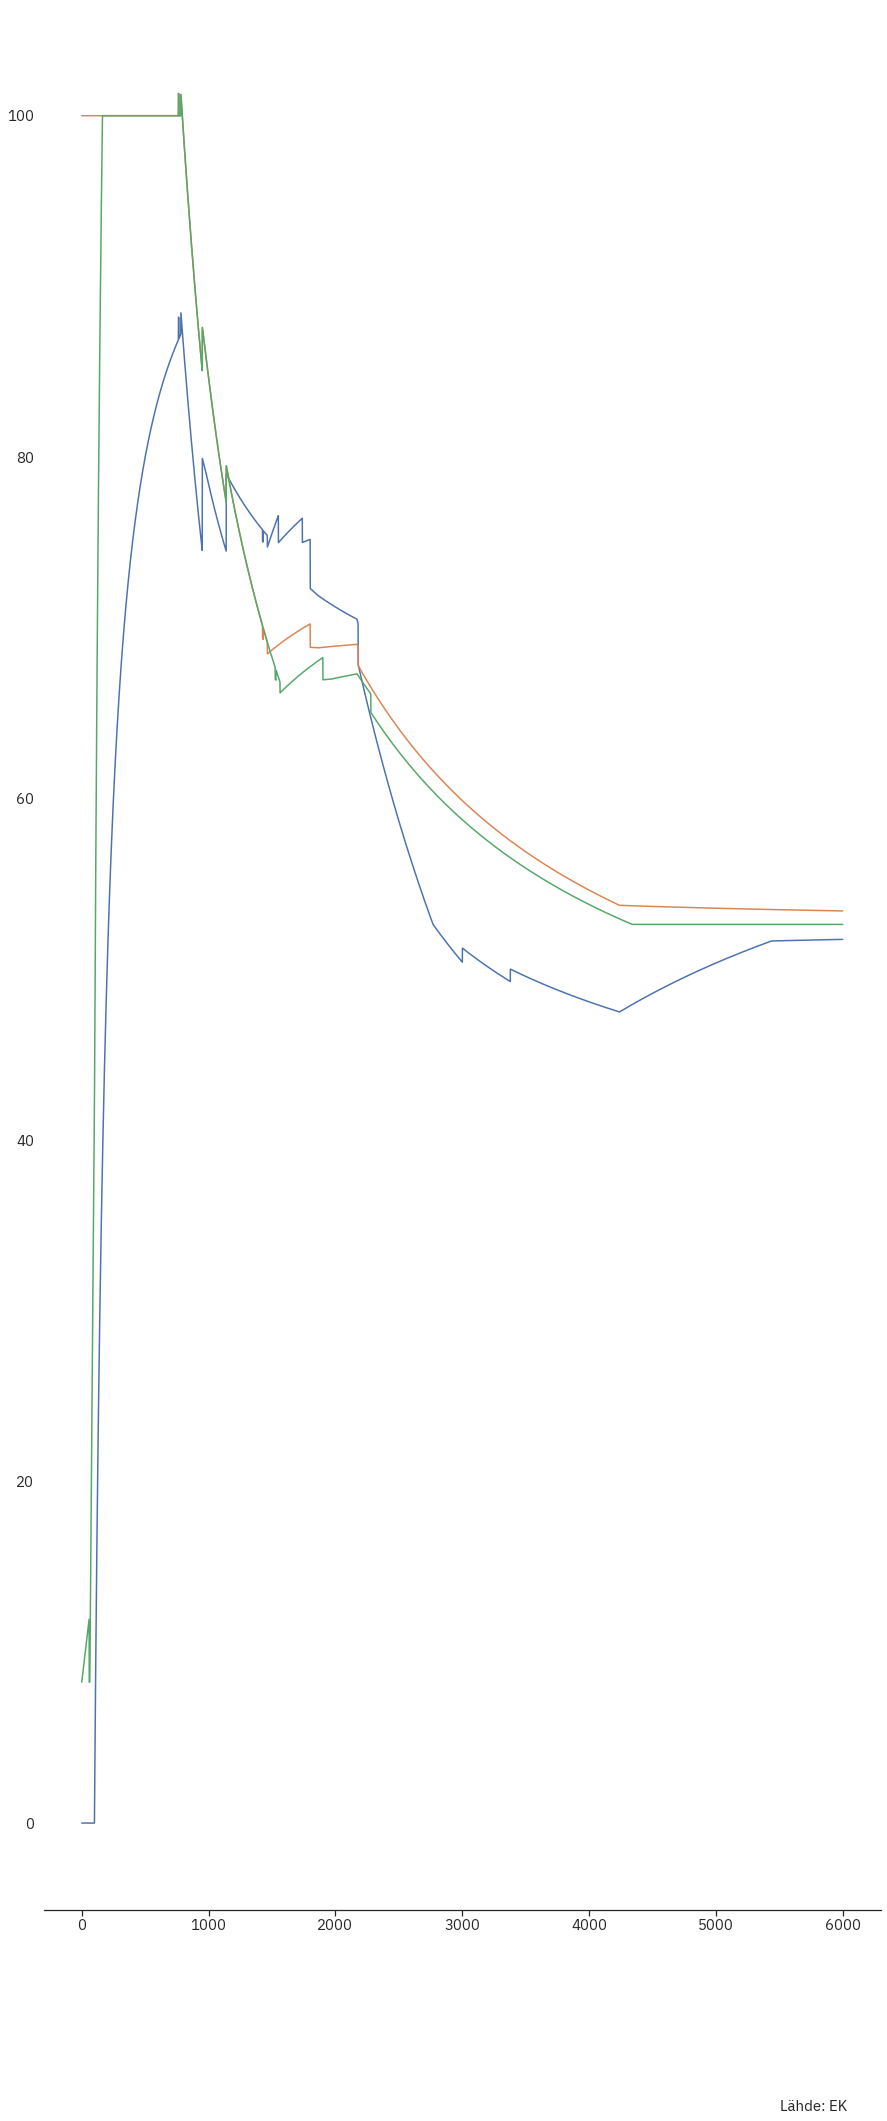

[51.07391958 51.67131542 52.26871125 ... 52.6345     52.6345
 52.6345    ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [51.07391958 51.67131542 52.26871125 ... 52.6345     52.6345
 52.6345    ]


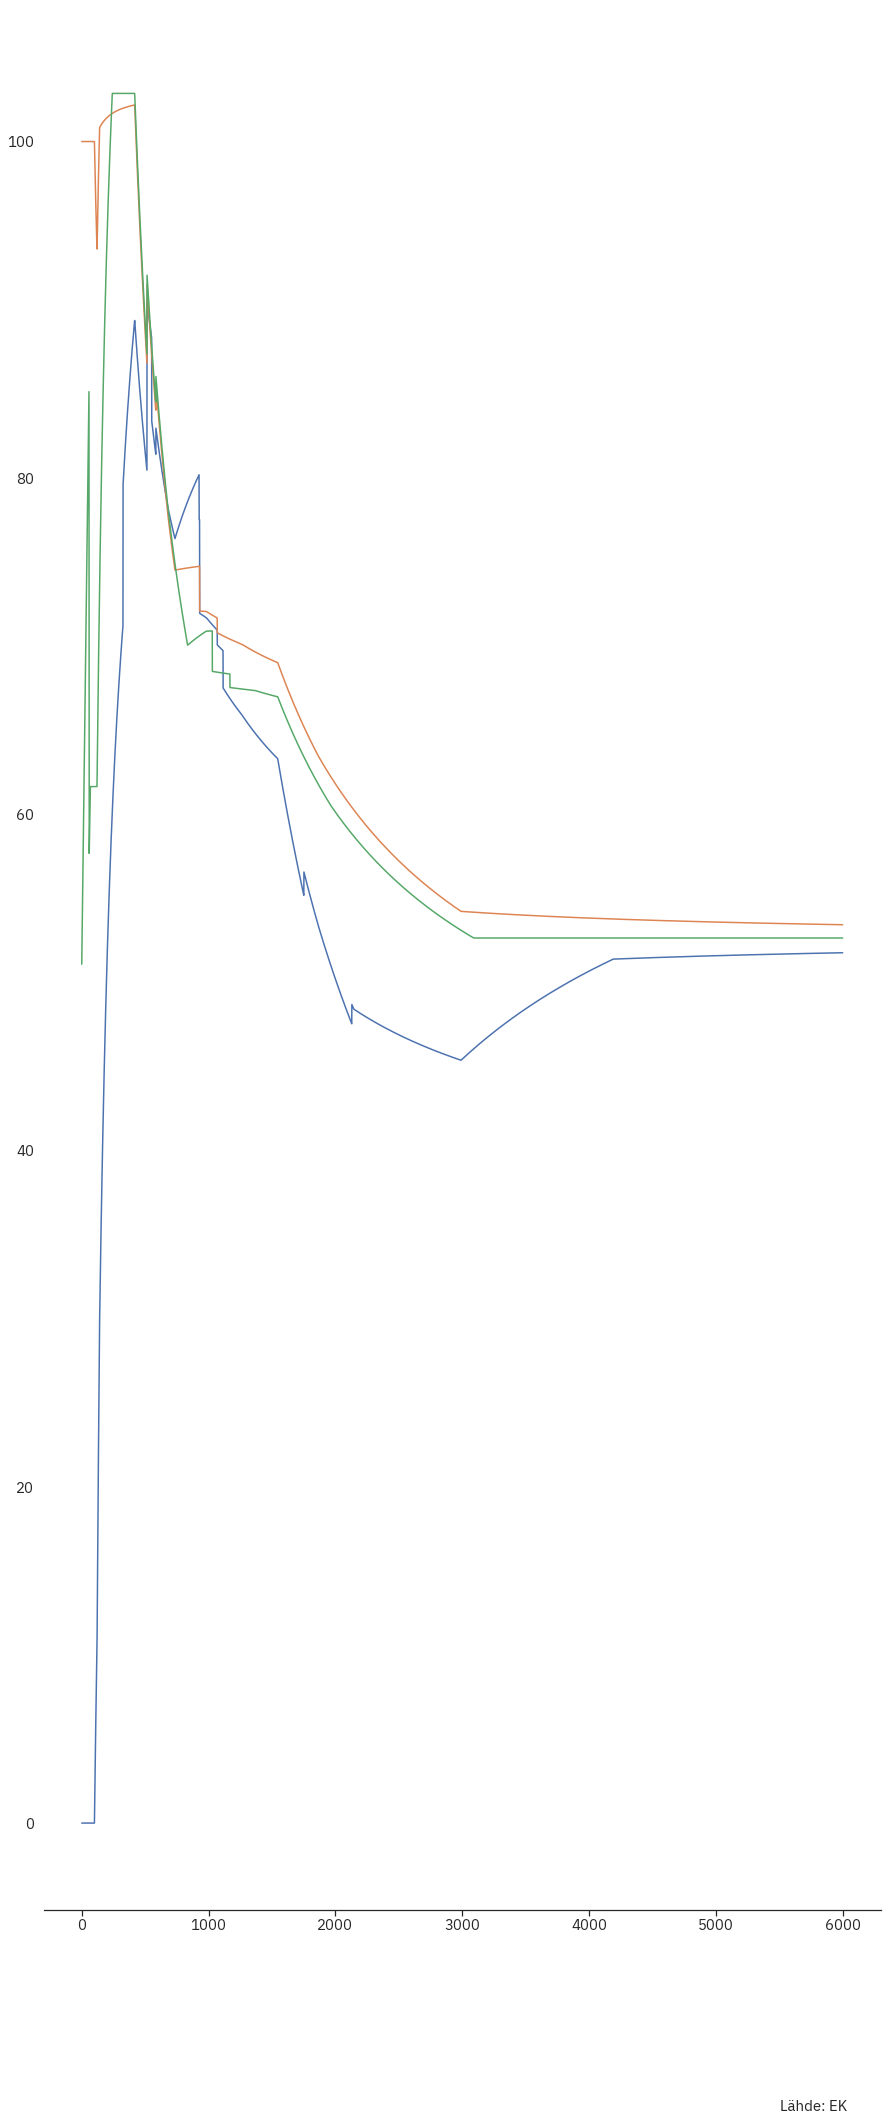

[31.95208333 32.45139583 32.95070833 ... 52.6345     52.6345
 52.6345    ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [31.95208333 32.45139583 32.95070833 ... 52.6345     52.6345
 52.6345    ]


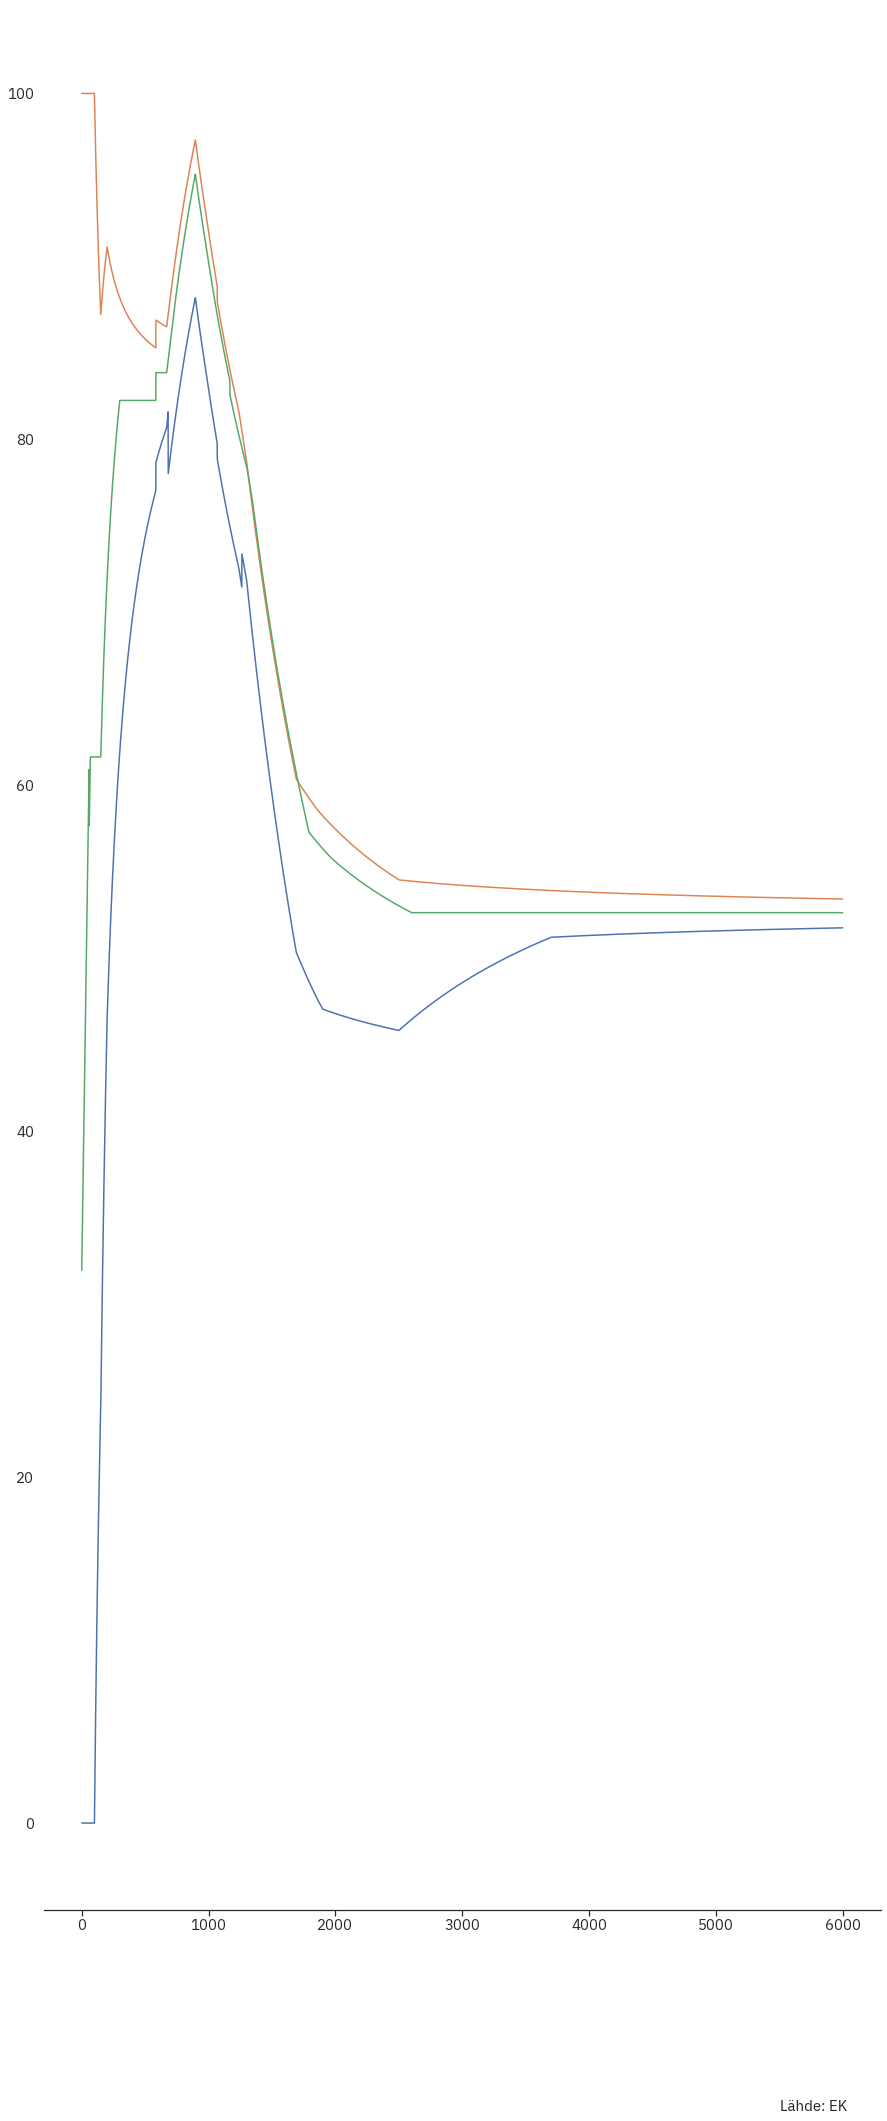

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


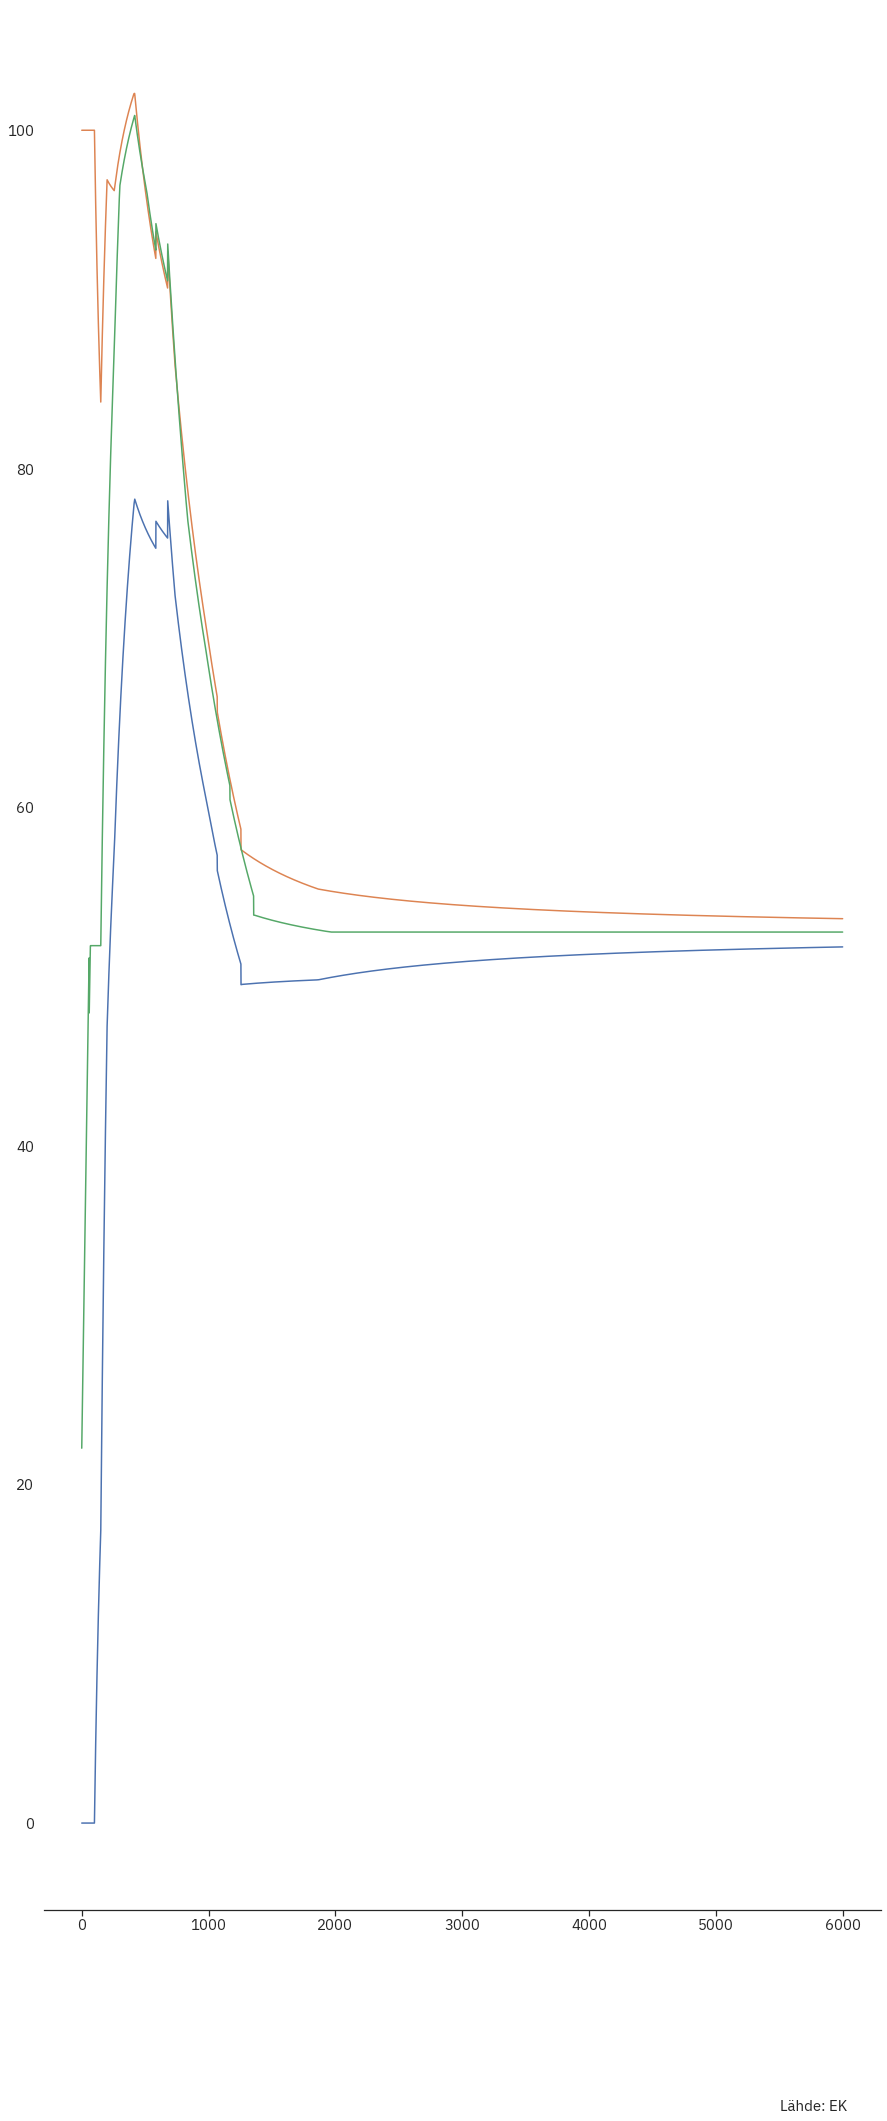

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


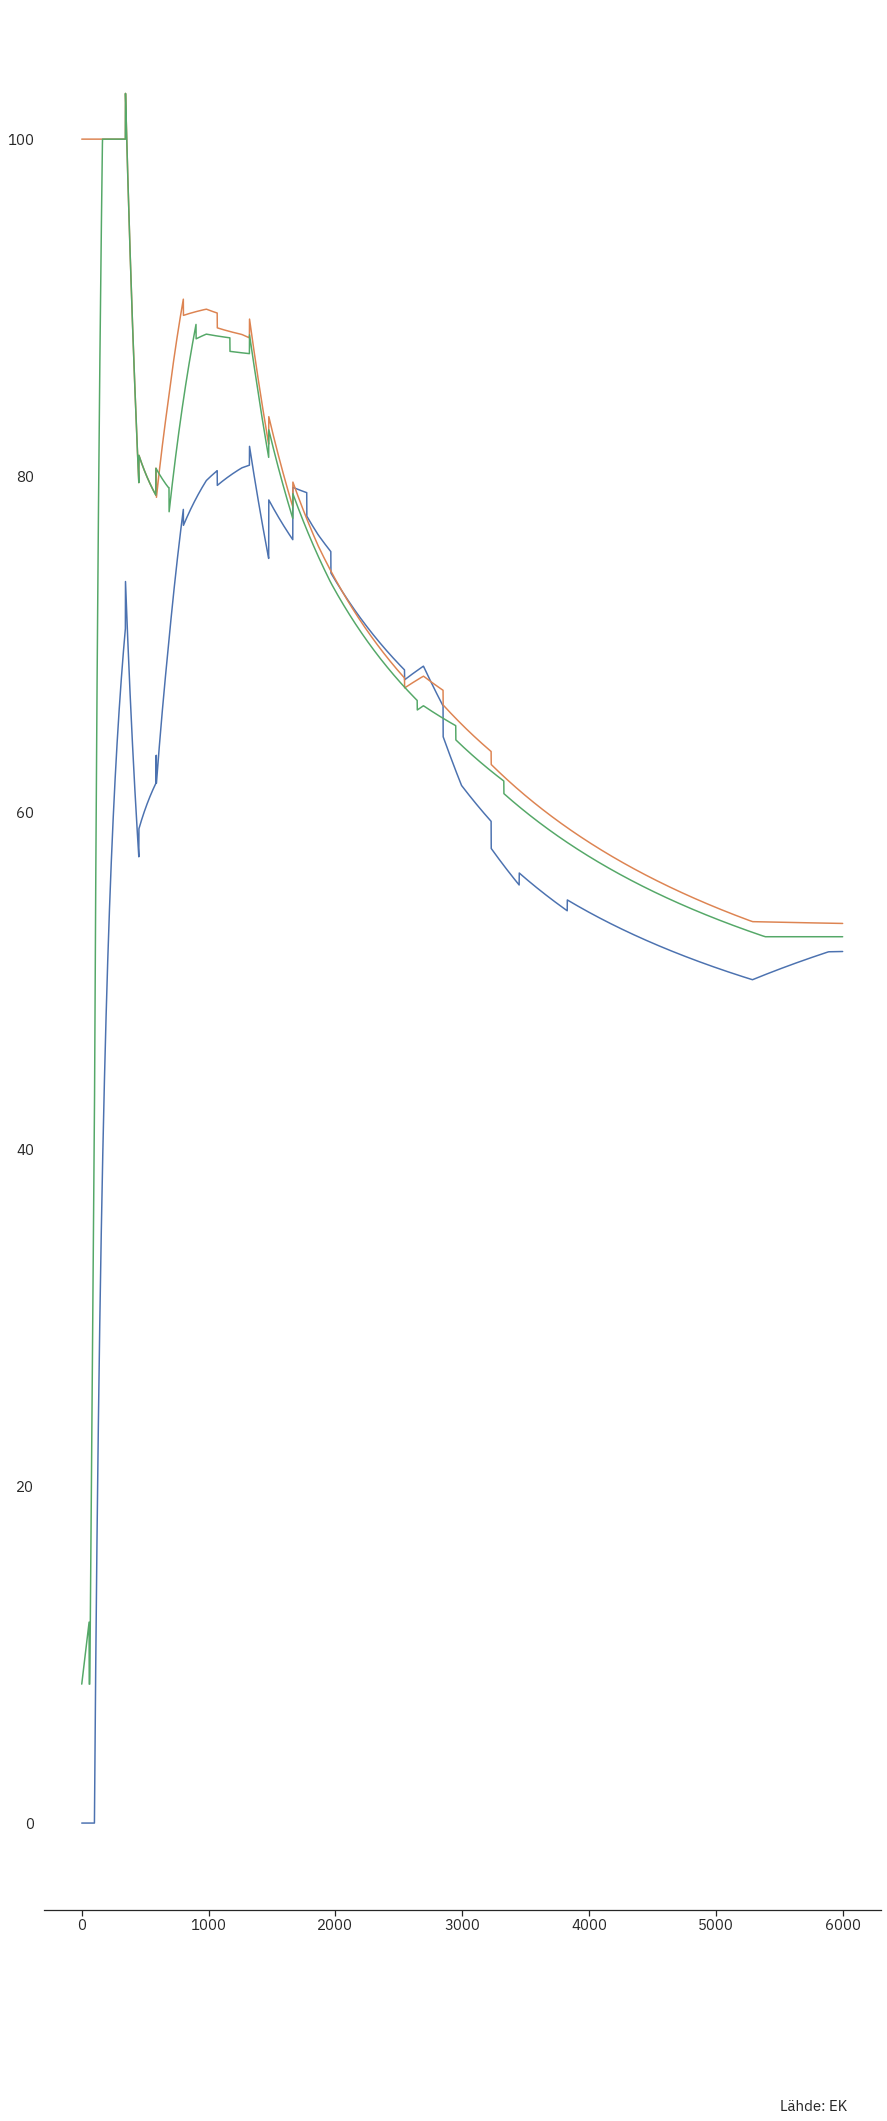

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


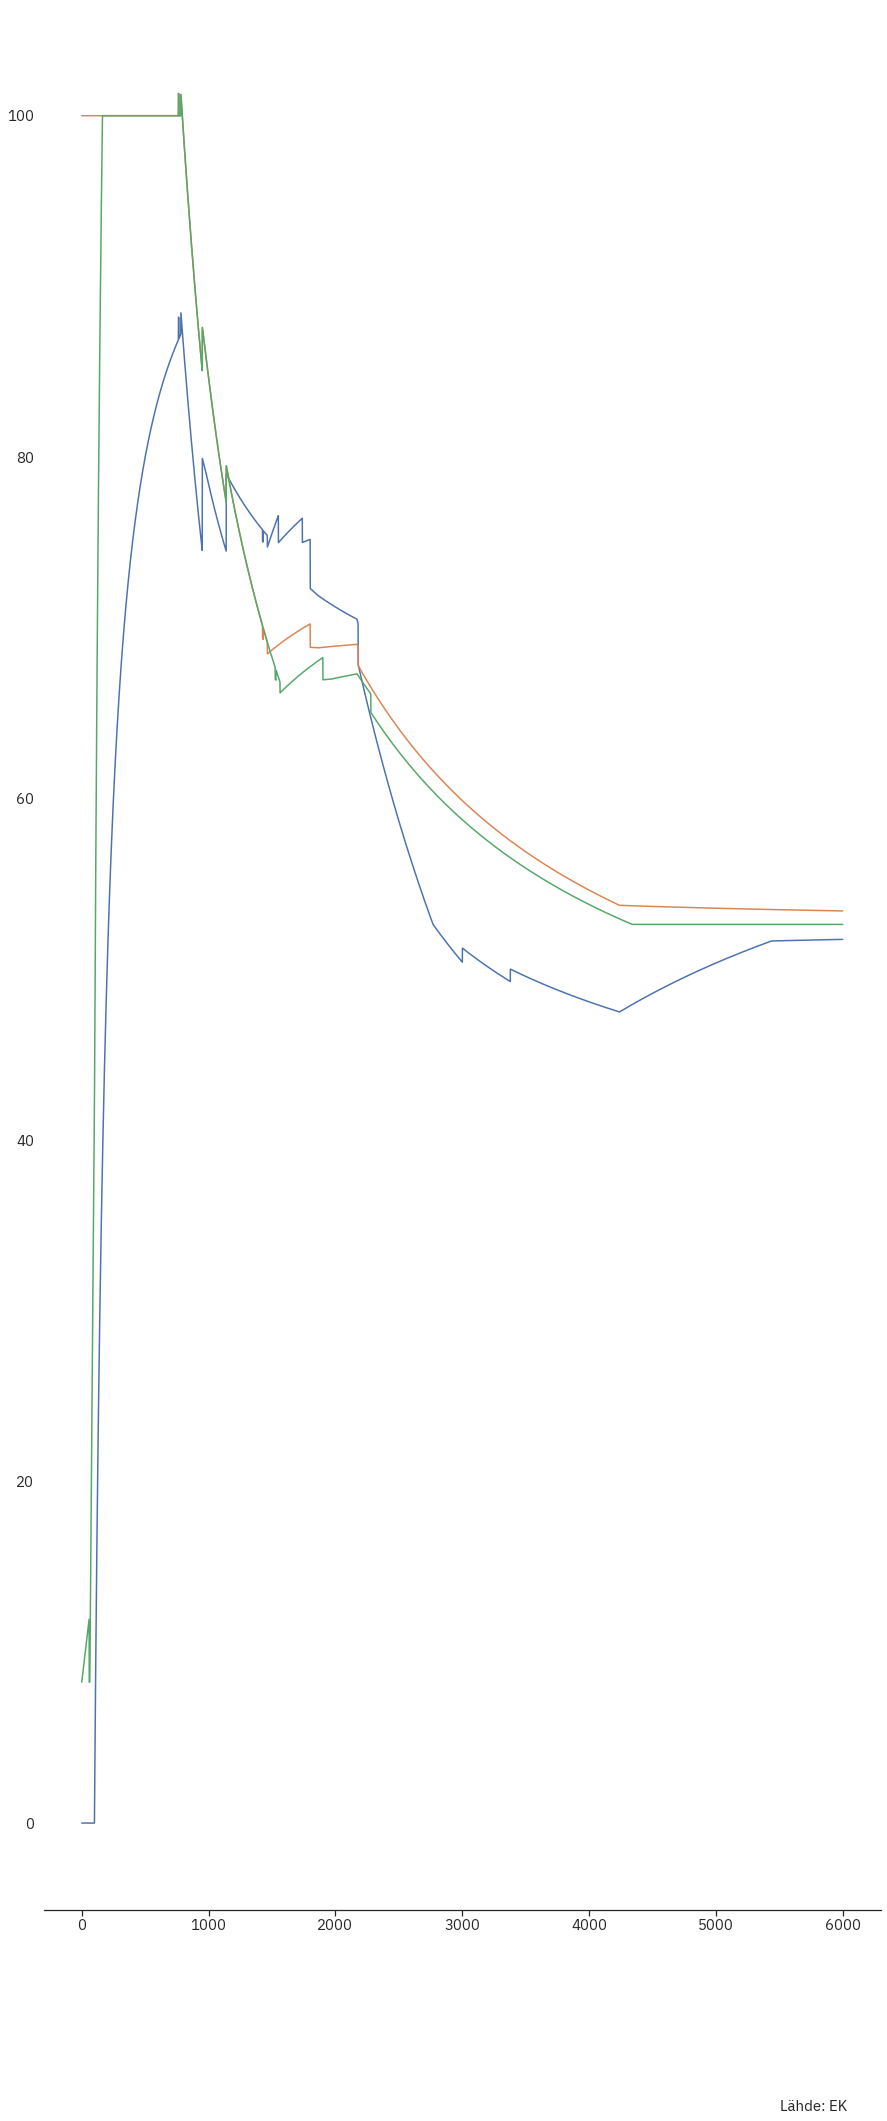

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


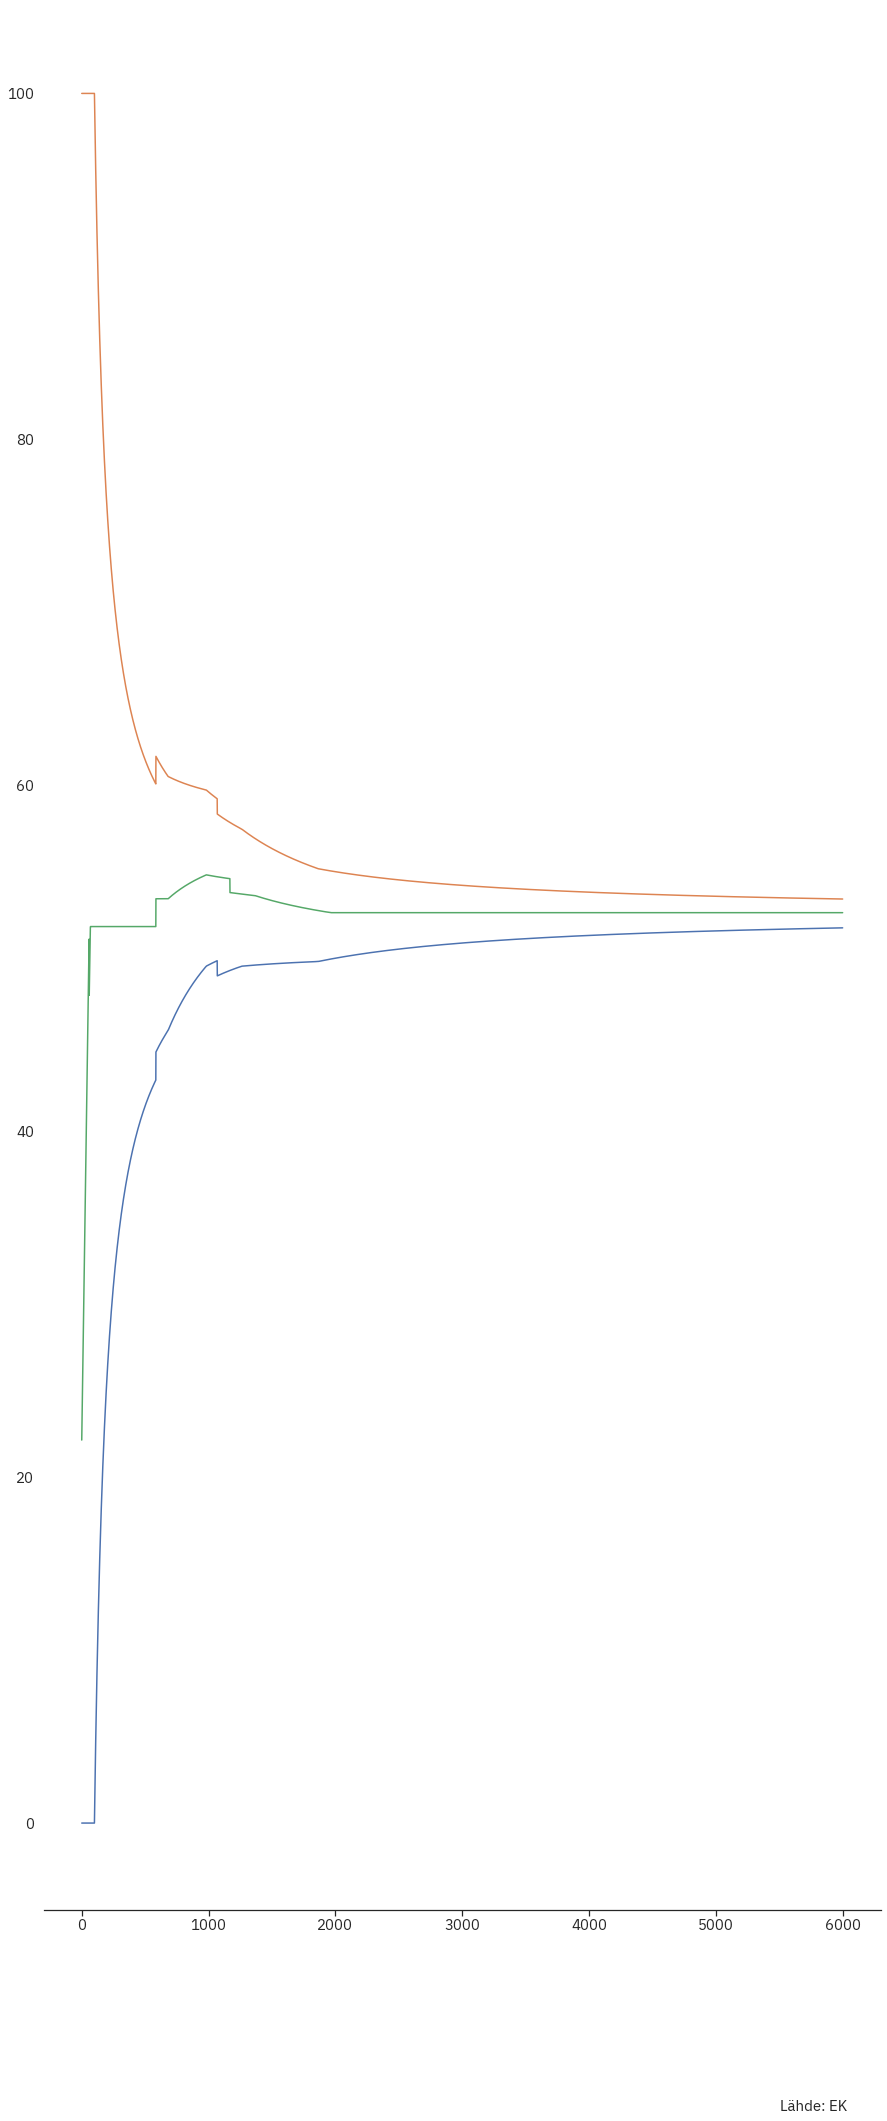

[35.87541667 36.37472917 36.87404167 ... 52.6345     52.6345
 52.6345    ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [35.87541667 36.37472917 36.87404167 ... 52.6345     52.6345
 52.6345    ]


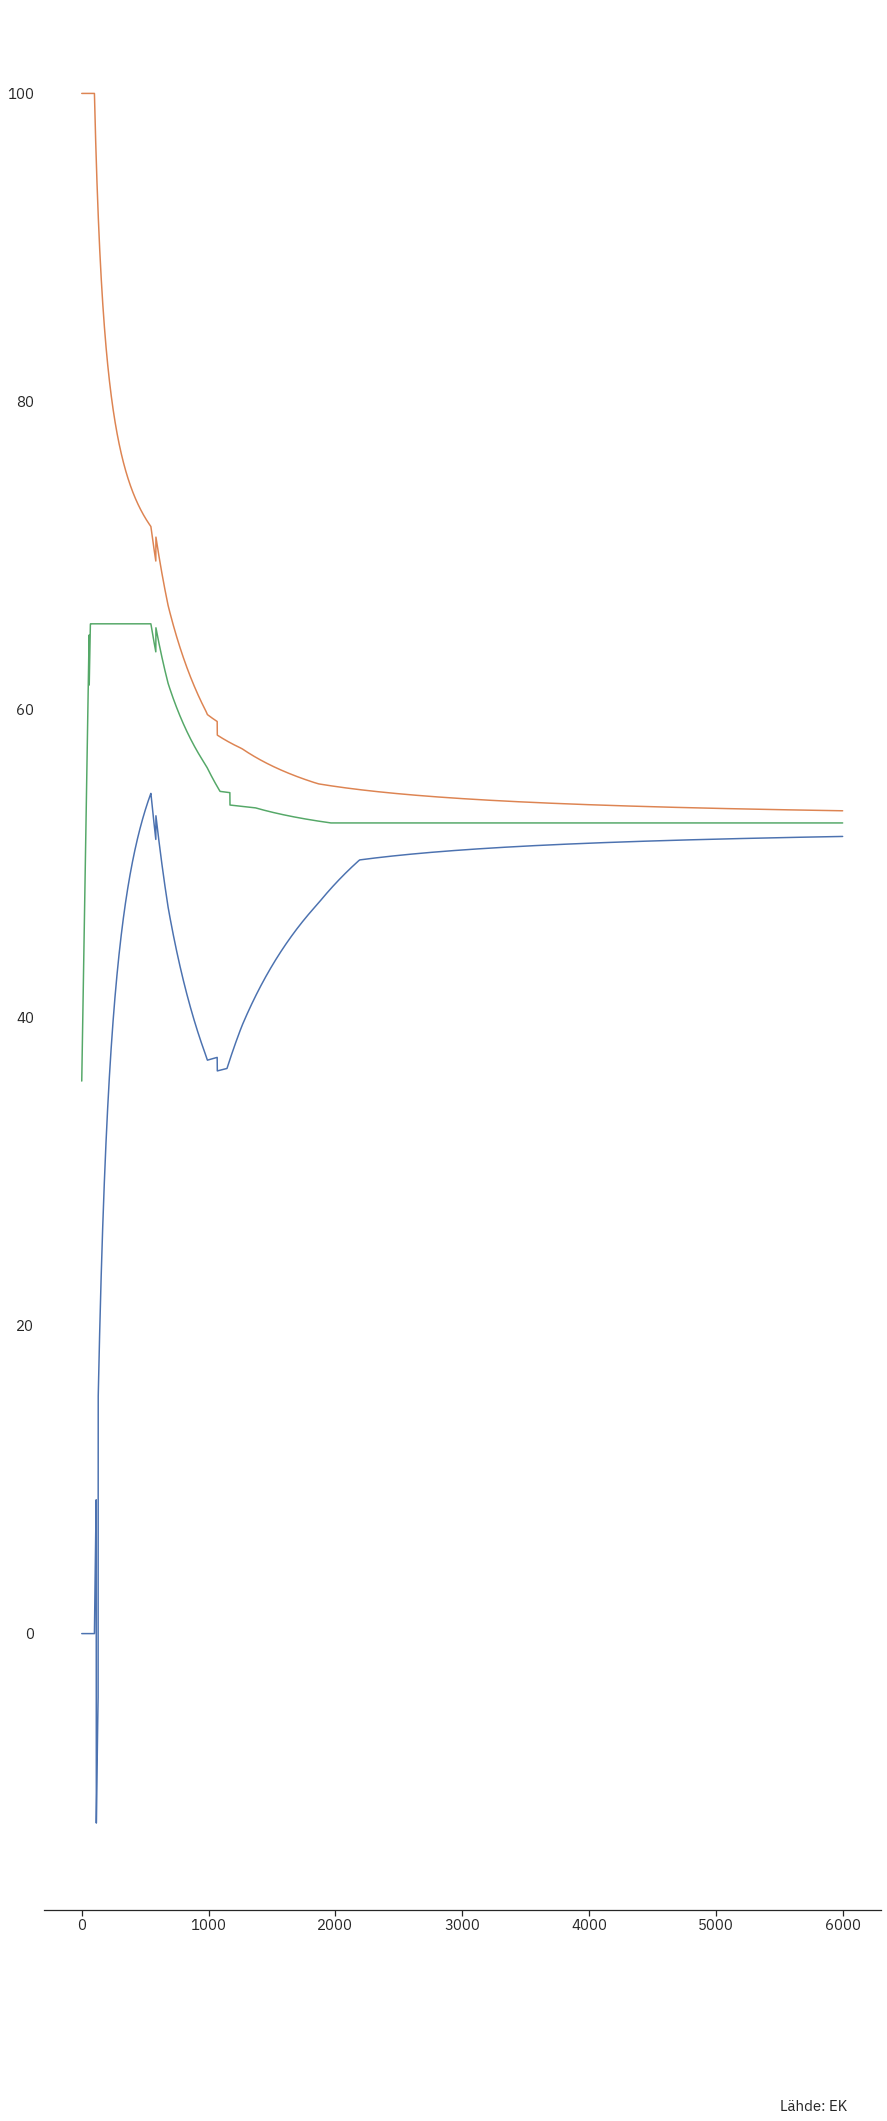

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


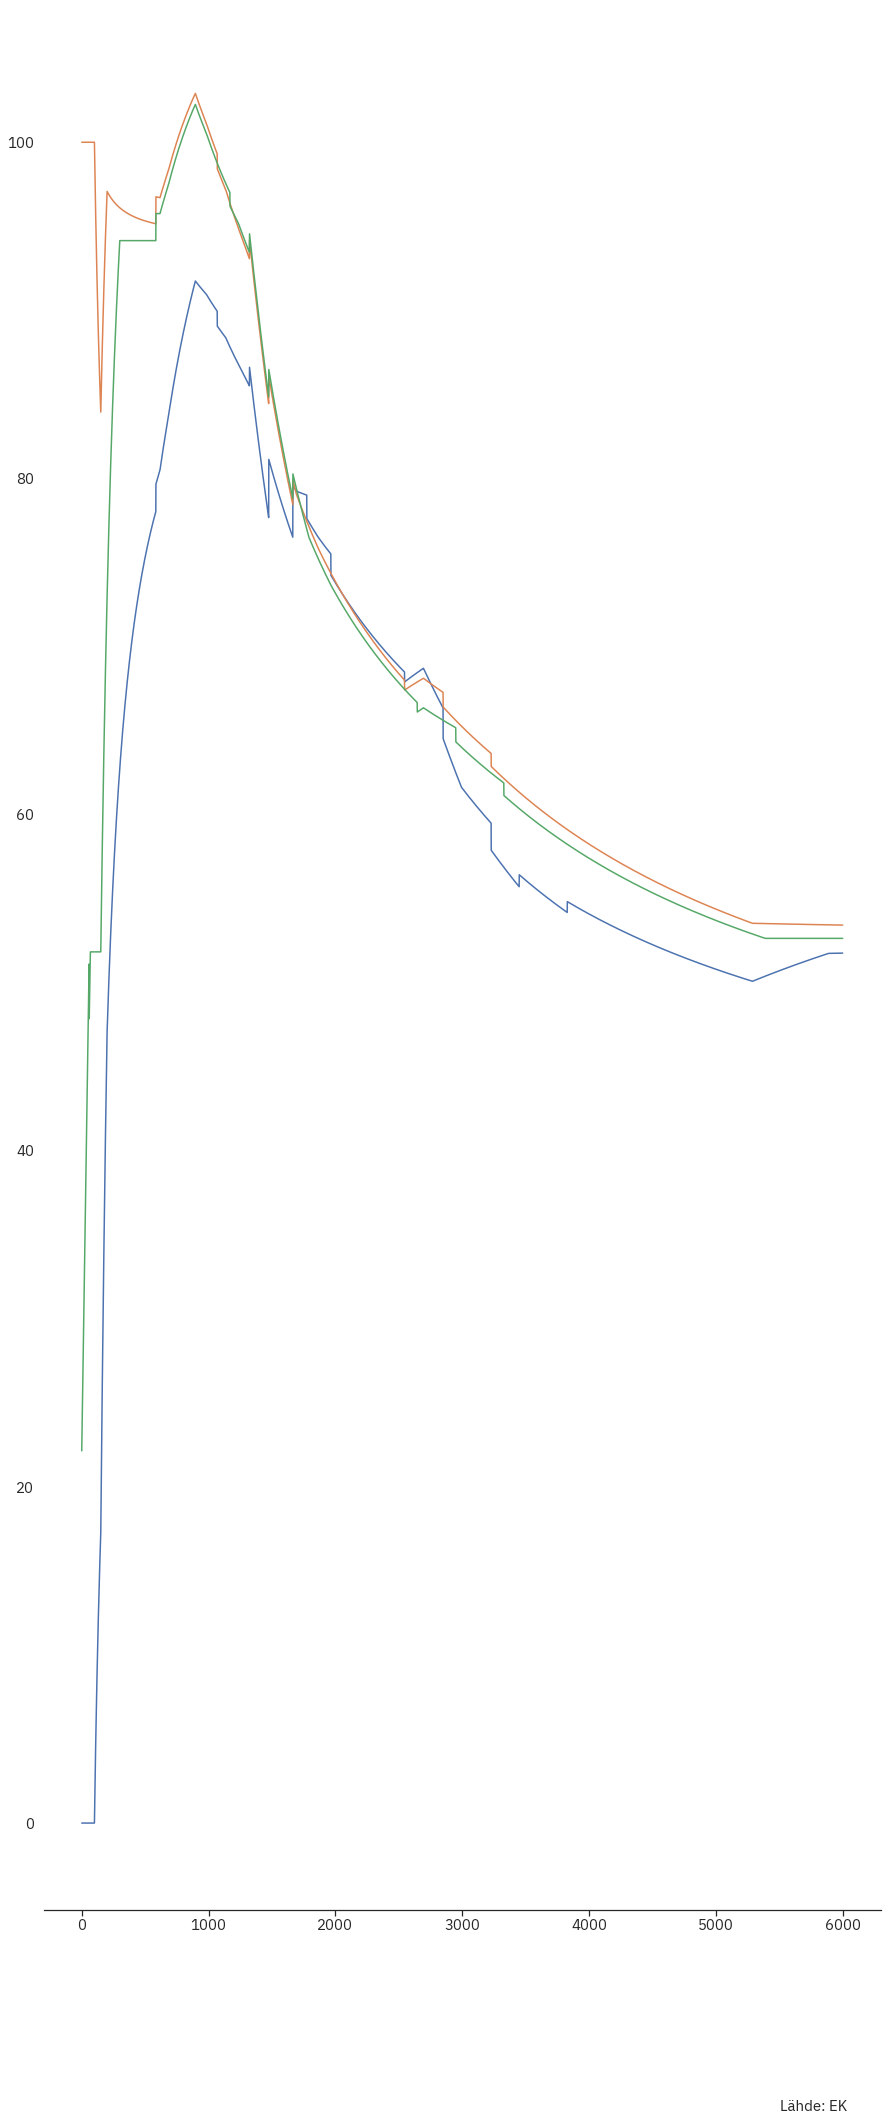

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


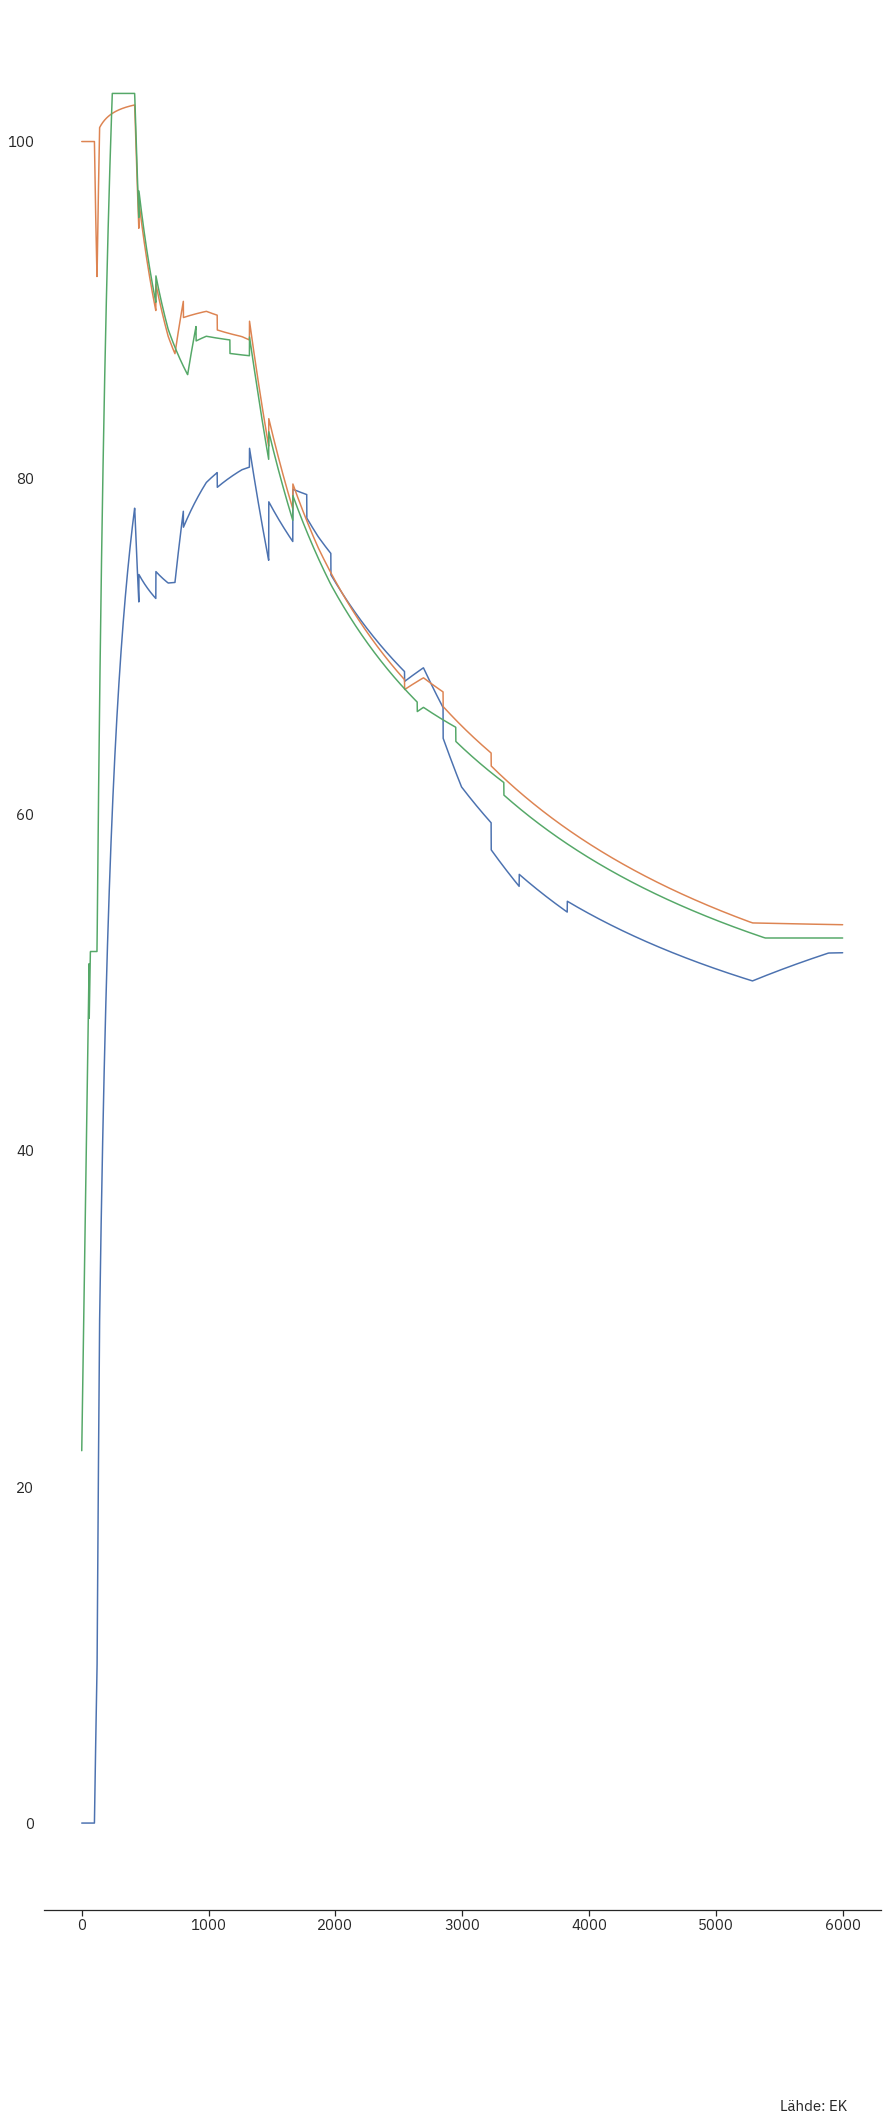

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


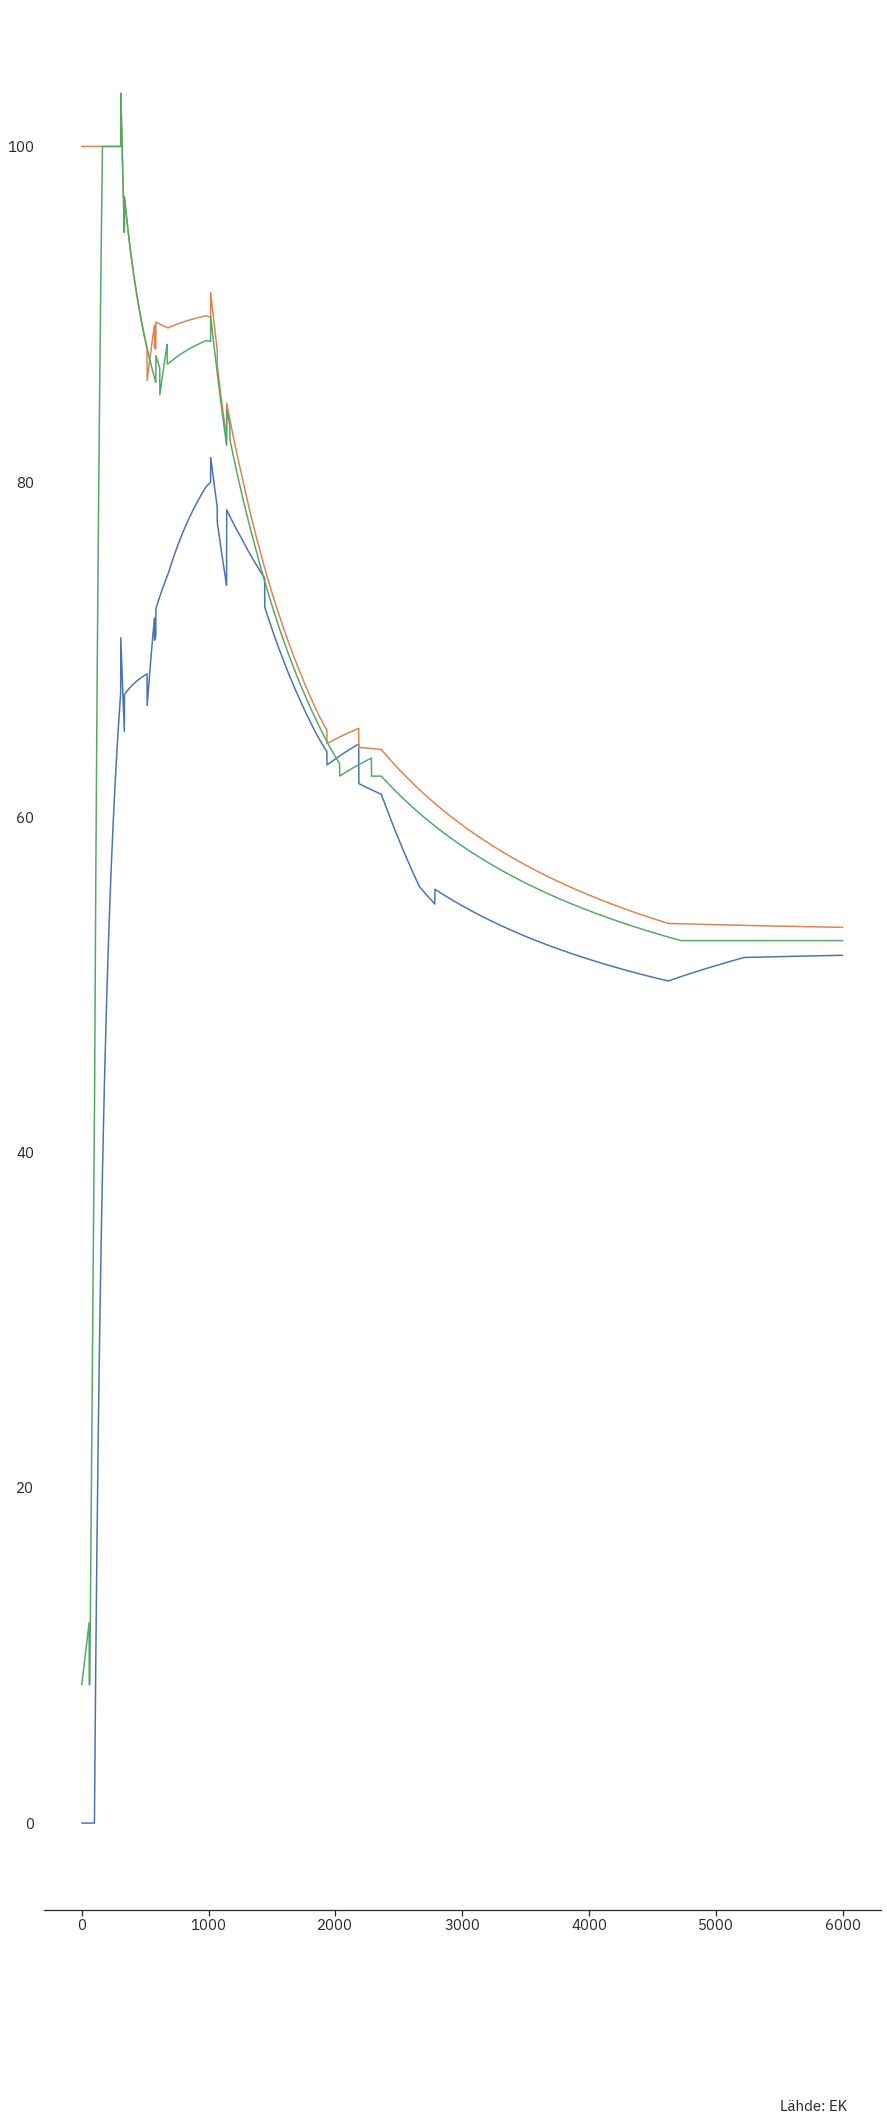

[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]


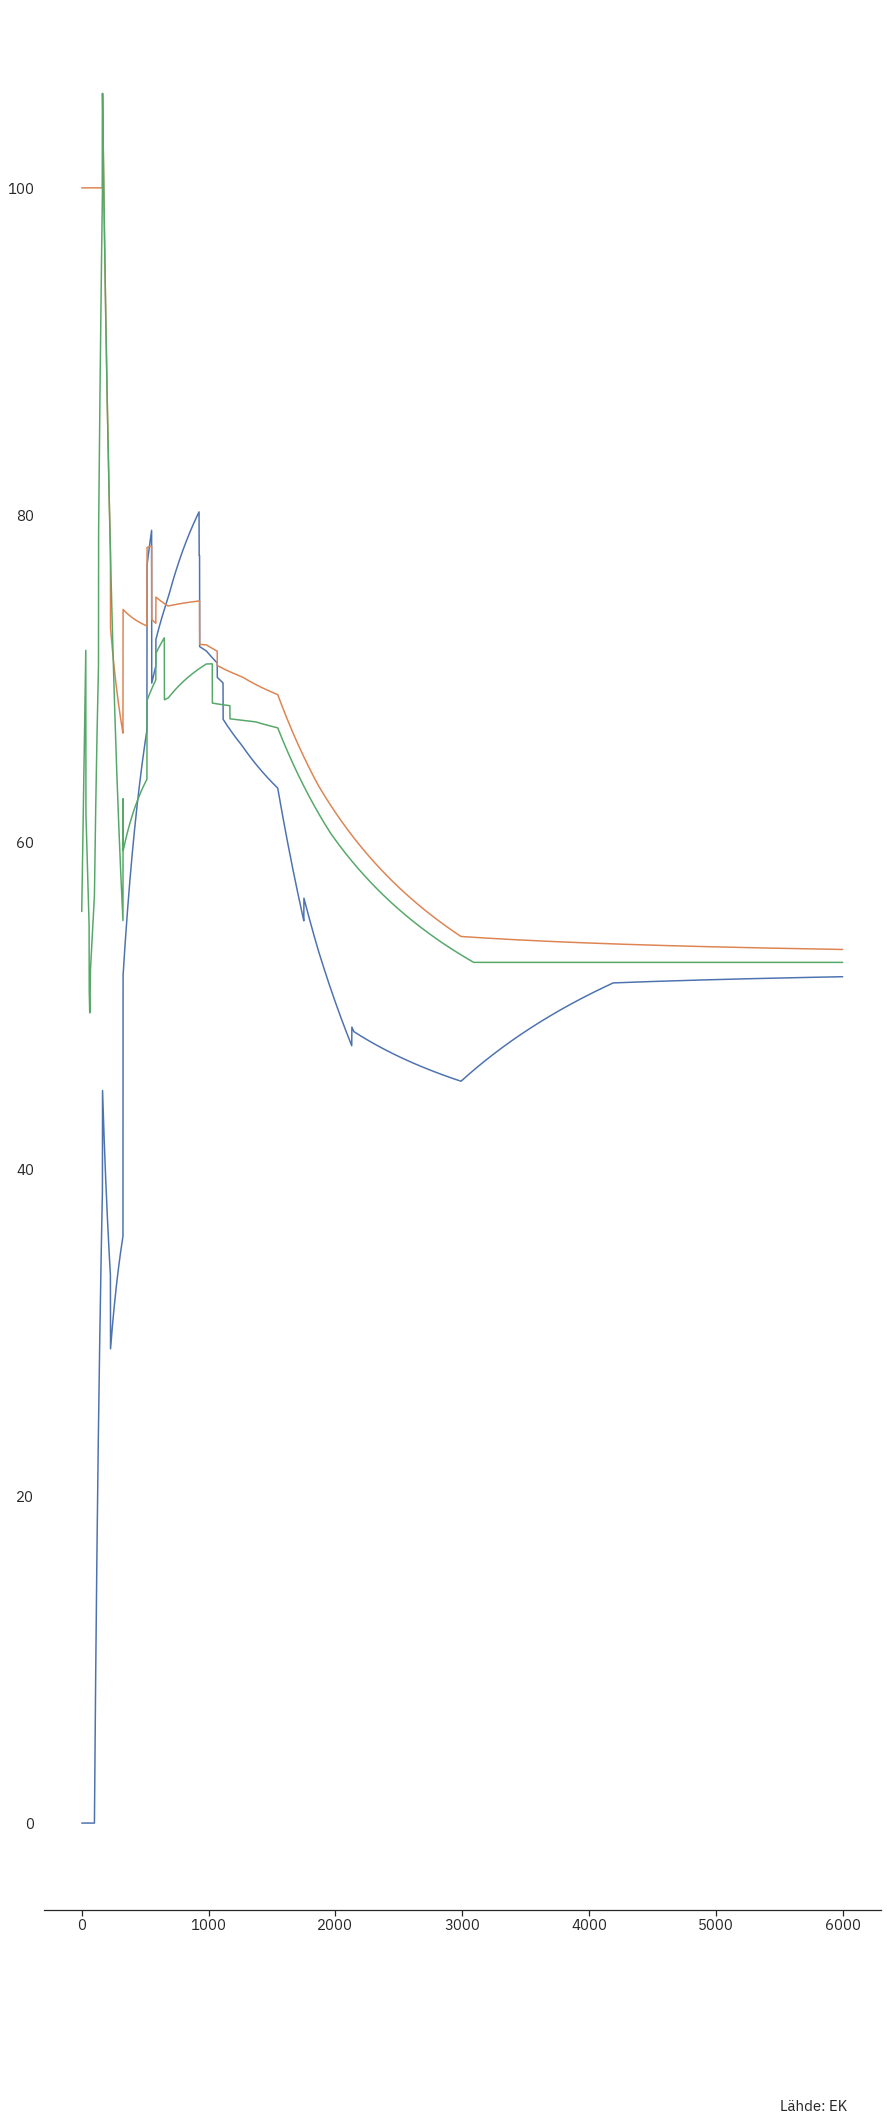

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 50.62439802 50.62636809
 50.6283375 ]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 50.62439802 50.62636809
 50.6283375 ] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


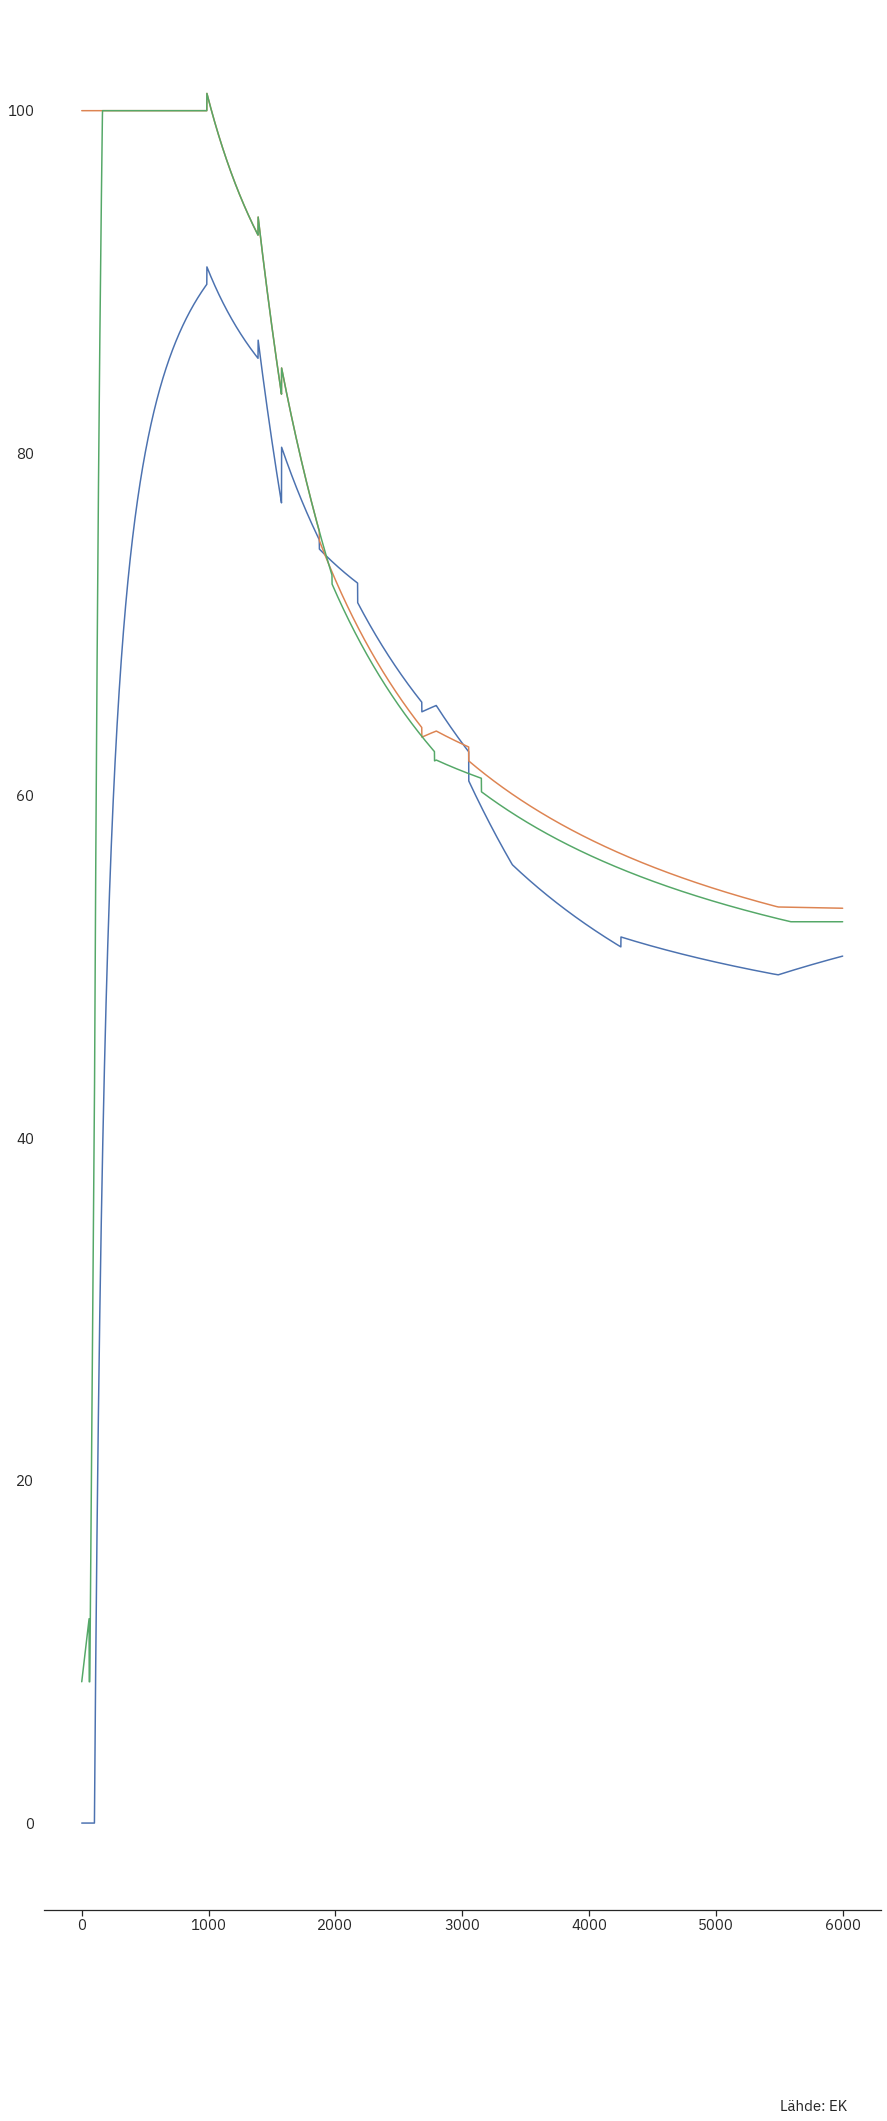

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 50.62439802 50.62636809
 50.6283375 ]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 50.62439802 50.62636809
 50.6283375 ] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


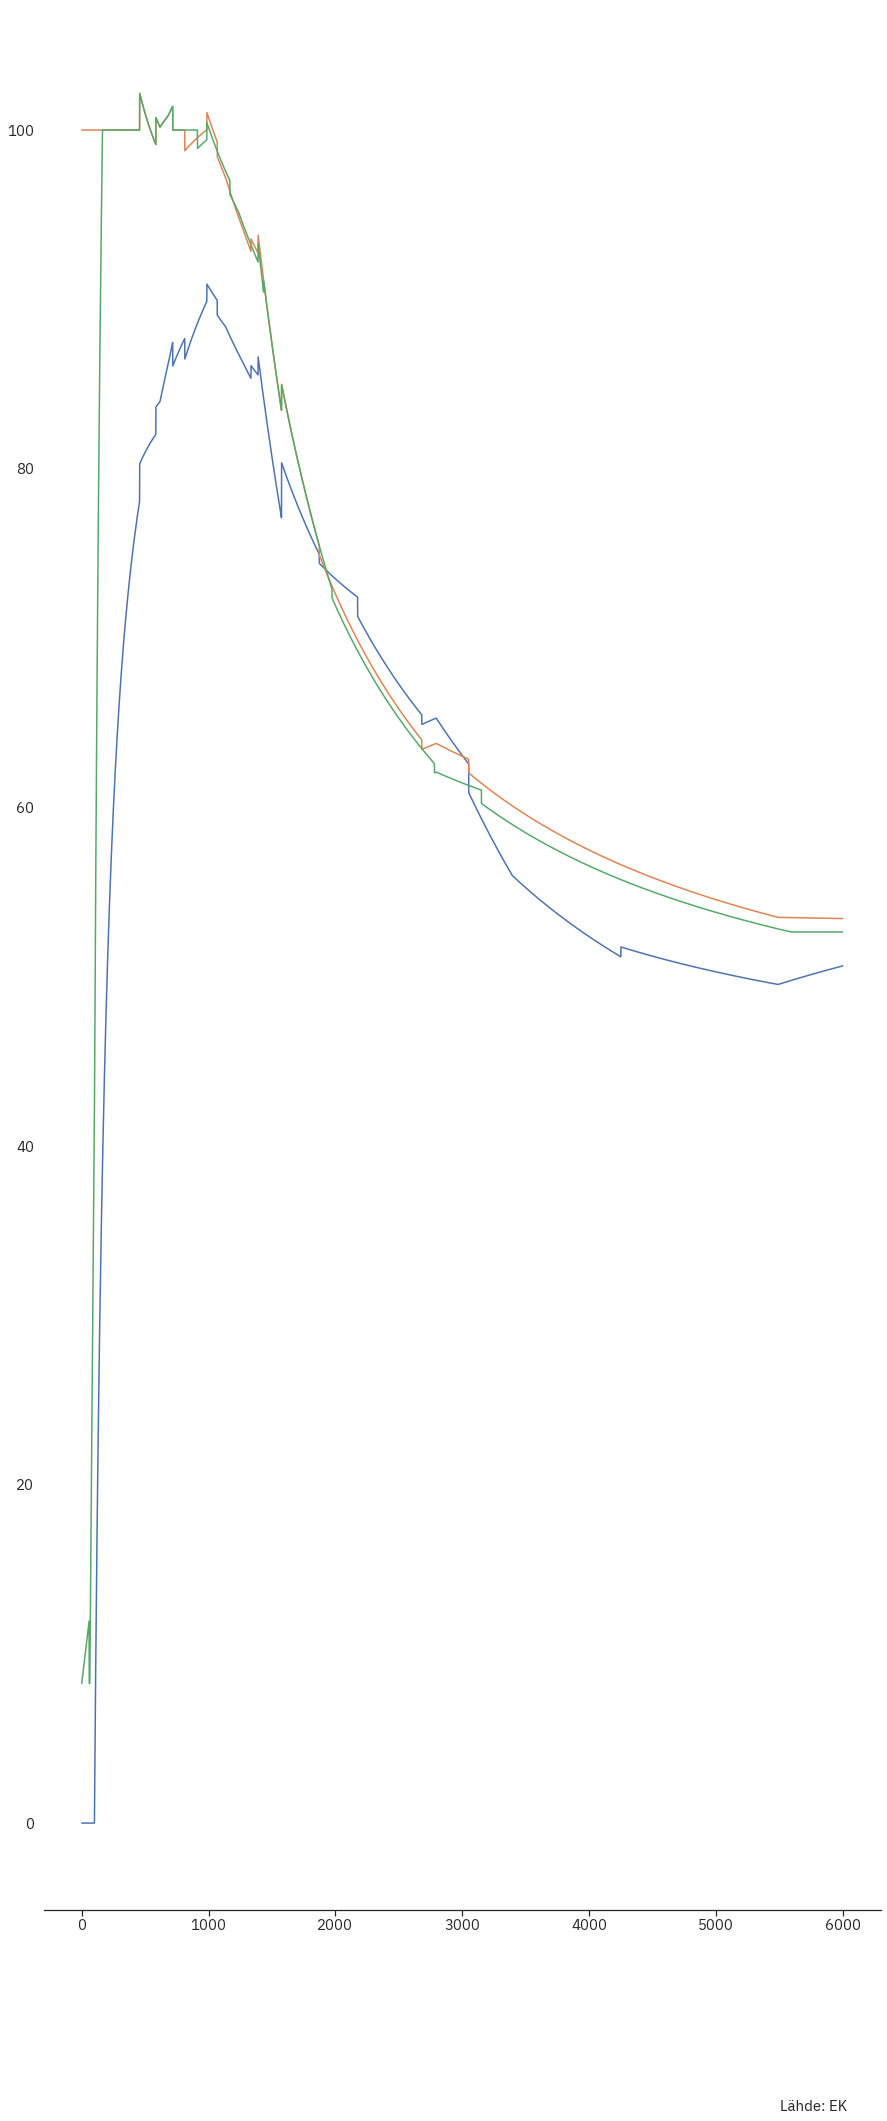

[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]


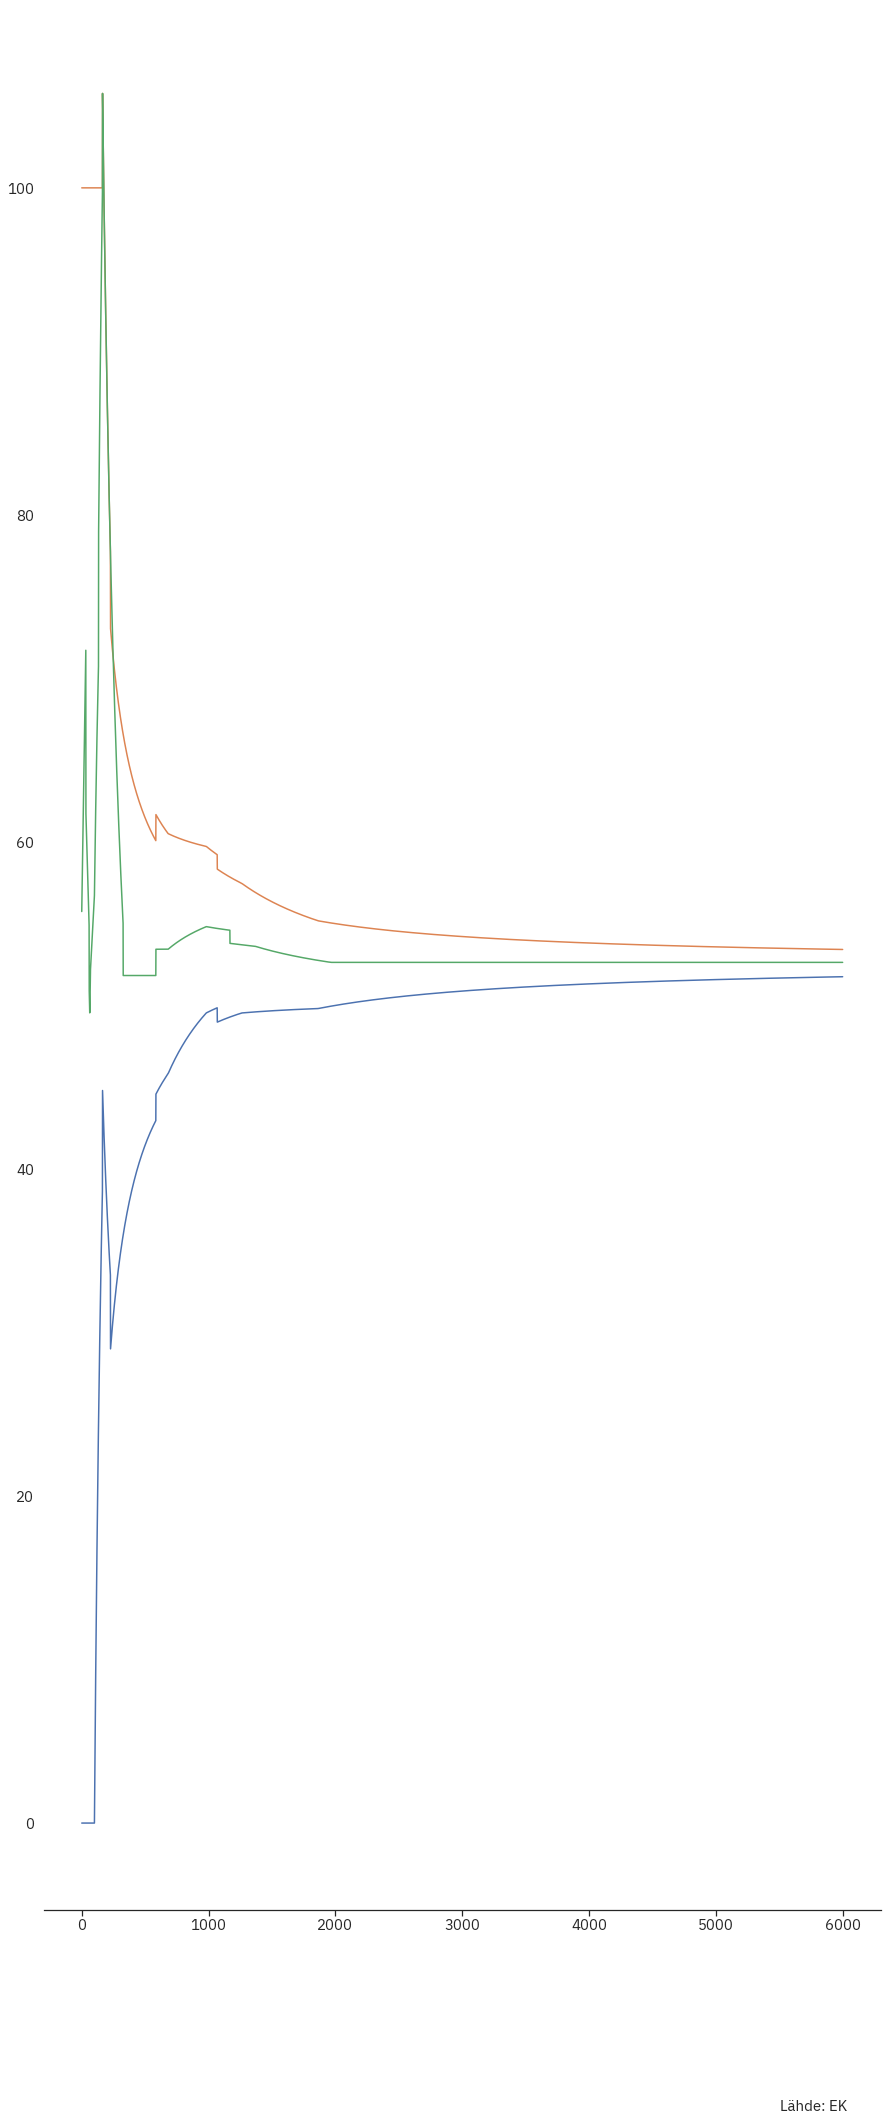

[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]


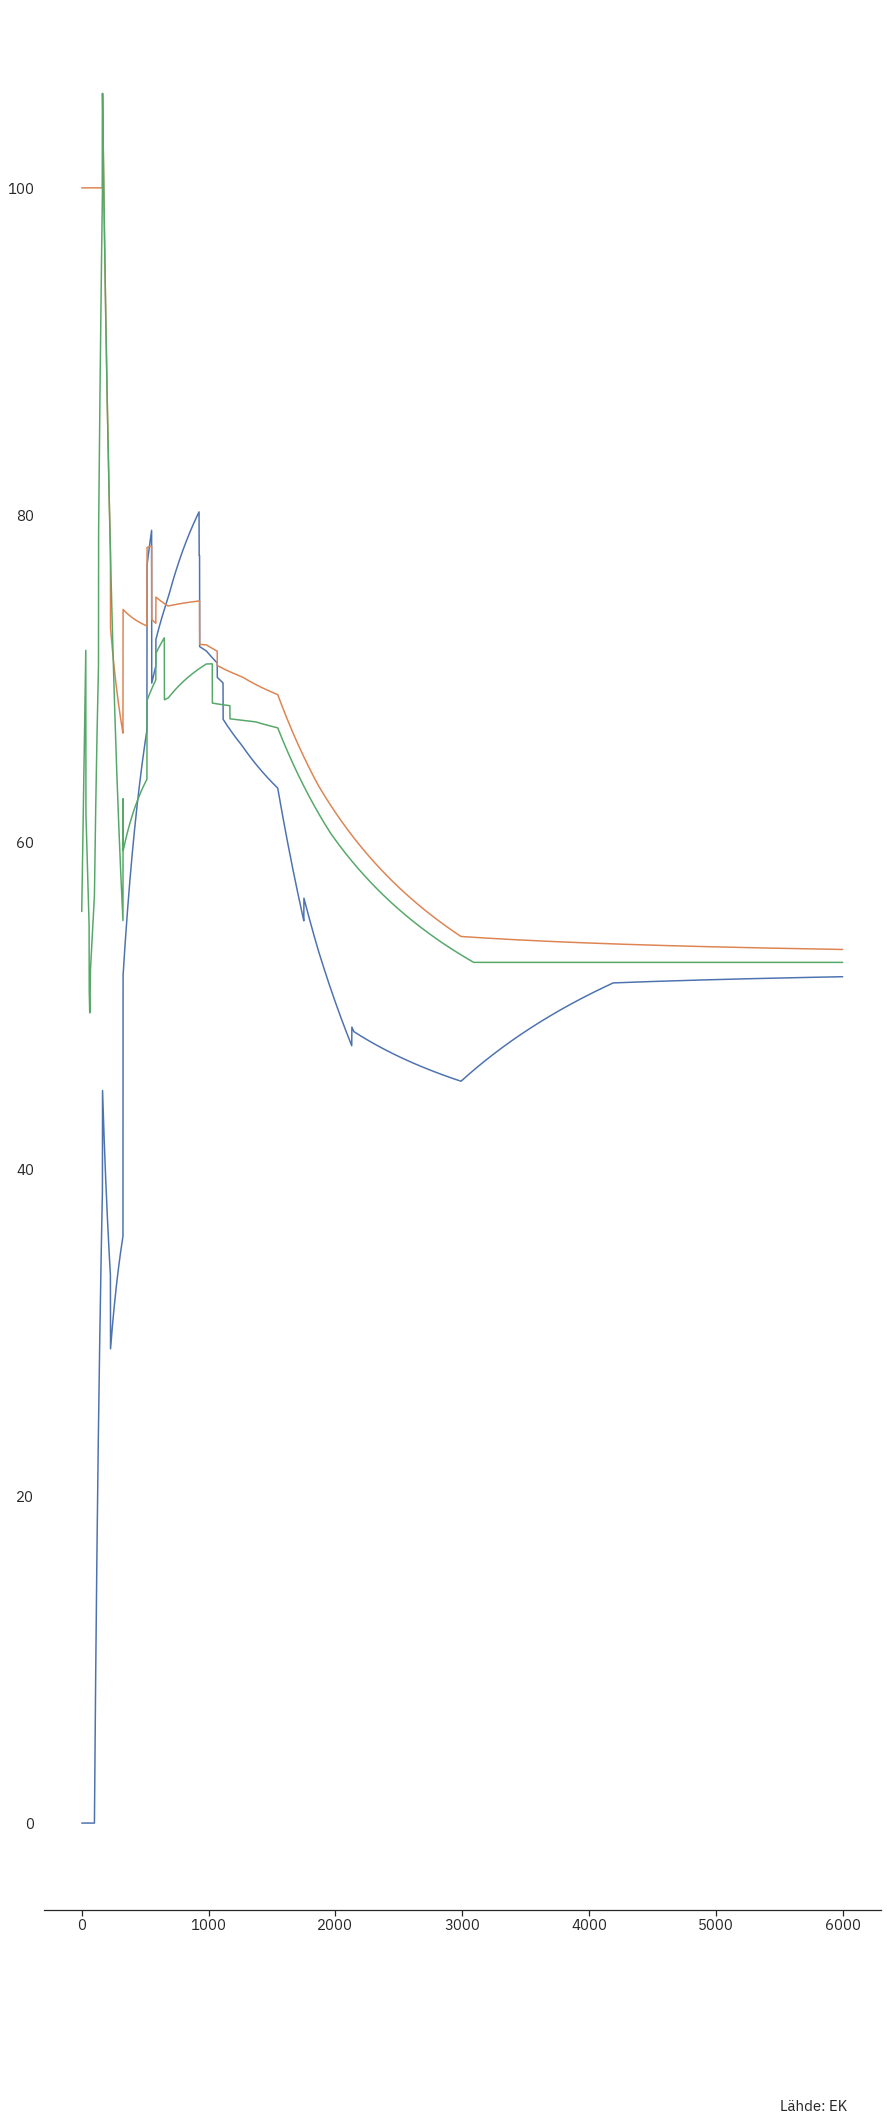

[51.07391958 51.67131542 52.26871125 ... 52.6345     52.6345
 52.6345    ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [51.07391958 51.67131542 52.26871125 ... 52.6345     52.6345
 52.6345    ]


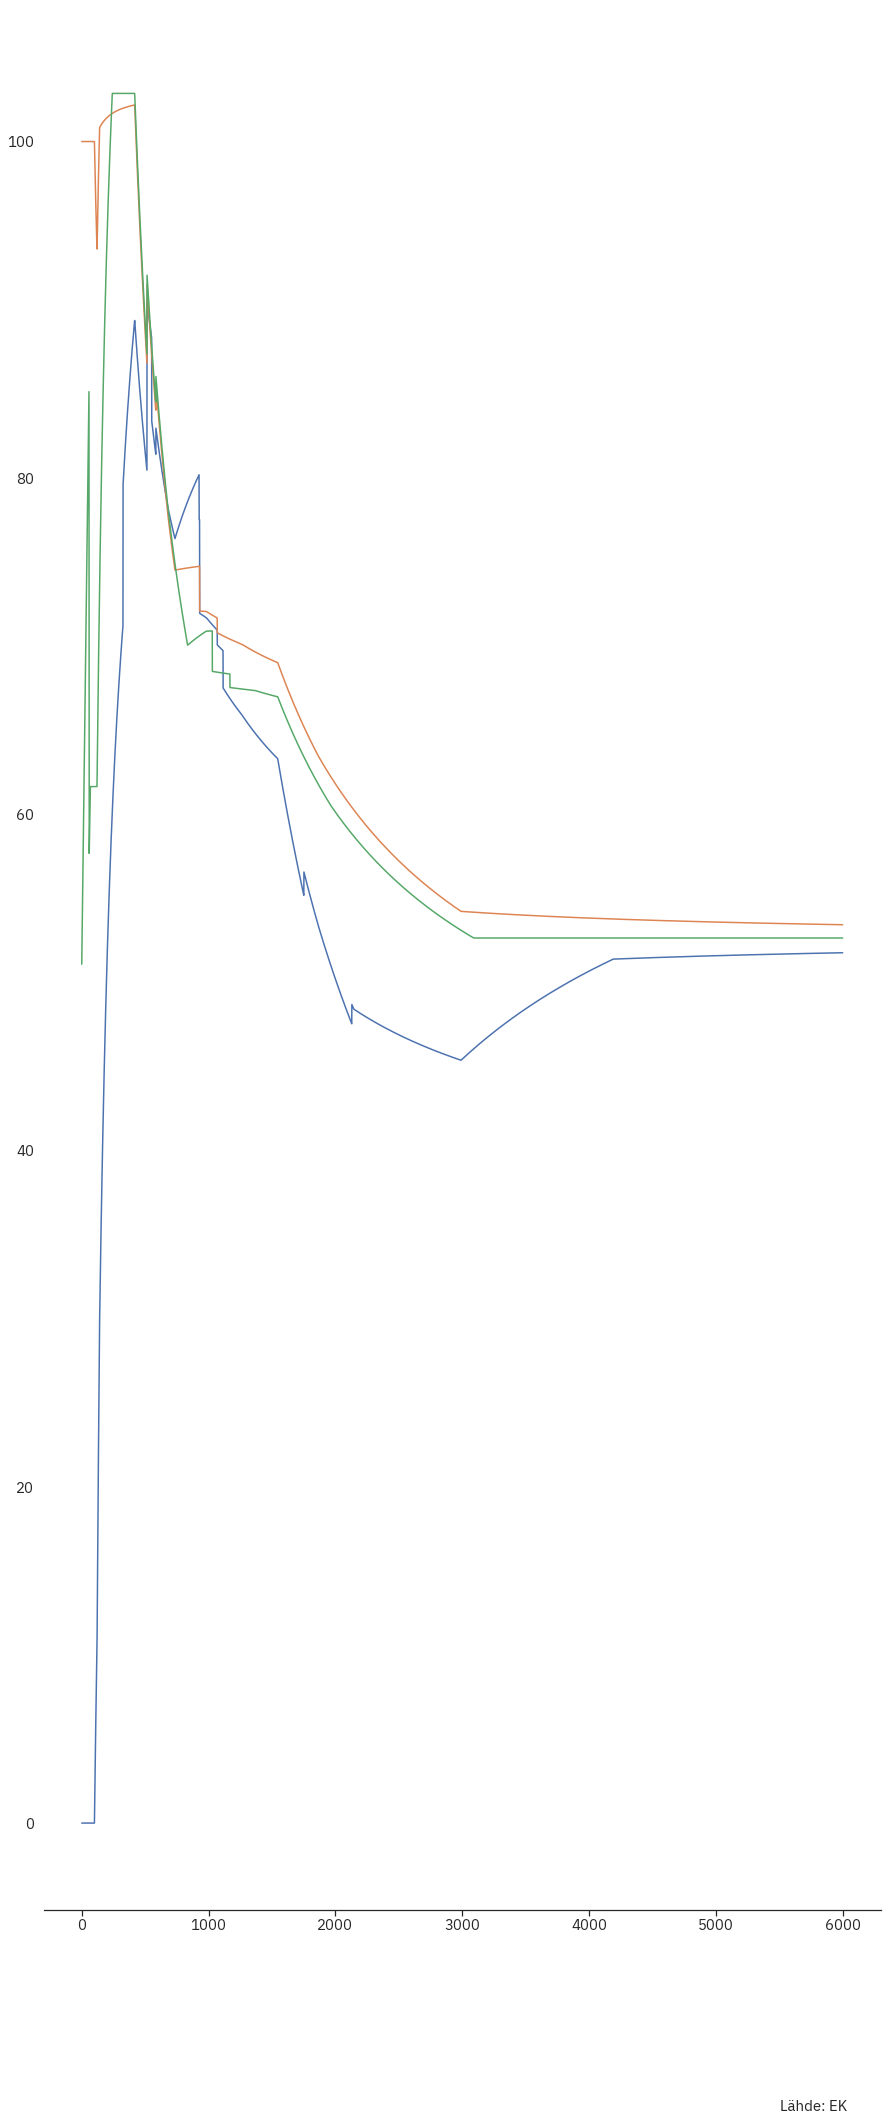

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


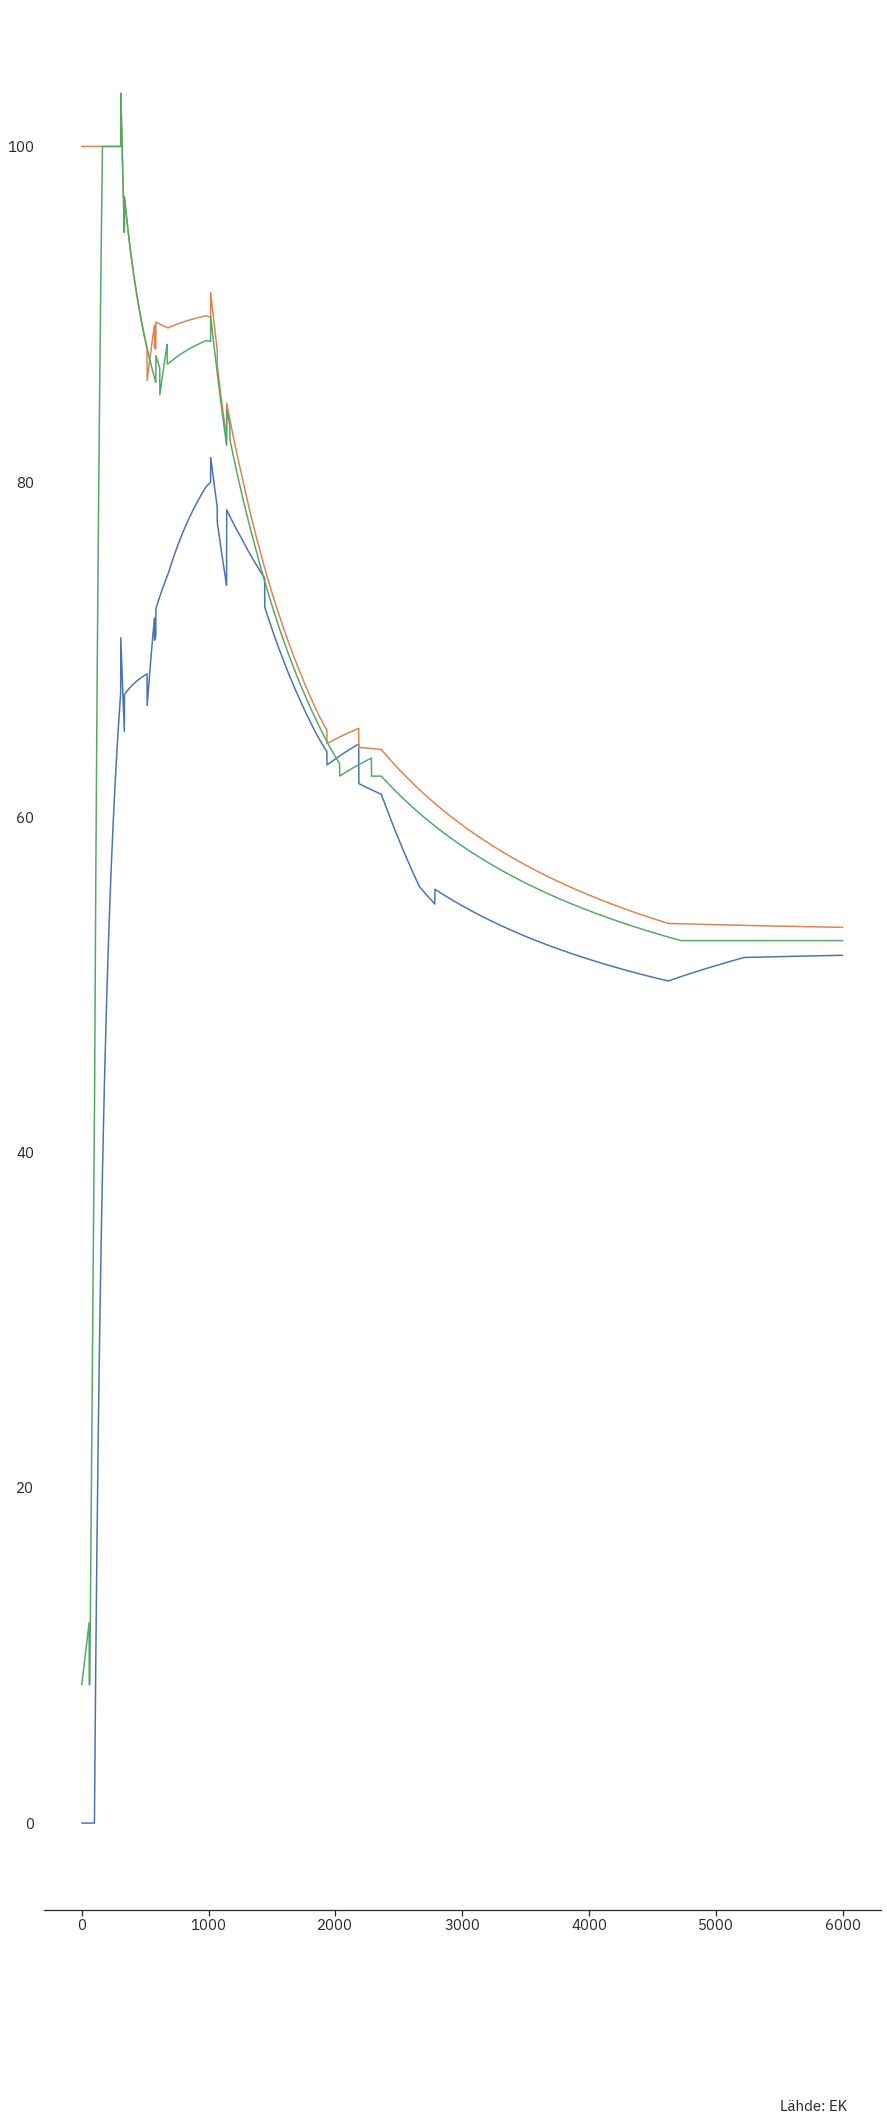

[55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [55.74375   56.2430625 56.742375  ... 52.6345    52.6345    52.6345   ]


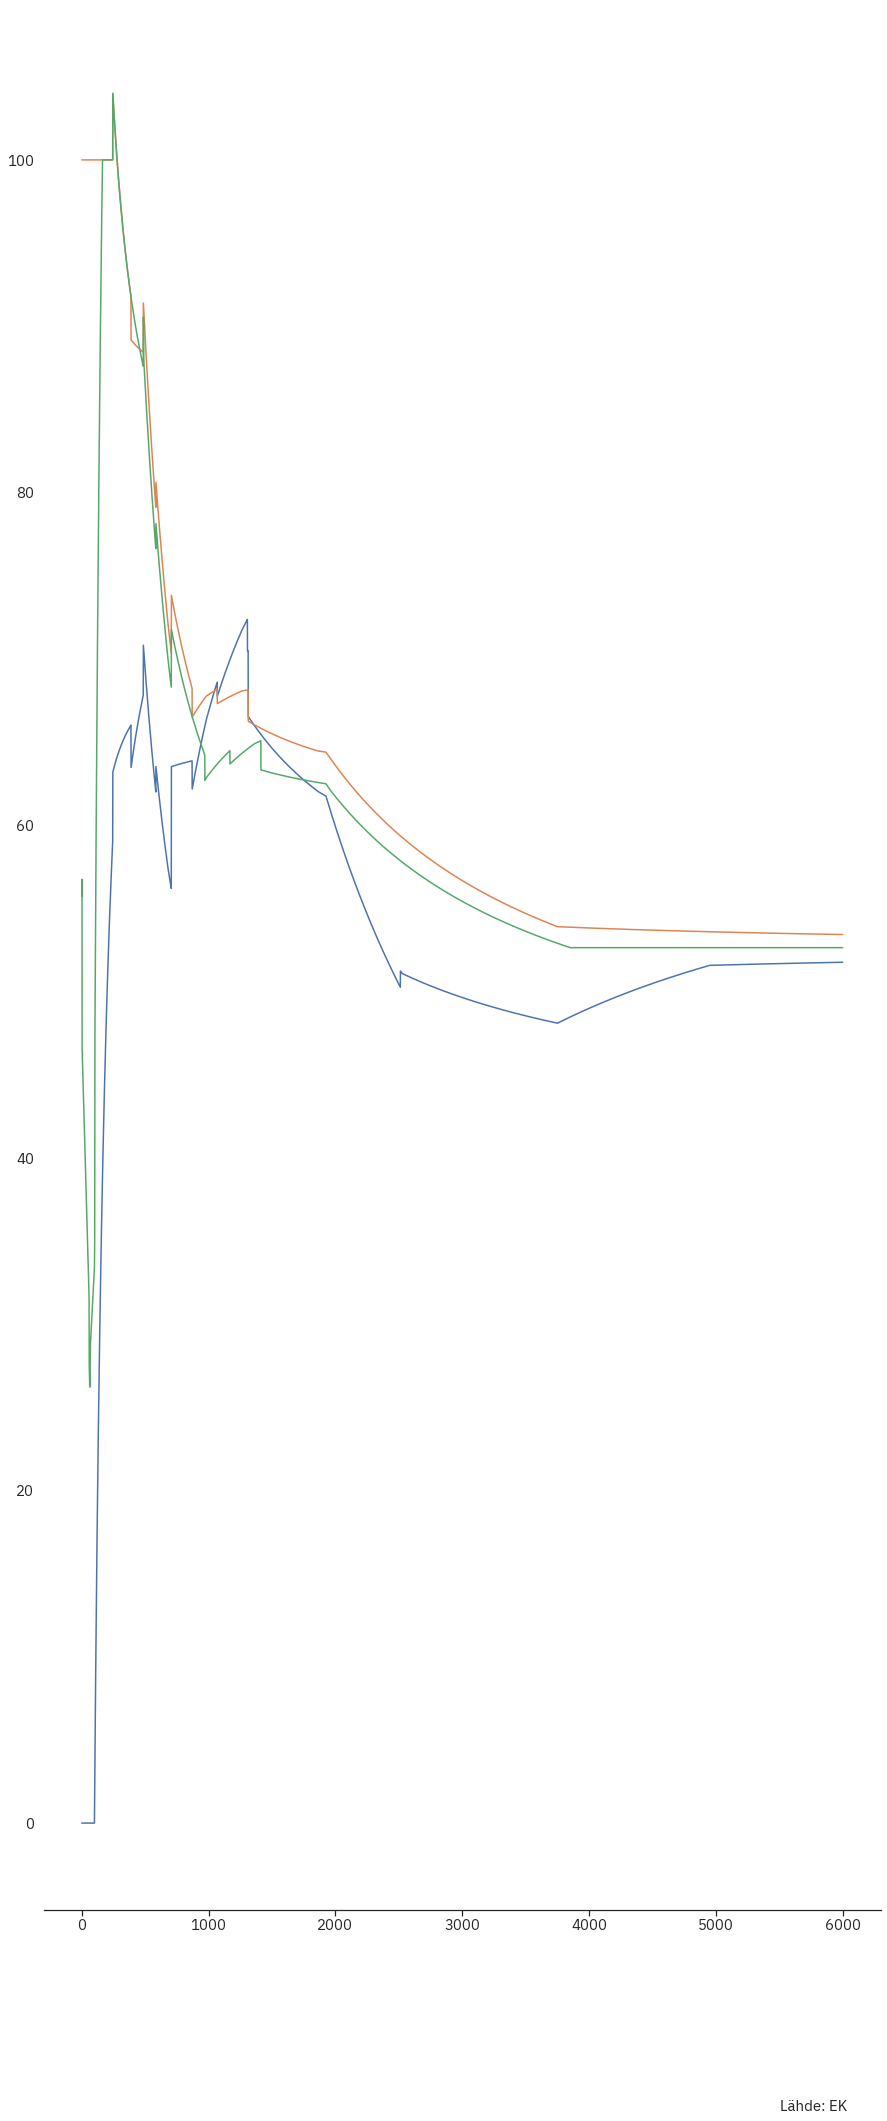

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


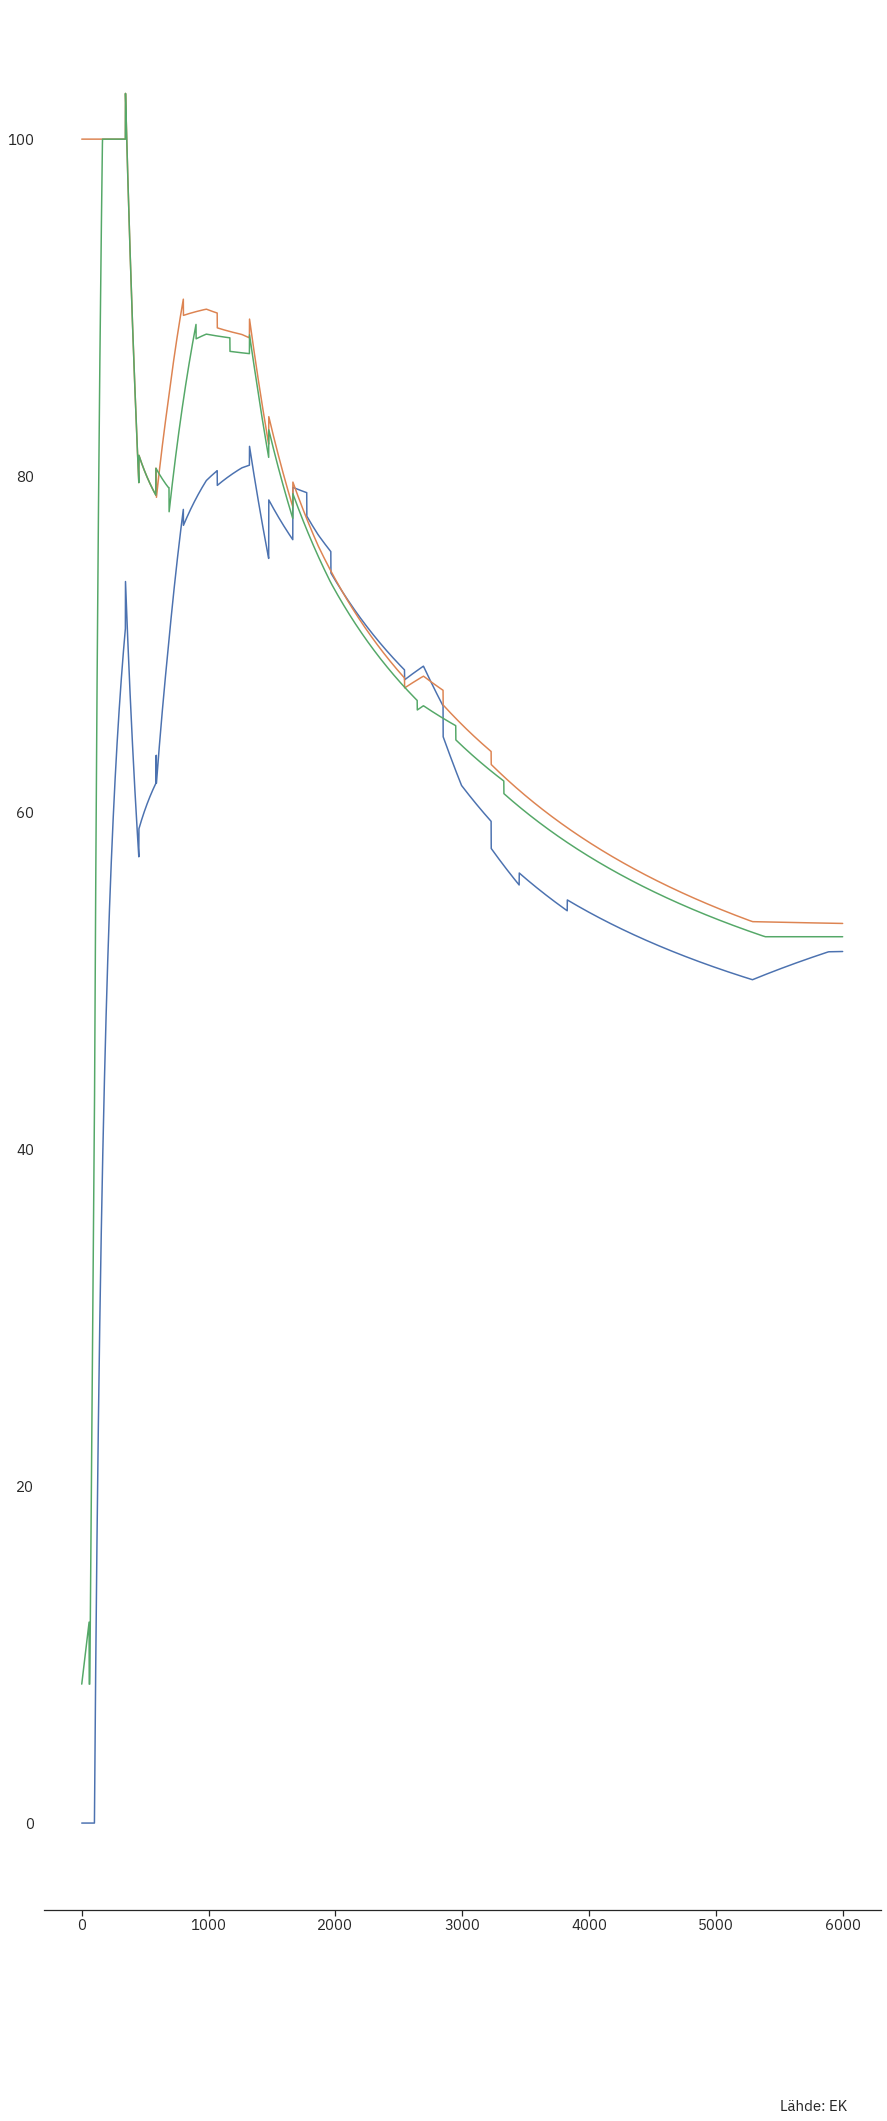

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


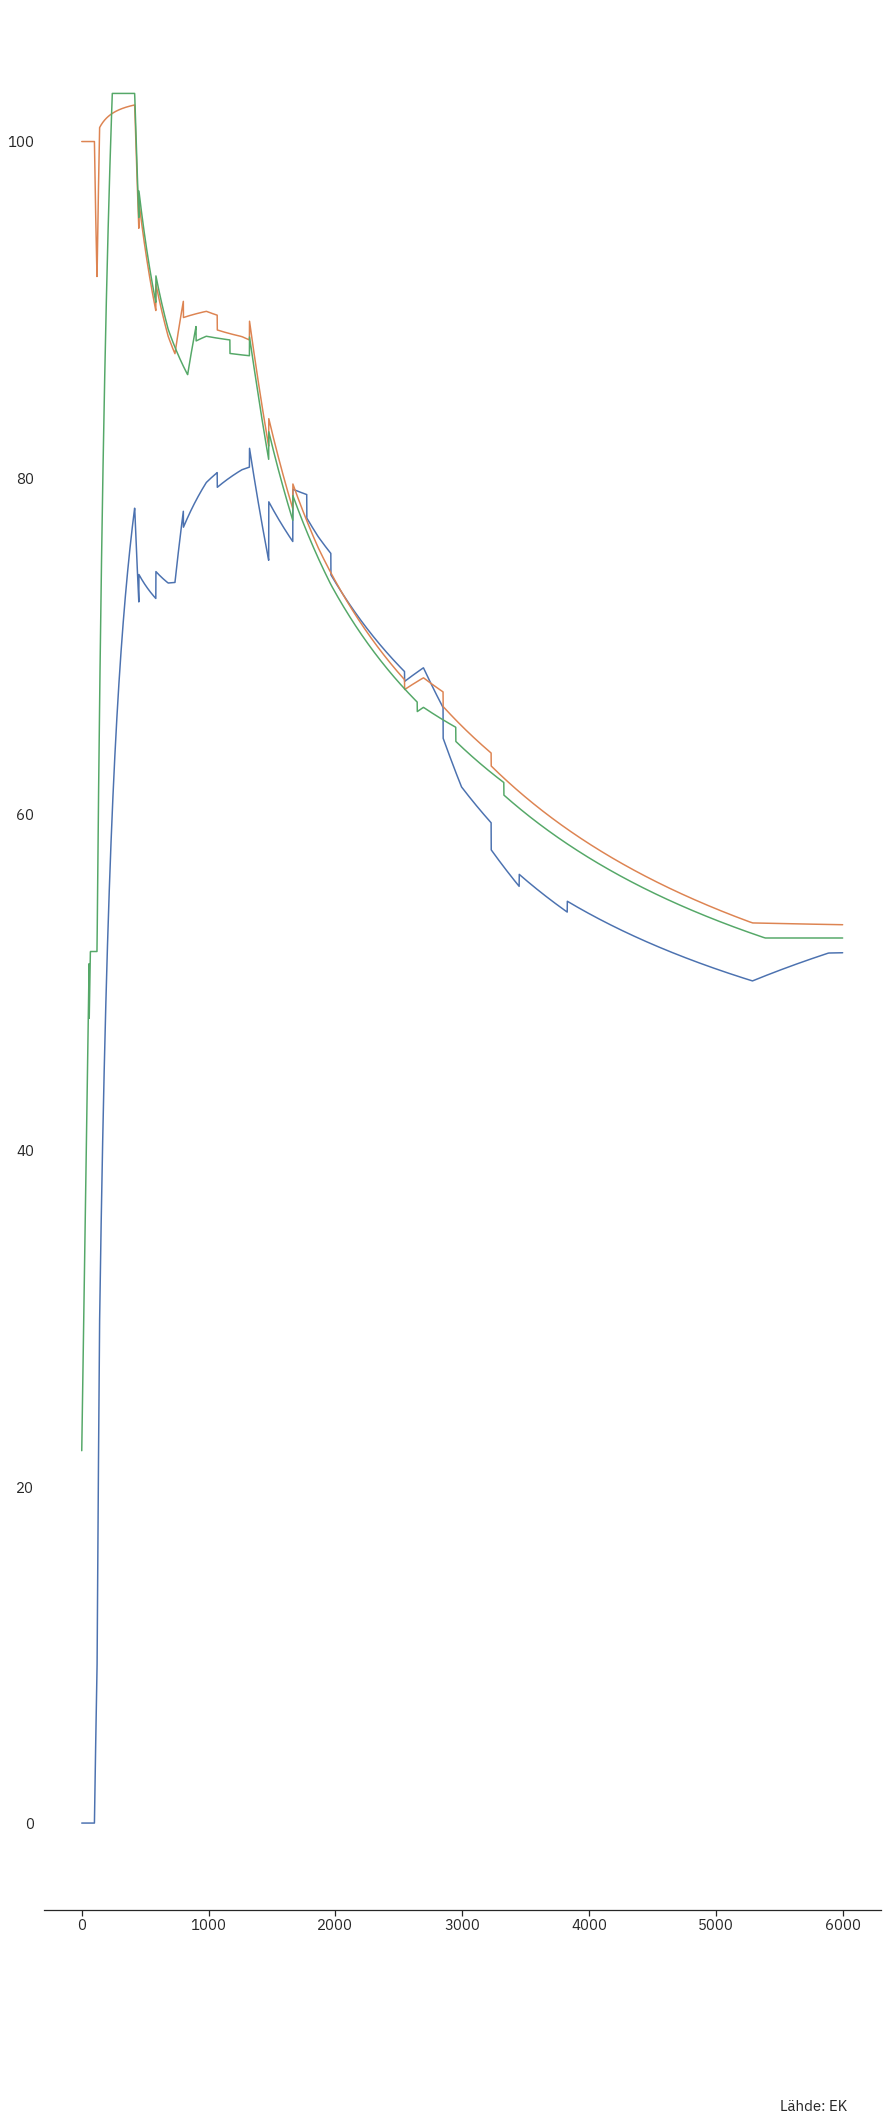

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


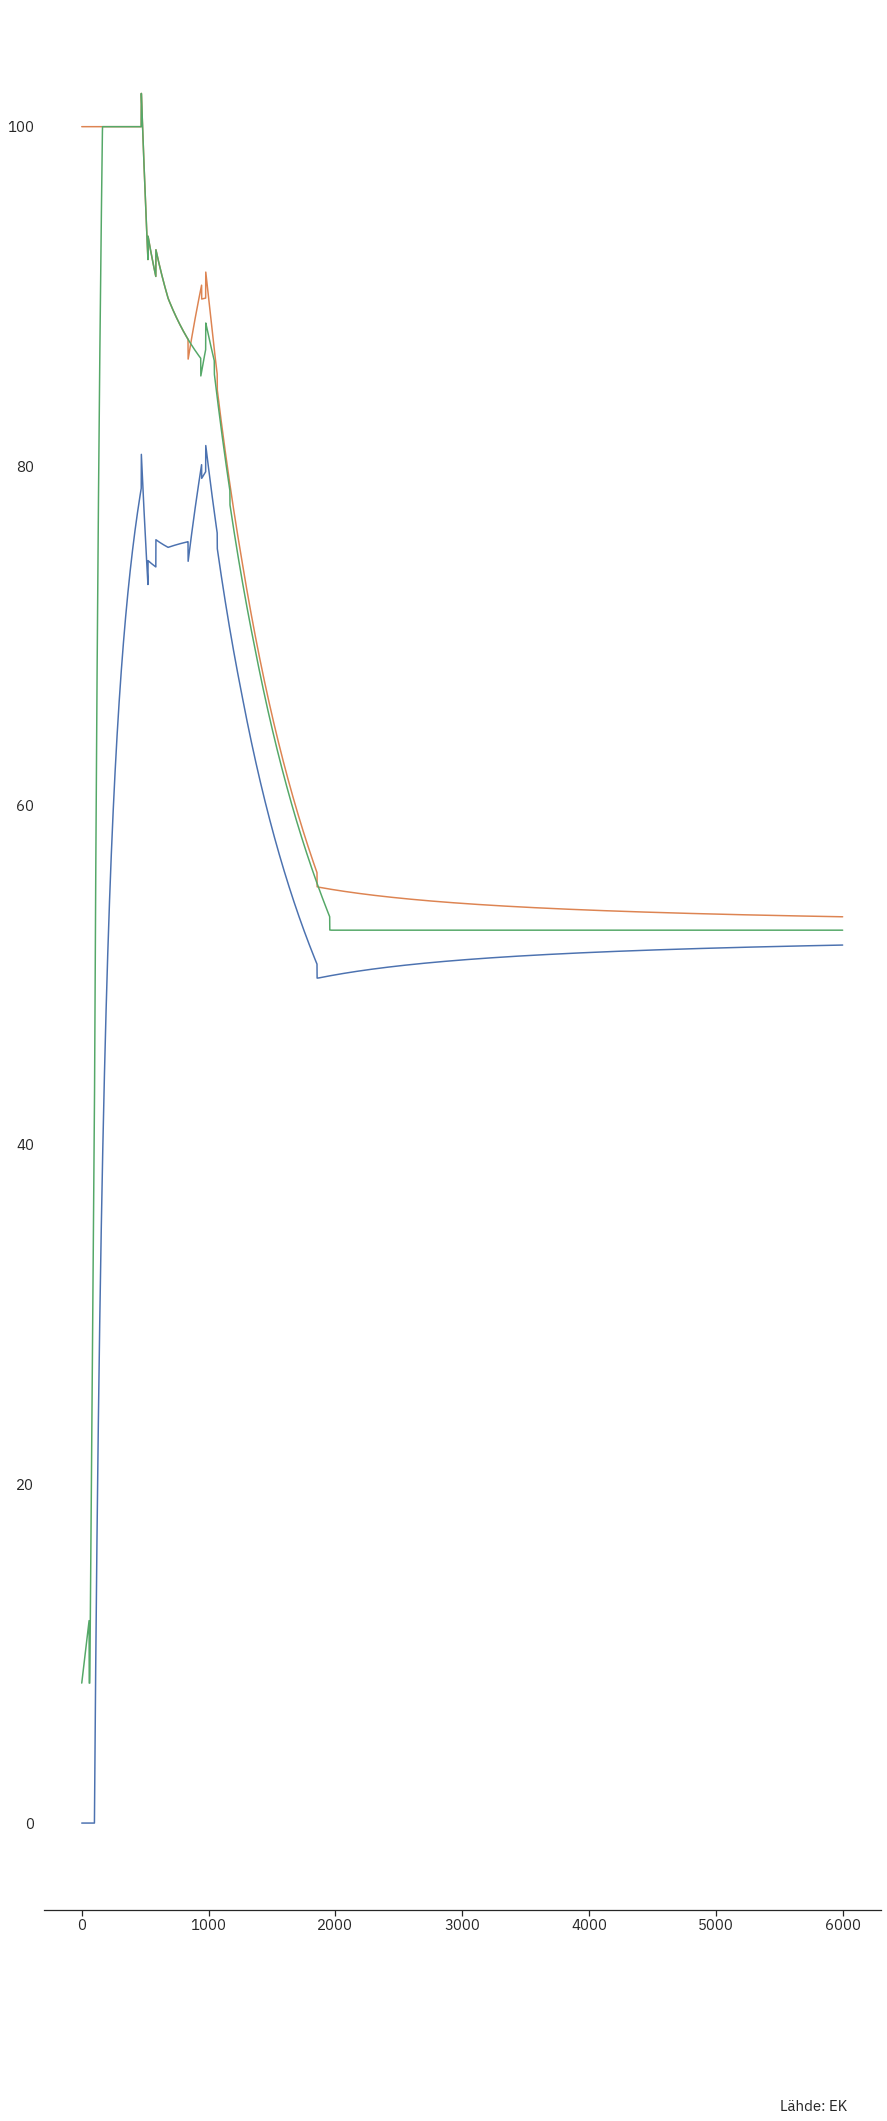

[ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [ 8.25    8.3135  8.377  ... 52.6345 52.6345 52.6345]


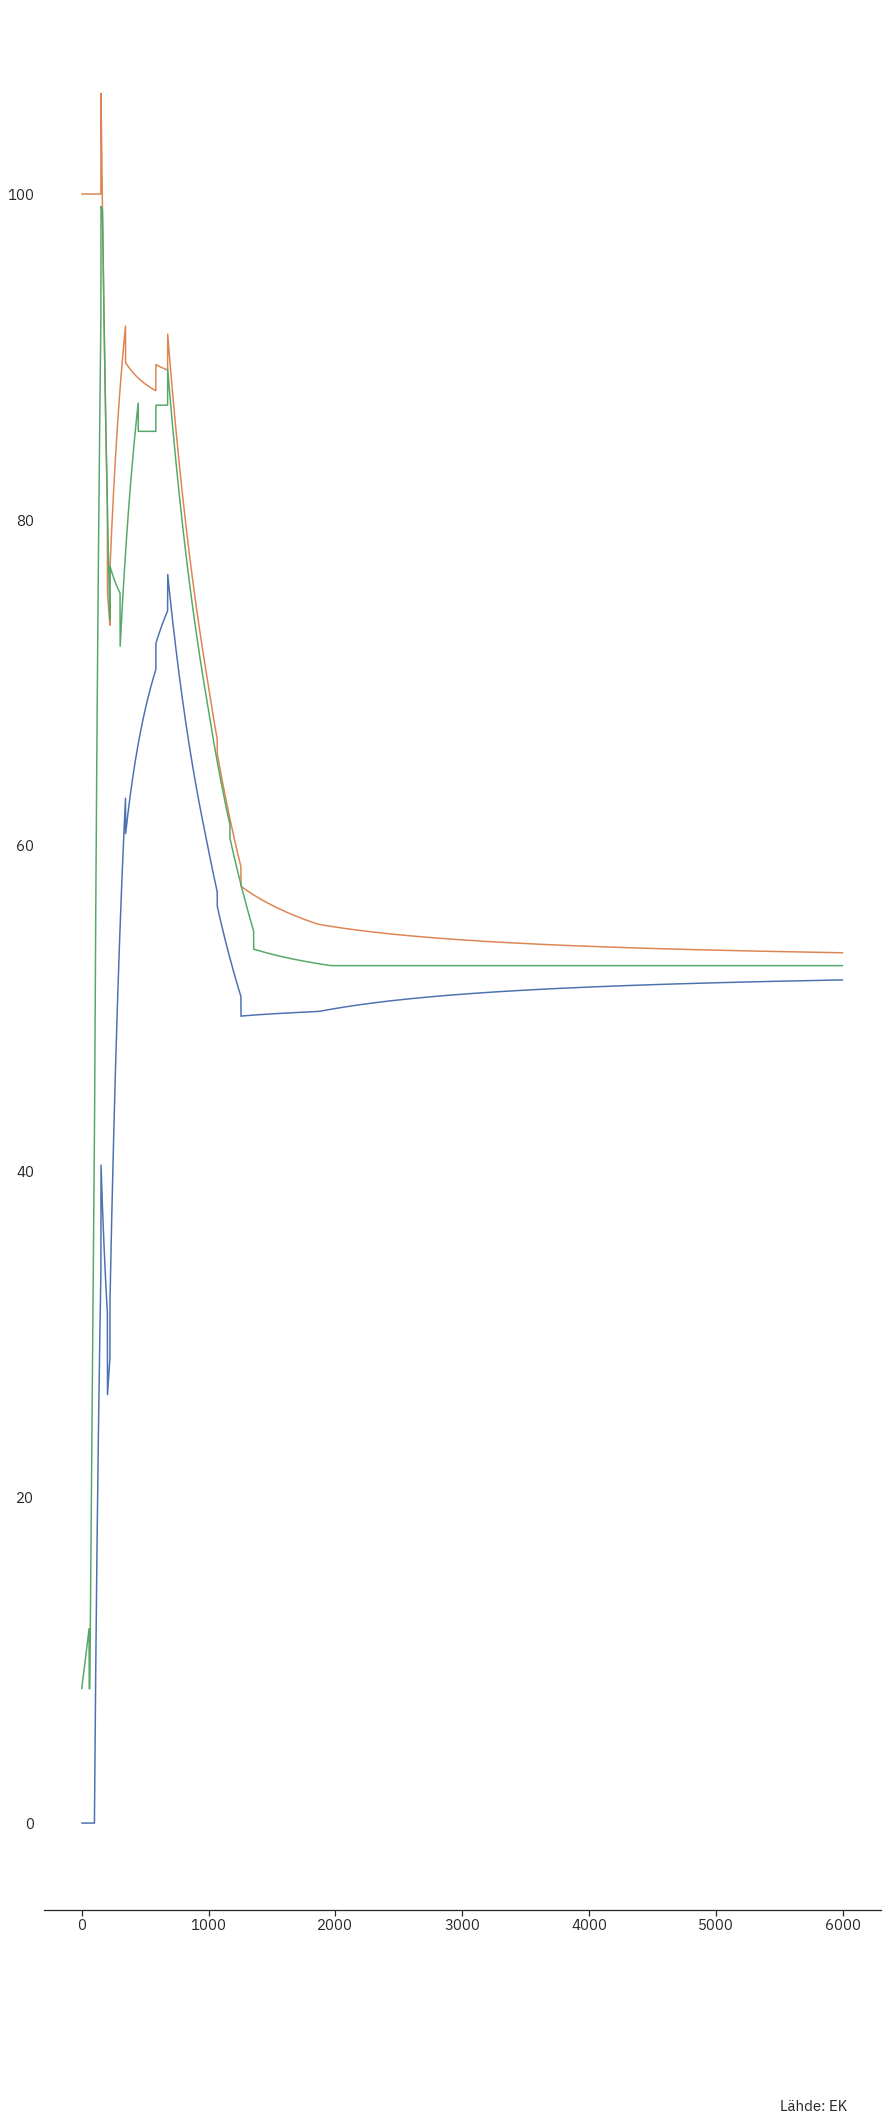

[22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833]
[100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ]
[ 0.          0.          0.         ... 51.75696582 51.7571121
 51.75725833] [100.         100.         100.         ...  53.42418823  53.42405659
  53.423925  ] [22.14375   22.6430625 23.142375  ... 52.6345    52.6345    52.6345   ]


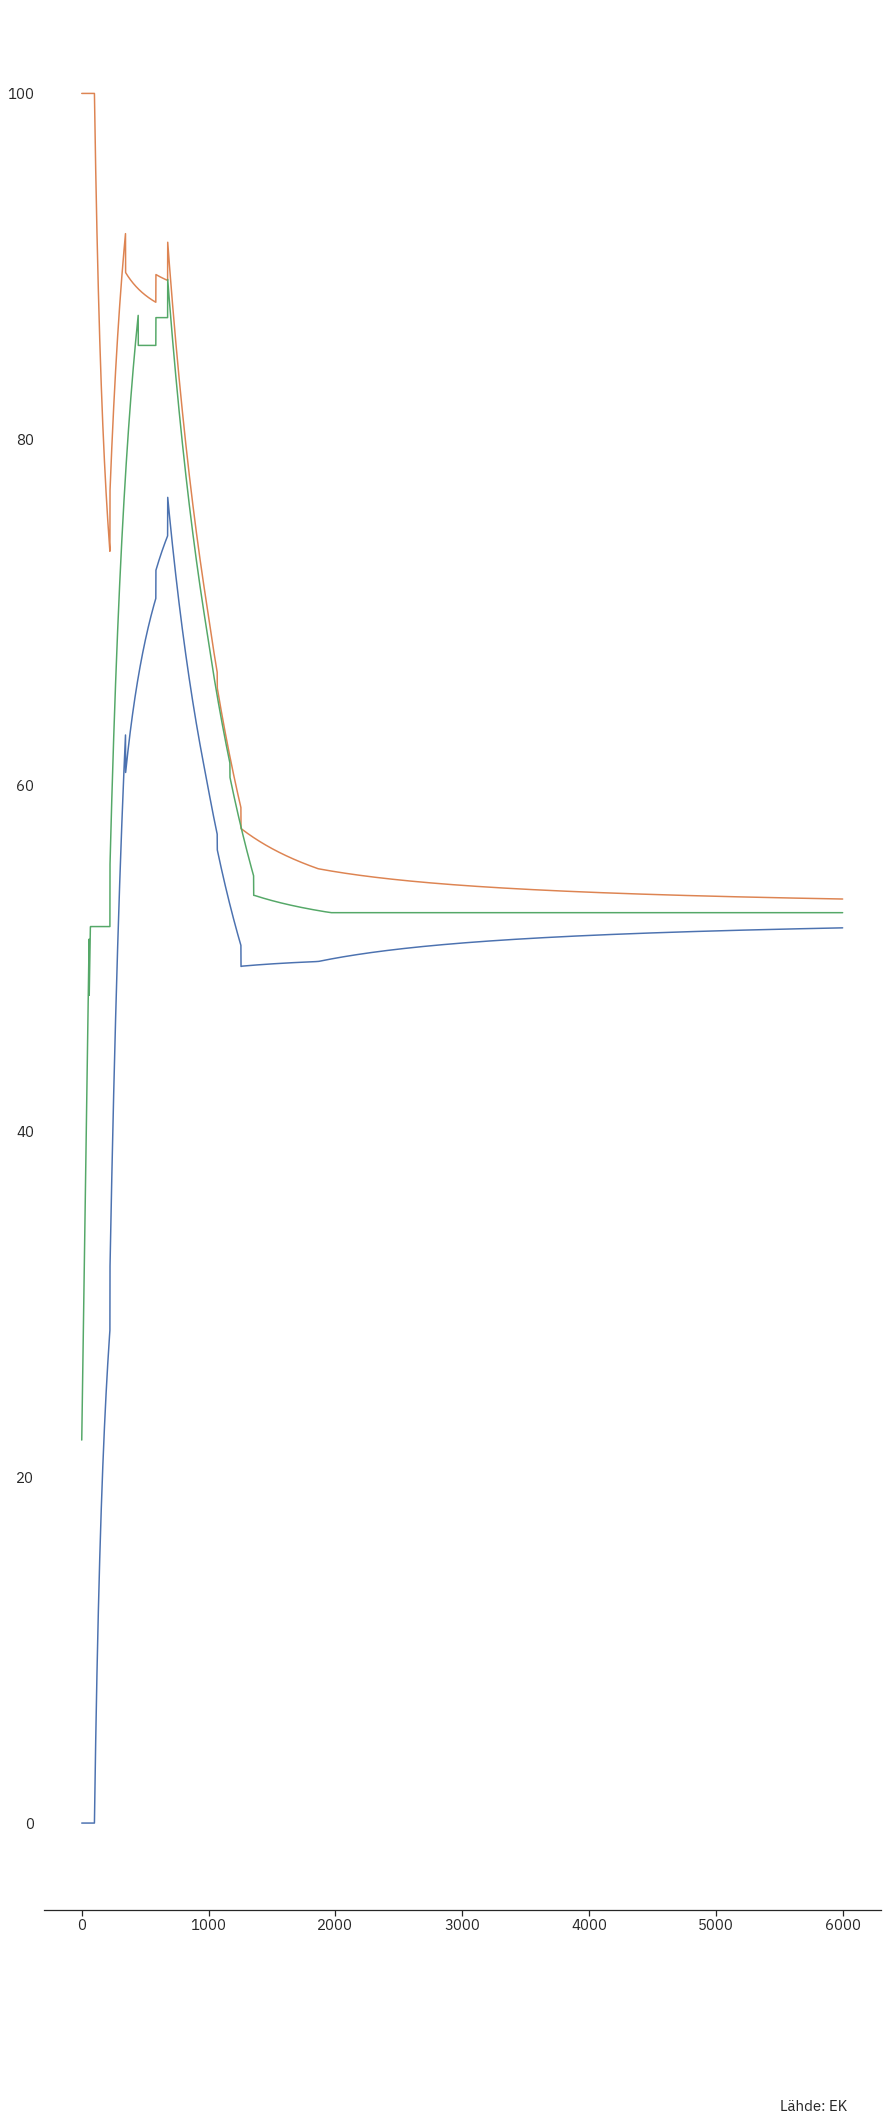

In [15]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
basic_marg.laske_ja_plottaa_hila(type='osatva',incl_perustulo=True)
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018